# Klon Centaur, part 1

:::{.callout-note}  
- Some of the narration in the Introduction was generated by Google's NotebookLM and Gemini, then modified by me.  
- This chapter is an early draft document
  - spell and grammer checking has not been done, many sections are incomplete  
  - posted for test purposes  
  - some cross references can't be resolved until parts 2 and 3 are completed
:::  

![Klon Centaur, photo from Wikipedia, ArtBrom from Seattle, CC BY-SA 2.0](Klon_Centaur.jpg){#fig-klon-centaur}

ToDo

- why Python?
  - plots 
  - analysis and calculations vs simulation as in LTSpice
  - what is happening and why (purpose) 
  - symbolic analysis of subcircuits
  - What LTSpice can't do
    - pole/zero analysis
- check frequency response plot form, clarify notation and use of 'mag @ 1%' 
- check format and axis labels of pole zero plot, make same as used in text books
- state purpse and utility of IR, step response and group delay
- rename clean_path_v3 schematic to someting like effect_path
  - remname schematics and move not used schematics to backup
- think about doing analysis at gain setting of 50%
- change variable for real part of complex plane to $\sigma$ from $\alpha$
- need to fix CW end of P1 pot, make this the 'a' end. 
- ~~re-check LTSpice results and plots~~
- update all schematics, rename some and move old schematics to backup folder
- add comments to group delay plots

### This file takes awhile to load and is a bit sluggish, making a scratchpad notebook for editing and dubugging


Version history:

- 8/9/2024: finished with preliminatry calculations and sections. Need to start working on dialog and cleaning up plots and calculations.
- 8/11/2024: writing dialog for bypass path
- 10/17/2024: Notebook divided into three parts, the file was getting too big for smooth editing and rendering.
- 10/19/2024: 
- 11/3/2024: moving files to laptop for Bliss Nov 2024 cruise
- 12/1/2024: moving files to Crucial X9 and laptop for K-Dam Dec 2024 cruise 
- 12/3/2024: edits on HPL pre travel testing

## Introduction
This analysis will illustrate the application of MNA, Python programming and LTSpice to an interesting circuit called the [Klon Centaur](https://en.wikipedia.org/wiki/Klon_Centaur). The schematics shown in this notebook were drawn using LTSpice and from those schematics, LTSpice was used to generated the netlists. Python and the MNA code was be used to generate network equations from the netlists and obtain solutions for unknown voltages and currents. Transient analysis of the circuit was performed using LTSpice using device models for the diodes and Op Amps. This notebook will attempt to analyze and describe the operation of the various parts of the circuit, with the exception of the power supply.

As an electrical engineer, I've been curious about the workings of the electric guitar and the operation of the effects boxes. My motivation in writing this paper was to learn a little about the topic. I don't play the guitar and I'm not a musician, so I'll be looking at this topic from the point of view of signals and circuits. 

Following the introduction section about the characteristics the electric guitar and associated equipment, a description of the electrical schematic and the interfaces to the circuit (knobs and jacks) is provided. There are some on-line sources that are referenced which provide an analysis of the circuit, primarily utilizing LTSpice. These analysis are interesting since the perspective is somewhat different than what is provided in this notebook. A few words are provided about current price and availability of the pedal, the Klon KTR and Klon Centaur clones.

The analysis provided in this notebook is a deep dive into the operation of the circuit from the perspective of traditional linear circuit analysis taught in electrical engineering schools. The focus is on circuit analysis and not circuit design. This means looking at how the circuit works, since this is what circuit analysis is all about. The designers of the Klon Centaur were looking for a particular sound or tone profile and in some places I'll comment on reasons why the designers might have developed these circuits; but for the most part I'll not be looking at why the circuit works in a particular way, but how it works. 

<!--
~~A combination of Python and LTSpice will be used in the analysis.~~ 
~~The use of Python and MNA allows symbolic solutions for small sub-circuits of the Klon Centaur to be obtained. From the symbolic solutions, the circuit components can be related to the pole/zero analysis of the sub-circuits. This provides a some insight to the operation of the circuit.~~ 
-->

The Klon Centaur is an overdrive pedal and the top of the pedal is shown in @fig-klon-centaur. The Klon Centaur is widely used in many genres of music, including blues, rock and country. An overdrive pedal is a piece of electronic equipment used by guitarists to alter the sound of the guitar. It's essentially a box containing a circuit that is connected between the guitar and the amplifier, often with other pedals in series, and these pedals control the amount of gain, distortion, tone and output level delivered to the amplifier.  

Bill Finnegan, owner of Klon LLC, and the Klon Centaur creator, wanted to make a pedal that would recreate the sound of a guitar amplifier's distortion at high volume. Finnegan wasn't a fan of the sound of the popular [Ibanez Tube Screamer](https://www.ibanez.com/usa/products/model/tube_screamer/), which many guitarists use for overdrive. He felt it sounded too artificial and buzzy. So he set out to create a pedal that would deliver a more natural, tube-like overdrive sound with rich harmonics. The pedal was designed to have a "big, open" sound with "a hint of tube clipping" that wouldn't sound like it was made by a pedal. Just to clarify, Klon is the company name and Centuar is the name of the pedal and since the Klon only had one product, the product became known as the Klon Centaur. Over the production life of the Centaur, the color of the case and the centaur logo has changed.

Finnegan worked with MIT graduate Fred Fenning and other electrical engineer friends for four and a half years to create prototype pedals. A Germanium diode was chosen by Finnegan for the circuit and he bought as many as he could, since these were a special type that he determined sounded more musical than others he tested. These diodes are no longer in production. The components of the circuit were coated in epoxy resin to make reverse engineering of the circuit more difficult. The Klon Centaur was first sold in late 1994. Finnegan personally built, tested and shipped the pedals from his house, where he was inundated with orders. Many of the components, including the cast enclosure and knobs were custom manufactured. Over the course of 15 years, Finnegan sold about 8,000 pedals. See [The Klon Centaur Guide](https://decibelics.com/klon-guide/) for a thorougal and informative history of the Klon.

:::{.callout-note}  
Notebook organization: The analysis of the Klon Centaur circuits ended up being rather long. Navigating and rendering of the notebook became a bit sluggish on my laptop, so I decided to break up the notebook into three parts.

- Klon Centaur, part 1: Introduction and Effects path linear analysis
- Klon Centaur, part 2: Effects path non-linear analysis
- Klon Centaur, part 3: Design Review and Reactive branch analysis

:::  

## Electric guitar characteristics
An electric guitar is a type of guitar that relies on electrical amplification to produce sound. Electric guitars are known for the wide variety of tones they can produce. By using effects pedals and manipulating the knobs on the guitar and amplifier, musicians can create sounds ranging from clean and bright to distorted and heavy. This versatility has made the electric guitar a popular instrument in many genres of music, including rock, blues, country and jazz. 

An electric guitar isn't just the guitar. While the wooden body, neck and strings are essential components, they only produce a very faint sound on their own. The essential parts for the electric guitar are:

1. The Guitar: This is where the musical performance originates. The player's technique, the strings' vibration and the guitar's construction all contribute to the initial sound. However, the sound produced by the guitar alone is very quiet and lacks the power and character we associate with electric guitars.
2. The Amplifier: This electronic device takes the tiny electrical signals from the guitar's pickups and boosts them to a much higher volume level. It also shapes the sound, adding characteristics like warmth, brightness, or distortion.
3. The Speaker: This is the final link in the chain, converting the amplified electrical signal into sound waves that we can hear. Different speakers produce different tones and the size and design of the speaker cabinet significantly impacts the overall sound.

In essence, the electric guitar, amplifier and speaker work together as a system to produce the rich, varied and powerful sounds that define this instrument. Each component plays a crucial role in shaping the final sound. The combination of these elements is what makes the electric guitar such a versatile and expressive instrument.

The componets of an electric guitar, all of which contribute to the tone are described below in more detail:

### Body
The electric guitar body is the foundation of the instrument, providing a sturdy platform for attaching the neck, strings, pickups, electronics and bridge. Electric guitar bodies come in a wide variety of shapes, each with its own distinct look and tonal characteristics. Some of the most popular and iconic shapes include:

- Stratocaster: Contoured double-cutaway body with three pickups. Known for its bright, twangy sound and versatility across various genres.
- Telecaster: Solid body with a single-cutaway design and typically two pickups. Known for its twangy, bright tone and bite.
- Les Paul: Solid body with a carved top, typically two humbucker pickups. Known for its warm, thick and sustain-rich tone.
- Gibson SG: Solid body with a "horns" design and typically two humbucker pickups. Known for its comfortable, lightweight design and bright, punchy tone.

The type of wood used for the guitar body plays a significant role in its tone. Some of the most common body woods include:

- Mahogany: A popular choice for both solid and semi-hollow bodies, known for its warm, woody tone with good sustain.
- Alder: A popular choice for Stratocasters and Telecasters, known for its bright, balanced tone.
- Ash: Lighter than mahogany with a brighter, more scooped tone. Often used on Fender guitars.
- Basswood: A lightweight wood often used on budget guitars, with a neutral tone that can take EQ well.
- Poplar: Another affordable wood with a neutral tone, commonly used on budget guitars.

Electric guitar bodies can be constructed in two main ways:

- Solid body: The most common type, made from a single piece of wood or laminated pieces of wood. Offers good sustain and resonance.
- Semi-hollow body: Has a hollow core with solid wood tops and backs. Offers a warmer, more resonant tone than solid bodies, but with less sustain.

### Strings
The electric guitar uses pickups to convert the vibrations of the steel strings into electrical signals. There are many different types of electric guitar strings available, each with its own unique sound. Some of the most common types of strings include:

- Roundwound strings: These are the most popular type of electric guitar string. They have a bright, clear sound and are very versatile.
- Flatwound strings: These strings have a smooth, mellow sound. They are often used by jazz guitarists.
- Nickel-plated steel strings: These strings are bright and warm-sounding. They are a popular choice for many different genres of music.
- Stainless steel strings: These strings are bright and have a long lifespan. They are often used by rock and metal guitarists.

When a string is strummed or plucked, it vibrates and interactacts with the magnetic field of the pickup. The vibrations and movement of the steel string in close proximity to the ends of the magnets in the pickup cause the vibrations to be impressed on the magnetic field which causes a voltage to be induced in the wire wound around the magnets. The strings vibrate at different frequencies depending on their thickness, length and tension. The thicker the string, the lower the pitch and frequency. An electric guitar typically has six strings. The thickest string is the low E string and the thinnest string is the high E string. The fundamental of the low E string is about 80 Hz. The frequency range of interest would start at 80 Hz and go up to the sixth harmonic of highest note on the high E string, or about 7.8kHz. [Guitar Frequency Range Chart](https://www.musicguymixing.com/guitar-frequency-range/) talks about using an equalized frequency range of 150 Hz up to 5 to 8 kHz. In the analysis that follows an audio range of 80 to 8kHz will be highlighted as the electric guitar audio band.

### Pickups
There are different types of pickups, each with its own sound. There are two main types of electric guitar pickups: single-coil and humbucker.

- Single-coil pickups are known for their bright, clear and often chimey sound. However, they are also susceptible to electrical hum, which is a low-level buzzing sound that can be caused by electromagnetic interference.
- Humbucker pickups are made with two coils that are wired out of phase with each other. This helps to cancel out the hum that is common with single-coil pickups. Humbuckers tend to have a thicker, fuller sound than single-coils.   
    
The position of a pickup in the guitar also affects its sound. Pickups that are closer to the bridge tend to have a brighter sound, while pickups that are closer to the neck tend to have a warmer, fuller sound. Electric guitar pickups come in a wide variety of styles and designs, each with its own unique sound. Some of the most popular brands of electric guitar pickups include Seymour Duncan, DiMarzio, EMG and Fender.

Electric guitar pickups typically have a high impedance, around 10kΩ, which can make them susceptible to noise pickup over long cables. Most electric guitars use passive pickups, which rely on the vibration of the strings to induce a current in the pickup coil. This results in a relatively weak signal with low output voltage.

### Controls
Electric guitars typically have pickup selector switches and tone/volume knobs.

- Pickup selector switch:  This switch allows you to select which pickups will be active and sent to the amplifier. The most common types of pickup selector switches are 3-way and 5-way switches.
  - 3-way switch: This is commonly found on Gibson Les Paul guitars. It typically has positions for the bridge pickup only, neck pickup only and both pickups combined.
  - 5-way switch: This is commonly found on Fender Stratocaster guitars. It typically has positions for the bridge pickup only, bridge and middle pickups combined, middle pickup only, neck and middle pickups combined and neck pickup only.
- Tone/Volume knobs: These are knobs that allow you to control the volume and tone of the signal sent from the pickups to the amplifier.
  - Volume knob: This knob controls the overall output level of the guitar. Turning it up increases the volume and turning it down decreases the volume.
  - Tone knob: This knob controls the treble (high frequencies) of the signal. Turning it up allows more treble to pass through, resulting in a brighter sound. Turning it down cuts the treble, resulting in a warmer sound. Some guitars may have multiple tone knobs, allowing for independent control over the treble of different pickups.

These switches and knobs are crucial for shaping the electric guitar's sound. By manipulating the pickup selection and tone/volume controls, guitarists can create a wide variety of tones, from bright and twangy to warm and thick.

### Amplifier
An electric guitar amplifier, often simply called an amp, is an electronic device that takes the weak electrical signal produced by an electric guitar's pickups and amplifies the signal such that it can be heard through a speaker. There are two main types of electric guitar amplifiers:

- Tube amplifiers: These classic amps use vacuum tubes to pre-amplify and power the signal. Tube amps are prized for their warm, rich sound and responsiveness to playing dynamics. However, they tend to be more expensive, heavier and more delicate than solid-state amps.
- Solid-state amplifiers: These amps use transistors to amplify the signal. Solid-state amps are generally more affordable, lighter and more durable than tube amps. They can also produce a wide variety of tones, making them versatile for many genres of music.
- Modeling amps: These amps use digital technology to model the sound of classic tube amps and other effects pedals. Modeling amps are very versatile and can be a great way to get a wide variety of tones without having to buy a lot of equipment.
- Combo amps: These amps combine the amplifier and speaker in a single unit. They are typically more portable and affordable than stacks, making them a good choice for beginners and practice.

### Cabnet
An electric guitar cabinet, also known as a speaker cabinet or simply a cab, is an enclosure that houses one or more loudspeakers. It is an essential component of an electric guitar amplifier setup.
The Cabinet is the housing that encloses the speakers. The cabinet is typically made of wood, such as plywood or MDF (medium-density fiberboard) and is designed to resonate at certain frequencies to color the sound of the speakers. There are Open-back and Closed-back cabinets. Open-back cabinets tend to produce a brighter, more airy sound, while closed-back cabinets produce a tighter, more focused sound with more bass. The number of speakers in a cabinet affects its overall volume and tone.  A 4x12 cabinet with four 12-inch speakers is a popular choice for rock and metal guitarists who need a lot of volume and bottom end. A 1x12 cabinet with a single 12-inch speaker is a more portable option that is still loud enough for practice and small gigs.

### Tone
The electric guitar tone is the overall sound produced by the instrument, influenced by a combination of factors including:

- Electric guitar components:
  - Pickups: These magnetic devices convert the vibrations of the strings into an electrical signal.
  - Effects: Electric guitar effects are electronic devices that modify the sound of an electric guitar. They can be used to create a wide variety of tones, from subtle to extreme. Effects pedals are typically individual units that are controlled by footswitches. They can be chained together to create complex effects. Multi-effects processors combine the functionality of many different pedals into a single unit.
  - Amp: Tube amps are known for their warm, rich sound and responsiveness to playing dynamics, while solid-state amps are more versatile and can produce a wider variety of tones. The settings on the amplifier, such as gain, EQ and reverb, will significantly impact the overall tone.
  - Cabnet: An electric guitar cabinet, also known as a speaker cabinet or simply a cab, is a wooden enclosure that houses one or more loudspeakers. It is designed to project the amplified sound of an electric guitar. Guitar cabinets are passive devices, meaning that they don't require their own power source to function. Instead, they rely on the power from an electric guitar amplifier.
- Playing technique:
  - Picking technique: How you pick the strings (pickups closer to the bridge or neck, pick attack strength) can affect the brightness, attack and overall character of the tone.
  - String bending: Bending strings adds pitch variations and vibrato to your sound.
  - Effects pedals: These electronic devices can add a wide variety of effects to your tone, such as distortion, overdrive, chorus, delay and reverb.
- Microphone: Miking an electric guitar cab involves placing a microphone in front of the speaker cabinet to capture the sound of the amplified guitar. This technique is commonly used in live performances and studio recordings to capture the full body and character of the electric guitar tone.
- Mixing console: Live performance mixing consoles, also known as live sound mixers, are electronic devices used to control and manipulate the sounds of multiple microphones and instruments during a live performance. They are the central hub of a sound system for concerts, public speeches, theatrical productions and other live events.

Here are some common electric guitar tones and how they are achieved:

- Clean tone: A bright, clear tone with minimal distortion or amplification. Achieved with low gain settings on the amp and single-coil pickups.
- Overdrive: A warmer, more saturated tone than clean, with a slight amount of grit and breakup. Achieved with higher gain settings on the amp or with overdrive pedals.
- Distortion: A heavily amplified and distorted sound, often used for rock and metal music. Achieved with high gain settings on the amp or with distortion pedals.
- Blues tone: Often characterized by a clean or slightly overdriven tone with a warm midrange emphasis. Achieved with single-coil pickups and tube amps with moderate gain settings.

### Effects
Electric guitar effects pedals are electronic devices that alter the electrical signal of the guitar to create new and unique sounds. They are inserted between the guitar and your amplifier, allowing modification of the basic sound of the instrument in a variety of ways. There are a vast number of different effects pedals available, but some of the most common and popular types include:

- Distortion and overdrive pedals: These pedals add grit, saturation and sustain to the guitar sound. Distortion is generally heavier than overdrive, but both can be used to create a wide range of rock and metal tones.
- Fuzz pedals: These pedals create a thick, fuzzy distortion sound that is often associated with psychedelic rock and garage rock.
- Wah-wah pedals: These pedals create a vocal-like "wah-wah" sound by sweeping a band of frequencies up and down as the pedal is rocked.  They are often used in funk, blues and rock music.
- Delay pedals: These pedals create echo effects by recording a short sample of the signal and then playing it back a few milliseconds later. Delay pedals can be used to add depth, space and atmosphere to the sound.
- Reverb pedals: These pedals simulate the natural reverberation of sound in a room or hall. Reverb can add depth, ambience and atmosphere to the sound.
- Chorus pedals: These pedals create a lush, shimmering sound by duplicating the signal and slightly detuning it. Chorus is often used to add thickness and body to clean tones.
- Flanger pedals: These pedals create a swirling, jet-like sound by splitting your signal and delaying one side slightly. Flangers are often used to add texture and movement to the sound.
- Phaser pedals: These pedals create a phasing effect by splitting the signal and feeding it through two slightly out-of-phase filters. Phasers can create a subtle warbling or pulsating sound.
- Equalizer (EQ) pedals: These pedals allow you to boost or cut specific frequencies in your signal. EQ pedals can be used to shape the tone and correct for tonal imbalances.

The Klon Centaur is a type of distortion pedal. Disportion is usually achieved by some type of nonlinear signal processings such as clipping or limiting the amplitude of the guitar signal, which creates harmonic overtones. The amount of distortion that a pedal creates puts it into a typical category or type. An overdrive pedal creates a relatively moderate amount of distortion. A pedal producing a bit more distortion is called a distortion pedal and a pedal producing an extreme amount of distortion is called a fuzz pedal.

## Klon Centaur schematic
The Klon Centaur circuit board was originally covered with a black epoxy resin to prevent people from replicating it. The community at [freestompboxes.org](https://www.freestompboxes.org/) bought a Centaur and sent it to Martin Chittum to analyze. Martin was able to remove the black epoxy resin, trace the circuit and identify all of the components. The schematic was publicly released online in April 2008. Several modifications needed to be made to the schematic, with a final corrected version released in May 2009. Martin Chittum’s [Klon Centaur schematic](https://guitargearfinder.com/wp-content/uploads/2018/11/klon-centaur-schematic-high-res.jpg) is regarded as accurate. Production of the Klon Centaur stopped soon after Martin Chittum's schematic was published and clones became available.

![Martin Chittum’s Klon Centaur schematic](klon-centaur-schematic-high-res.jpg){#fig-Chittum_Klon_sch}

The Op Amp U2A is configured as a summing amplifier that combines the signal from two clean paths and the path containing the diodes, D2 and D3. The paths have reactive components that are shaping the frequency response of the signal and it is not obvious how these circuits are shaping the tone. This is one reason why this pedal has a mystic surrounding it and almost a cult following.  

### Klon Centaur interface
The Klon Centaur has a simple yet effective control layout.

- Knobs, these correspond to P1, P2 and P3 in the schematic, @fig-Chittum_Klon_sch.  
  - GAIN: This control significantly influences the pedal's tone and character. At low gain settings provides clean boost. At medium Gain Settings the overdrive is increased. At high gain setting the overdrive is more aggressive.
  - TREBLE: The treble control boosts or cuts frequencies above 200Hz.
  - OUTPUT: The output control on a Klon Centaur is primarily used to adjust the overall volume level of the pedal. 
- Switch S1 is the bypass ON or effects ON switch. 
- Red LED, D1 in the schematic: illumanated when the effect is on.

The Klon Centaur uses a standard 9-volt battery as the internal power source, but also has a jack for external 9 volt power. This is indicated as BAT1 in the schematic.

There are three jacks on the Klon Centuar chassis, these are: 

- IN (J1 in the schematic): The signal input. This is a standard 1/4-inch guitar input jack.
- OUT (J2 in the schematic): This is also a standard 1/4-inch output jack, used to connect the pedal to the amplifier or other effects.
- 9V (The DC jack in the schematic): The Klon Centaur uses a unique 1/8" (3.5mm) mini jack power connector for external power (if a battery is not used). This is different from the standard center-negative 2.1mm barrel jack found on most pedals.

## Klon Centaur Circuit analysis, blog/forum pages {#sec-web_circuit_analysis}
There are a variety of online sites that explain how the circuit operates, among these are:

- [ElectroSmash](https://www.electrosmash.com/klon-centaur-analysis): This website provides a detailed breakdown of the Klon Centaur circuit, highlighting unique features and explaining how different sections contribute to the overall sound.
- [Klon Centaur circuit analysis](https://www.coda-effects.com/p/klon-centaur-circuit-analysis.html): Circuit description.
- [DIYstompboxes forum](https://www.freestompboxes.org/viewtopic.php?t=31222): While discussions here acknowledge the complexity of the circuit and the lack of a purely mathematical approach, some users delve into specific aspects and component functions.
- [Builder Profile: Klon's Bill Finnegan](https://www.premierguitar.com/gear/bill-finnegan-klon): Interview and design history.

The Klon Centaur's design is thought to be a mixture of basic circuit design ~~known for its blend of theoretical understanding~~and "ear-based" adjustments. So, while the resources above offer valuable insights, the complete picture might involve a combination of electrical theory and the designer's experimentation. I could not find a good description of the signal path for what I'm calling the clean tone path 2, see @sec-clean_tone_path2. 

## Klon Centaur price and availability
The initial price of a Klon Centaur in 1994 was 225 dollars. The price increased over time and by 2007 a Klon Centaur cost 329 dollars. The price of used Klon Centaur pedals began to increase because people did not want to wait for a new one. Currently used Klon Centaurs are selling for thousands of dollars on eBay.

## The Klon KTR: A Pedalboard-Friendly Redesign
The Klon KTR is a redesigned version of the Klon Centaur overdrive pedal, released in 2014 by Bill Finnegan. Finnegan's aim with the KTR was to create a pedal that retained the sound of the original Centaur while addressing some of the production and practicality issues of the original design. One of his main goals was to make the KTR easier to manufacture, so he opted for a design that could be built by a contracted manufacturing firm. This involved using surface-mount components for most of the parts, with the exception of the germanium clipping diodes. He also wanted to make the KTR more pedalboard-friendly, so he chose a smaller enclosure than the original Centaur. The KTR features a standard DC jack and a switchable buffer bypass. Importantly, Finnegan maintained the use of the original Klon Centaur germanium clipping diodes in the KTR. The KTR initially sold for $269.  Finnegan included the text "Kindly remember: The ridiculous hype that offends so many is not of my making" on the pedal. The Klon KTR is no longer in production.

## Klon Centaur clones
The Klon Centaur is a legendary overdrive pedal widely regarded as the "holy grail" of overdrive by many guitarists. There are many Klon Centaur clones available on the market that try to capture the sound of the original. Here are some of the popular Klon Centaur clones:

- [Mosky Silver Horse Overdrive Boost-Function](https://moskyaudio.com/product/products-8-4.html): This is a budget-friendly option that captures the Klon Centaur's warm overdrive sound. It has gain and sustain, making it great for solos. Prices are typically \$48.
- [Warm Audio Centavo Overdrive Pedal](https://warmaudio.com/centavo/): This clone is known for its high quality and accurate reproduction of the Klon Centaur sound. It also includes a mod switch for extending the low-end response. It currently costs \$179.
- [Tone City Bad Horse Overdrive](https://www.tonepedia.com/catalog/effects-and-pedals/overdrive-and-boost/bad-horse-overdrive/): This is another well-regarded Klon clone that is known for its accurate sound and small size. It has a rating of 4.80 out of 5 based on 51 user reviews and currently costs \$54.
- [StewMac Ghost Drive Pedal Kit](https://www.stewmac.com/kits-and-projects/electronic-kits/pedals-and-mod-kits/stewmac-ghost-drive-pedal-kit/): This is a great option for those who want to build their own Klon clone. It has a rating of 4.91 out of 5 based on 210 user reviews and costs \$125.
- [Mosky Golden Horse](https://www.moskyaudio.com/product/product-22-912.html): This is a popular Klon clone that is known for its transparent overdrive sound and ease of use. It is also very compact. Prices typically are around \$39.
- [Clown Centurion](https://bentfishbowl.wixsite.com/electronics/post/clown-centurion): A DIY implimentation with some circuit simplification.
- [NOTAKLÖN](https://jhspedals.info/products/notaklon): A kit for a no-solder clone for $99.

## Analysis methodology
$\large{\color {red} {\text{update this narrative last}}}$  

![Schematic used for the Python analysis](Klon-Centaur_v1.png){#fig-Klon-Centaur_sch}

- circuit description, where did the schematic used for analysi come from? I redrew the schematic using LTSpice and omitted parts of the circuit not related to my analysis. Omitted are the power supply and V+ is drawn as a ground since it is an AC ground. nodes are labeled. Op Amps are ideal, Pots P1 and P2 are drawn as individual resistors. Drawn for analysis, no power supply, v+, the 4.5V virtual ground replaced by the AC ground, Ideal Op Amp, diode model from the internet.
  - description
    - overview, power supply, Op Amps, Diodes, circuit paths
    - same ref resignators as in orginal schematic, except for pots which are named as Rp1a for value between terminals 1 and 2 for example.
    - mysterious path, see @sec-clean_tone_path2
- circuit analysis steps: What about Op Amps and diodes?
  - draw circuit in LTSpice: original schematic source (see reference)
    - explain the LTSpice schematic and derived from the Martin Chittum’s Klon Centaur schematic
    - Klon-Centaur.asc - fix schematic, add labels
  - ideal Op Amps and no diodes, looking at just the effects of the passive components, in the frequency domain
  - replace split rail 9V with AC ground
  - MNA
    - linear analysis
    - symbolic analysis
    - Numerical analysis
    - What are these and why are they used?: Bode, impulse, step, poles and zeros, group delay
- Signal paths
  - bypass
    - isolation between bypass and effects
  - effect
    - output
    - treble
    - clean tone paths
    - distortion path
  - nonlinear analysis
    - Op Amp and diode model
    - AC analysis
    - transient analysis
      - sinusodal
      - step
    - Op Amp signal levels
  - MNA and LTSpce results comparison, @sec-Comparison_of_MNA_and_LTSpice_results
  - subcircuit analysis, @sec-Analysis_of_reactive_branches
    - U1b filter network
    - diode filtering
    - clean path 1
    - clean path 2 
- Summary
  - uniqueness
  - design reciew comments
  - inspired by circuits

### Frequency Response Plot

A [frequency response](https://en.wikipedia.org/wiki/Frequency_response) plot is a graphical representation of how a system responds to different input frequencies. It's a valuable tool in various fields, including engineering, audio, and signal processing. Typically, a frequency response plot shows two key characteristics of a system:

1. Magnitude Response: This indicates how much the system amplifies or attenuates different frequencies. It's often plotted in decibels (dB) on a logarithmic scale.
2. Phase Response: This shows the phase shift introduced by the system at different frequencies. It's usually plotted in degrees or radians.

By analyzing a frequency response plot, you can determine:

- Bandwidth: The range of frequencies a system can process effectively.
- Gain: The amount of amplification or attenuation at specific frequencies.
- Phase shift: The delay introduced by the system at different frequencies.
- Resonance: Peaks in the magnitude response indicating frequencies where the system amplifies strongly.
- Stability: Whether a system is stable or unstable based on the phase margin.

### The Complex Frequency Plane
The [complex frequency](https://en.wikipedia.org/wiki/Complex_plane) plane is a two-dimensional space where complex numbers represent frequency. Unlike the real-world concept of frequency, which is a scalar value representing the rate of oscillation, complex frequency adds a dimension of complexity. It's represented by the symbol $s$ and is defined as:

$s=\sigma+j\omega$

Where:

- $\sigma$ is the real part, representing exponential growth or decay.
- $j$ is the imaginary unit $\sqrt{-1}$.
- $\omega$ is the imaginary part, representing the angular frequency (related to the frequency in Hertz).

The complex frequency plane is divided into four quadrants:

- Right half-plane (RHP): $\sigma \gt 0$, representing exponentially growing signals.
- Left half-plane (LHP): $\sigma \lt 0$, representing exponentially decaying signals.
- Imaginary axis: $\sigma = 0$, representing sinusoidal signals with constant amplitude.

The complex frequency plane is crucial in various fields, including:

- Control systems: Analyzing system stability, designing controllers.
- Signal processing: Representing signals and systems in the frequency domain.
- Electrical engineering: Analyzing circuits and systems.
- Physics: Describing damped oscillations and resonances.

By plotting poles and zeros of a system on this plane, you can gain insights into its behavior, stability, and frequency response.

### Pole-Zero Diagram

A [pole–zero plot](https://en.wikipedia.org/wiki/Pole%E2%80%93zero_plot) is a graphical representation of a system's transfer function in the complex plane. It provides valuable insights into the system's behavior, stability, and frequency response. The diagram is plotted on the complex plane, with the real part on the horizontal axis ($\sigma$) and the imaginary part on the vertical axis ($j\omega$).

- Poles: These are the values of the complex variable 's' that make the transfer function infinite. They are represented by 'x' on the diagram.
- Zeros: These are the values of 's' that make the transfer function zero. They are represented by 'o' on the diagram.

#### Relative Count of Zeros vs. Poles

The relative count of zeros and poles in a transfer function significantly impacts the shape of the frequency response.

- Poles:
  - Each pole introduces a downward slope of -20 dB/decade. Multiple poles at the same frequency amplify this effect.
  - Each pole contributes a phase shift of -90 degrees. Multiple poles at the same frequency amplify this effect.  
- Zeros:
  - Each zero introduces an upward slope of +20 dB/decade. Multiple zeros at the same frequency amplify this effect.
  - Each zero contributes a phase shift of +90 degrees. Multiple zeros at the same frequency amplify this effect.
- Overall Slope:
  - If the number of zeros exceeds the number of poles, the magnitude plot will have a net upward slope.
  - If the number of poles exceeds the number of zeros, the magnitude plot will have a net downward slope.
  - A balanced number of zeros and poles can lead to a flat magnitude plot over certain frequency ranges.
- High-Frequency Asymptote:
  - The high-frequency asymptote of the magnitude plot is determined by the difference between the number of zeros and poles.
  - A larger number of zeros compared to poles will result in a steeper upward slope at high frequencies.
  - A larger number of poles compared to zeros will result in a steeper downward slope at high frequencies.
- Phase Shift:
  - The total phase shift at any frequency is the sum of the phase shifts contributed by each pole and zero.
  - A larger number of zeros compared to poles will result in a larger positive phase shift.
  - A larger number of poles compared to zeros will result in a larger negative phase shift.

The location of poles and zeros on the complex plane provides information about:

- Stability: If all poles are in the left half of the plane (LHP), the system is stable. If any pole is in the right half of the plane (RHP), the system is unstable.
- Frequency response: The distance of poles and zeros from the imaginary axis affects the system's gain and phase response at different frequencies.
- Time-domain behavior: The location of poles and zeros can influence the system's transient response and steady-state behavior.

### Impulse Response
The [impulse response](https://en.wikipedia.org/wiki/Impulse_response) of a system is its output when presented with a brief input signal called an impulse. An impulse is an idealized signal that has infinite amplitude and infinitely short duration, but with a total area of one. The impulse response can be obtained from the transfer function by using the SciPy function [impulse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse.html). However, for the analysis of the Klon Centaur, I don't find the impulse response of the transfer functions to be that informative. Using SciPy, the impulse response is easy to calculate and plot, but I couldn't relate the shape of the impulse response back to the circuit in intuitive way. All the impulse responses looked very simular and they were not insightful. Additionally, using the impulse response along with the convolution function did not produce correct results since the [SciPy convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) and [Numpy convolve](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) functions seemed to treat the signal and circuit as a descrete time system. For this reason, the impulse of the transfer functions are not included in the analysis.

<!--
The impulse response is a fundamental concept in system analysis and has several key applications:

- Convolution: Any input signal can be represented as a sum of scaled and shifted impulses. By convolving the input signal with the impulse response, we can determine the system's output.
- System identification: By measuring the impulse response, we can characterize a system without knowing its internal structure.
- Filter design: Impulse responses can be used to design filters with specific frequency characteristics.
- Room acoustics: Impulse responses are used to capture the acoustic characteristics of a room, which is essential for audio processing and virtual reality applications.

In essence, the impulse response is a fingerprint of a system, providing valuable information about its behavior and enabling various signal processing techniques.

Impulse Response: A System's Fingerprint

An impulse response is a fundamental concept in signal processing and system analysis. It essentially reveals how a system reacts to a very short, sharp input signal, often called an impulse. This response can provide valuable insights into the system's behavior, particularly its frequency response and time-domain characteristics.  

Key Uses of Impulse Response:

System Identification: 
By measuring a system's impulse response, engineers can characterize its properties, such as its frequency response, phase response, and time delay.

This information is crucial for understanding how a system will behave under different input conditions.
-->

### Step response
The [step response](https://en.wikipedia.org/wiki/Step_response) of a system is its output when the input is a sudden change from zero to a constant value. This constant value is often referred to as a "step" input. The system's behavior as it transitions from its initial state to a new steady-state condition is captured by the step response.

Several parameters are used to characterize a step response:

- Rise time: The time it takes for the output to go from 10% to 90% of its final value.
- Overshoot: The maximum amount by which the output exceeds the final value.
- Settling time: The time it takes for the output to settle within a specified percentage (e.g., 2%) of the final value.
- Steady-state error: The difference between the final value of the output and the desired output.

The step response provides valuable insights into a system's behavior:

- Stability: A stable system will eventually reach a steady-state value.
- Speed of response: The rise time indicates how quickly the system reacts to changes.
- Damping: Overshoot and settling time reveal information about the system's damping characteristics.

The step response is calculated by using the SciPy function [lsim](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html), which can be used to simulate output of a continuous-time linear system from the continuous-time linear time invariant system base class. The function lsim allows us to evaluate the performance characteristics of the circuit to square wave or arbitrary input signal input.  

### Group Delay {#sec-Group_delay}

[Group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#) is a measure of the time delay experienced by a group of frequencies as they pass through a system. It's essentially the rate of change of the phase response with respect to frequency. Group Delay is important for the following reasons: 

- Signal distortion: Variations in group delay across different frequencies can cause signal distortion, affecting the quality of audio, video, and data transmission.
- System design: Understanding group delay is crucial for designing systems with linear phase characteristics, which minimize distortion.
- Pulse propagation: In fields like optics and telecommunications, group delay affects the shape and timing of pulses.

Group delay ($\tau_g$) is calculated as the negative derivative of the phase response ($\phi$) with respect to angular frequency ($\omega$):

$\tau _{g}(\omega )=-\frac  {d\phi (\omega)}{d\omega}$

A system with a constant group delay is called a linear phase system. These systems introduce a pure time delay to all frequency components without altering their relative phase relationships, preserving the original waveform shape. According to [Audibility of Group-Delay Equalization](https://acris.aalto.fi/ws/portalfiles/portal/66449704/Audibility_of_Group_Delay_Equalization.pdf), the threshold is 2 ms. The abstract for the paper states: 

> The audibility thresholds for group-delay variation from several previous related studies are shown in Fig. 1. If not otherwise stated, these studies have been conducted using headphones. Green applied Huffman sequences, or truncated impulse responses of second-order allpass filters, to study the audibility of phase distortion. He found a threshold value for the peak group delay of about 2 ms for center frequencies of 625 Hz, 1875 Hz, and 4062 Hz.

The following Python modules are used in this notebook.

In [1]:
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Bypass path {#sec-Bypass_path}
The bypass path is controlled by the effect on/off switch S1A and S1B. The effect on/off switch is a DPDT (double pole, double throw, On-On, type, which are two switches operated by the same actuator). @fig-klon-centaur-schematic-high-res_w_bypass_highlight shows the bypass signal path highlighted. When switch S1A is in the effect-on postion, R27 is shorted and the wiper contact of P3 is directly connected to the output jack J2. Switch and S1B controls the current in D1, a red LED (Light Emmiting Diode) that indicates the postion of S1A. S1B also grounds the distortion diodes D2 and D3 when the switch is in the effects off (bypass) position. However, the effects signal can still travel to the output via the connections to U2A, see @sec-clean_tone_path1 and @sec-clean_tone_path2. When S1A is in the bypass postion, R26 is shorted and the bypass signal is directly conneted to the output jack.

This is not a true bypass, since the signal is buffered by Op Amp U1A and AC coupled by C1 and C2. The bypass signal is resistively summed with the signal from the wiper terminal of P3, the output level potentiomiter. S1A either shorts R26 or R27. In either case, the bypass signal or the effects signal is attenuated by 20dB or more depending on the rotational position of P3.  

The analysis below will look at: 

  - bypass path frequency response
  - effect signal leakage into bypass path
  - effects path frequency response from U2B to the output
  - bypass signal leakage into effects path

<!--
- include orginal schematic with highlight circuit parts covered in analysis.
- description of schematic
- analysis circuit description
- theory of operation
- update schematic, P3 is OUTPUT not level, check CW orientation and equations
- plots
  - bypass path
  - effects leakage into bypass path
  - effects path
  - bypass leakage into effects path
-->

![Schematic of klon-centaur-schematic-high-res_w_bypass_highlight](klon-centaur-schematic-high-res_w_bypass_highlight.png){#fig-klon-centaur-schematic-high-res_w_bypass_highlight}

### Bypass path frequency response
The schematic below, @fig-Klon-Centaur_bypass_v1_sch shows the essential parts of the bypass circuit. We can look at this path independently of the rest of the circuit because the Op Amps, U1A and U2B, control the voltage at circuit nodes connected to their output terminals.  The circuit branches that start with components C3 and R5 || C4 can be ignored when analyzing the bypass path since the voltage at this node is controlled by the output of U1A. The current from the output of U1A is the sum of currents in the branched connected to the node. Superposition allows us to analyze these other currents independently. Since we are only interested in the bypass path we can ignore the other paths while keeping in mind that when we do this the current from U1A is missing the current from the other paths, but the voltage at this node is correct. Op Amp U2B can be replaced with the voltage source, V2.

The signal path, either the bypass signal or the effects signal, is a high pass filter with a very low corner frequency, which essentially blocks DC and passes audio frequencies higher than about 3 Hz. 

The operation of S1A is accounted for by changing the values of R26 and R27. Depending on the position of S1A, the value of R26 and R27 are alternatively either 0.01 or 68K $\Omega$. V1 is the bypass signal and V2 is the effects signal. From the way the schematic has been re-drawn, it should be clear that both the bypass and the effects signal are always connected to the output, by either 68k or the on position switch resistance, modeled here as a 0.01 $\Omega$ resistor.

R1 is a 10K $\Omega$ resistor and in some builds of the Klon Centaur, R1 is a wire jumper, and R2 is a 1000K $\Omega$ and connects the non-inverting input of Op Amp U1A to the virtual ground $V_g=4.5 V_{dc}$ and biases the input signal to the mid point of U1A's power supply rails. C1 is a 100n Farad capacitor who's function in the circuit is to block bias voltage from the virtual ground or any residual DC voltage present at the input jack, J1. R1, C1 and R2 form a high pass filter. C1 will prevent the bias voltage, $V_g$, from getting to J1 and adversely affecting any equipment that plugs into J1. The Centaur schematic indicates the value of R1 as 10k $\Omega$, but the value of 10k or sometimes zero if it is a jumper, is small when compared to the value of R2, which is 1000K $\Omega$, and the high pass corner frequency controlled by the value of R1, R2 and C1 is not influenced significantly by the value of R1.    

V1 is a voltage source that represents the input signal from the guitar or another pedal. The amplitude of this signal from the guitar pickups can range from almost zero to 0.5 Volts peak to peak depending on how the guitar's strings are strummed or plucked. The frequency range is from 80 Hz to 8 kHz. 

U1A is an TL072 Op Amp described in @sec-nonlinear_analysis and modeled in this section as an ideal Op Amp. The output of U1A is connected to C2, which continues the bypass path. C2 is a 4.7$\mu$ Farad capacitor together with R3, a 100k $\Omega$ resistor, forms a high pass filter who's corner frequency is $\omega=\frac{1}{R_3C_3}$.

The output of Op Amp U1A is also connected to the circuit branches of C3 and R5||C4 (|| is used to denote the parallel connection of the components) as well as C2. Since the Op Amp output is modeled as a voltage source, each of the connecting branches sees the same node voltage, labeled as node 5 below. We can employ the principle of superposition and ignore the branch currents in C3 and R5||C4. While U1A will source current equal to the sum of the connecting branch currents, the current in branches of C3 and R5||C4 don't effect the node voltages along the path starting with the C2 branch. The principle of superposition is described in more detail in @sec-effects_paths_linear_analysis.   

The output control, P3, is modeled as a voltage divider consisting of resistors with reference designators of Rp3a and Rp3b. The value of Rp3a is controlled by the equation $Rp3a=100k-R_{output}$ and the value of Rp3b is controlled by the equation $Rp3b=R_{output}$, with the variable $R_{output}$ indicating the value of the potentiometer set by the rotational position of the knob. 

R4 is a 560 $\Omega$ resistor that isolates the output of U1A from any short circuits to ground that might inadvertently be connected to the output jack, J2. R28 is a 100k $\Omega$ resistor used to provide a DC path to ground to discharge any stray voltage that might be present on the output jack from external equipment. It also prevents transients from occurring when S1A is toggled. R26 and R27 are 68k $\Omega$ resistors that are alternately shorted by S1A. When the pedal is is bypass mode, R26 is shorted and in the equations below, the value of R26 is set to 0.01 $\Omega$, which is the value being used in this analysis for the On resistance of S1A. In the bypass mode, R27 isolates the effects signal present at the wiper contact of P3. As described below, there is a small amount of signal leakage from the effects path into the bypass path.

The Output level is controlled by P3, a 100k $\Omega$ potentiometer.  In the circuit analysis presented below, I'm assuming that P3 has an audio taper, also described below. This makes the output level somewhat linear to the ear as P3 is rotated. R25 is a 560 $\Omega$ resistor that isolates the output of U2B from any short circuits to ground that might inadvertently be connected to the output jack, J2. C15 is a 4.7$\mu$ Farad capacitor together with R25 and P3, form a high pass filter who's corner frequency is $\omega=\frac{1}{R_{25} P_3 C_3}$. V2 is a voltage source that represents the effects signal from the pedal. 

The output of Op Amp U2B is the final amplifier in the effects signal path. In @fig-Klon-Centaur_bypass_v1_sch, the output of U2B is replaced by V2 for analysis. The output of U2B is a voltage source and controls the voltage at node 11. When analyzing the bypass path, V2 is set to zero. Later I'll look at the leakage of the effects signal into the bypass path by setting V1 to zero and examining the transfer function from V2 to node 2, the output.

![Schematic of bypass path](Klon-Centaur_bypass_v1.png){#fig-Klon-Centaur_bypass_v1_sch}

#### Symbolic solution
The following section of this notebook presents calculations that are used to find the poles and zeros of the system using symbolic calculations. This allows us to determine which components influence the values of the poles and zeros. The netlist for the schematic in @fig-Klon-Centaur_bypass_v1_sch was generated by LTSpice and shown below. Notice that the value of the Level control potentiometer is set a position where the values of Rp3a and Rp3b are equal and have a value of 5k. As described later, I will assume that P3 has a logrithmic taper and this type of pot is usually called an audio pot. Notice that in the netlist, V2 is assigned a value of zero. 

In [2]:
bypass_v1_net_list = '''
* Klon-Centaur_bypass_v1.asc
V1 1 0 1
R1 3 1 10e3
R2 0 4 1000e3
C1 4 3 100e-9
O1a 5 4 5
R3 6 0 100e3
R4 7 6 560
R28 0 2 100e3
C2 5 6 4.7e-6
R27 2 9 68e3
Rp3b 9 0 5e3
Rp3a 8 9 5e3
R25 8 10 560
C15 11 10 4.7e-6
V2 11 0 0
R26 2 7 0.01
'''

Call the symbolic modified nodal analysis function.

In [3]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(bypass_v1_net_list)

The element values can be loaded into a Python dictionary variable.

In [4]:
element_values = SymMNA.get_part_values(network_df)

Build and display the network equations.

In [5]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{3}}{R_{1}}$<br>$0 = v_{2} \cdot \left(\frac{1}{R_{28}} + \frac{1}{R_{27}} + \frac{1}{R_{26}}\right) - \frac{v_{9}}{R_{27}} - \frac{v_{7}}{R_{26}}$<br>$0 = - C_{1} s v_{4} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}}$<br>$0 = - C_{1} s v_{3} + v_{4} \left(C_{1} s + \frac{1}{R_{2}}\right)$<br>$0 = C_{2} s v_{5} - C_{2} s v_{6} + I_{O1a}$<br>$0 = - C_{2} s v_{5} + v_{6} \left(C_{2} s + \frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{7}}{R_{4}}$<br>$0 = v_{7} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{26}}\right) - \frac{v_{6}}{R_{4}} - \frac{v_{2}}{R_{26}}$<br>$0 = v_{8} \cdot \left(\frac{1}{Rp3a} + \frac{1}{R_{25}}\right) - \frac{v_{9}}{Rp3a} - \frac{v_{10}}{R_{25}}$<br>$0 = v_{9} \cdot \left(\frac{1}{Rp3b} + \frac{1}{Rp3a} + \frac{1}{R_{27}}\right) - \frac{v_{8}}{Rp3a} - \frac{v_{2}}{R_{27}}$<br>$0 = - C_{15} s v_{11} + v_{10} \left(C_{15} s + \frac{1}{R_{25}}\right) - \frac{v_{8}}{R_{25}}$<br>$0 = - C_{15} s v_{10} + C_{15} s v_{11} + I_{V2}$<br>$V_{1} = v_{1}$<br>$V_{2} = v_{11}$<br>$0 = - v_{4} + v_{5}$<br>

Turn the free symbols into SymPy variables.

In [6]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

The network equations can be solved symbolically using the SymPy function, solve. The solution takes about one minute on my i3 laptop.

In [7]:
U_sym = solve(NE_sym,X)

Display the symbolic solution.

In [8]:
"""
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)
"""
"""output too long, uncomment to display the equations"""

'output too long, uncomment to display the equations'

The equations generated for the solution of the node voltages and unknown currents are long and not very insightful, so the code to disply the equations has been commened out. 

The voltage transfer function from the input (V1) to the output, node 2, which is the voltage across R28 is $H_{sym}=\frac{v2}{v1}$. $H_{sym}$ is computed below and is used to examine the poles and zeros of system and describe the operatin of the circuit in the frequency domain. 

In [9]:
H_sym = U_sym[v2]/U_sym[v1]
#H_sym
"""output too long, uncomment to display the equations"""

'output too long, uncomment to display the equations'

The numerator and demoninator of $H_{sym}$ are assigned to the variables sym_num and sym_denom. 

In [10]:
sym_num, sym_denom = fraction(H_sym) #returns numerator and denominator

SymPy can solve for the roots of the numerator. The roots of the numerator are called the zeros of the transfer function. These corresponds to the capacitors, C1, C2 and C3 which are in series along the signal paths and block the flow of DC current. 

SymPy can determine the degree of the numerator and denominator polynominals. 

In [11]:
print('degree of numerator polynominal: {:d}'.format(int(degree(sym_num,gen=s))))
print('degree of denominator polynominal: {:d}'.format(int(degree(sym_denom,gen=s))))

degree of numerator polynominal: 3
degree of denominator polynominal: 3


The numerator is a third order polynominal and commented out since the expression is long and not that insightful. 

In [12]:
#sym_num

SymPy can solve for the roots of the numerator.

In [13]:
num_roots = solve(sym_num,s)

The roots of the numerator are called zeros of the transfer function. The numerator polynominal is a third order polynominal and there are three zeros. The components that determine the value of zeros are listed below.

The first zero is at 0 Hz.

In [14]:
num_roots[0]

In [15]:
sym_num.free_symbols

There are three zeros. The first zero is at $s=0$.

In [16]:
print('system zero: {:.2f} Hz'.format(-N(num_roots[0].subs(element_values))/(2*np.pi)))

system zero: 0.00 Hz


The sysmbolic solution for the 2nd system zero is a long expression and is commented out since it's not particulary insighful. 

In [17]:
#num_roots[1]

The 2nd system zero can be evaluated to find the frequency.

In [18]:
print('system zero: {:.2f} Hz'.format(-N(num_roots[1].subs(element_values))/(2*np.pi)))

system zero: 3.31 Hz


The components that contribute to this zero are shown below. 

In [19]:
num_roots[1].free_symbols

From the list of free symbols, we can see that most of the components play a part in determining the value of the zero. 

The sysmbolic solution for the 3rd system zero is a long expression and is commented out since it's not particulary insighful. 

In [20]:
#num_roots[2]

The 3rd system zero can be evaluated to find the frequency.

In [21]:
print('system zero: {:.2f} Hz'.format(-N(num_roots[2].subs(element_values))/(2*np.pi)))

system zero: 0.00 Hz


The components that contribute to this zero are shown below. 

In [22]:
num_roots[2].free_symbols

As shown above, there are three zeros in the transfer function. There is a double zero at 0Hz and a zero at 3.31 Hz.

The demoninator of the transfer function can be displayed, but is commented out since the expression is long  and not that insightful. 

In [23]:
#sym_denom

SymPy can solve for the roots and these are shown below. The roots of the denominator are called poles of the transfer function.

In [24]:
demon_roots = solve(sym_denom,s)

There are three denomerator roots since the equation is a third order equation. 

In [25]:
#demon_roots[0]

Using the component values, we can solve for the location of the pole on the complex frequency plane.

In [26]:
print('system pole: {:.2f} Hz'.format(-N(demon_roots[0].subs(element_values))/(2*np.pi)))

system pole: 3.34 Hz


In [27]:
demon_roots[0].free_symbols

The first system pole is at 3.34 Hz and the components that determine this pole are shown above.

The second pole is: 

In [28]:
#demon_roots[1]

In [29]:
print('system pole: {:.2f} Hz'.format(-N(demon_roots[1].subs(element_values))/(2*np.pi)))

system pole: 1.12 Hz


In [30]:
demon_roots[1].free_symbols

The second system pole is at 1.12 Hz and the components that determine this pole are shown above.

In [31]:
#demon_roots[2]

In [32]:
print('system pole: {:.2f} Hz'.format(-N(demon_roots[2].subs(element_values))/(2*np.pi)))

system pole: 1.58 Hz


In [33]:
demon_roots[2].free_symbols

The third system pole is at 1.58 Hz and the components that determine this pole are $C_1, R_1 \text { and } R_2$. The expressions for the poles and zeros can be used as design equations.

#### Numerical solution
The following section of this notebook presents calculations that are used to find the frequency, impulse and step response, and the poles and zeros of the bypass circuit using numerical methods. 

##### Output control
The output control is the potentiometer, P3 in @fig-Klon-Centaur_sch, and modeled as resistors, Rp3a and Rp3b in @fig-Klon-Centaur_bypass_v1_sch. I'm going to assum that this component has an audio taper simular to [PTV09](https://www.bourns.com/docs/Product-Datasheets/PTV09.pdf), which can be found at [Digikey](https://www.digikey.com/en/products/detail/bourns-inc/PTV09A-4025U-A104/3781136). I don't know the actual Klon part number used for P3 and online references are not clear about the type, so the PTV09 is being used as a stand in. 

A potentiometer is essentially a variable resistor and is usually a three-terminal component with a sliding or rotating contact that allows the resistance to be adjusted. Two terminals are fixed at the ends of a resistive element, and the third terminal is connected to a movable wiper. As the wiper is moved, the resistance between the wiper and each end terminal changes. Let's say the pins are numbered 1, 2, and 3. Pins 1 and 3 are connected to the end points of the resistive element and pin 2 is conected to the wiper. Full CW rotation of the shaft sets the resistance between pins 1 and 3 to the value of potentiometer.

The following function describs the taper from the figure in the datasheet for A series tapers. Data point values for the typer were eyeballed and the curve shown below approximates the curve shown in the datasheet. The equation used for modeling the taper was obtained from the following references, [Formula for Logarithmic (audio taper) pot](https://electronics.stackexchange.com/questions/304692/formula-for-logarithmic-audio-taper-pot) and [Modelling logarithmic potentiometer laws](https://benholmes.co.uk/posts/2017/11/logarithmic-potentiometer-laws).

In [34]:
def audio_pot_10k(rotation):
    '''
    defines the resistance of an audio taper potentiometer as a function of rotation.
    The value for rotation, should be a number between 0 and 100, which corresponds to 0 to 100 percent.
    ref: 1) https://electronics.stackexchange.com/questions/304692/formula-for-logarithmic-audio-taper-pot, 
    2) https://benholmes.co.uk/posts/2017/11/logarithmic-potentiometer-laws
    '''
    mid = 0.2 # define the factor of resistance at the middle pot position, at the mid postion
    # of the pot's rotation, the resistance value of the wiper will be 0.2 * 10k = 2k  
    b = (1/mid - 1)**2 # b is the base of the exponential equation
    a = 1/(b-1) # a is the multiple and also the offset
    return 10e3*(a*b**(rotation/100) - a)

The plot below shows the value of resistance between pins 1 and 3 as a function of wiper position.

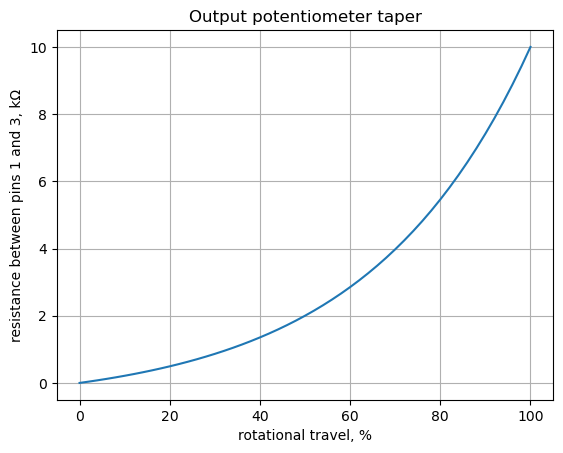

In [35]:
p3_value = 10e3 # full scale value of potentiometer
potentiometer_rotation = np.linspace(0,1,51)*100

plt.plot(potentiometer_rotation,audio_pot_10k(potentiometer_rotation)/1e3,'-')

plt.ylabel('resistance between pins 1 and 3, k\u03A9')
plt.xlabel('rotational travel, %')
plt.grid()
plt.title('Output potentiometer taper')

plt.show()

As shown above, the resistance value between pins 1 and 2 is an exponential function of pot rotation. If a linear Pot was used, the spacing of the output level in some of the frequency response plots below would be compressed in a narrow dB range that didn't look correct. 

Plot the frequency respose of the bypass circuit, $H(s)=\frac {v_2} {V_1}$, for various settings of P3.  

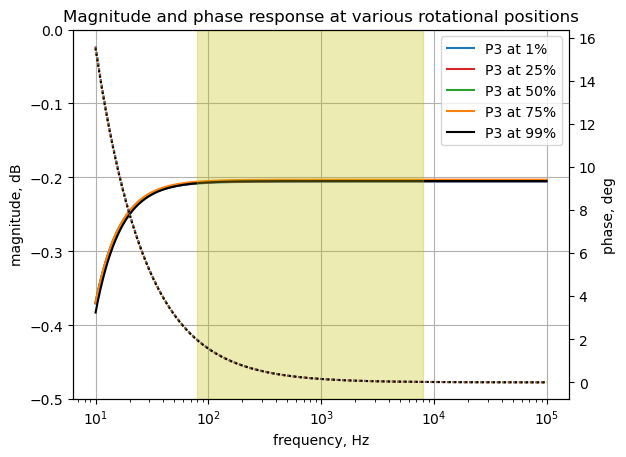

In [36]:
#| label: fig-bypass-path-freq-plot
#| echo: true
#| fig-cap: Bypass path magnitude and phase response

output_setting = np.array([1,25,50,75,99])
#level_value = 10e3

color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi

for i in range (len(output_setting)):
    
    element_values[Rp3a] = p3_value - audio_pot_10k(output_setting[i])
    element_values[Rp3b] = audio_pot_10k(output_setting[i])

    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v1]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

    w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='P3 at {:.0f}%'.format(output_setting[i]))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='P3 at {:.0f}%'.format(output_setting[i]))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)
    
#ax1.legend(loc='lower left')
#ax2.legend(loc='lower right')
ax1.set_ylim((-0.5,0))
ax1.legend()
ax1.grid()
plt.title('Magnitude and phase response at various rotational positions')
plt.show()

The plot above shows the frequency response for the bypass circuit. The highlighted frequncy range of 80 to 8,000 Hz is the audio range of a typical electric guitar. The gain is flat across this range and there is a small amout of insertion loss of about 0.2 dB across the guitar audio band. P3 has only a very small effect on the gain. The annotation for the plot show the position of P3 at various rotation displacements from 1 to 99 percent.

#### Pole / zero plot 
The following calculations solve for the pole and zero locations for the bypass circuit with the wiper position on P3 set to $5k\Omega$. 

In [37]:
# output_setting = 50%, knob position as a percent of full rotation
element_values[Rp3a] = 5e3
element_values[Rp3b] = 5e3

The element values are substituted into the equations, solutions are obtained and the ratio $H = \frac {v_2}{v_1}$ is formulated. Then the coeficients of the numerator and denominator polynominals are saved to variables a and b.

In [38]:
NE = NE_sym.subs(element_values)
U = solve(NE,X)
H = U[v2]/U[v1]
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

Use the SciPy function [TransferFunction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) to represent the system as the continuous-time transfer function. 

In [39]:
sys_tf = signal.TransferFunction(a,b)

The poles and zeros of the transfer function can easly be obtained with the following code:

In [40]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

The poles and zeros of the preamp transfer function are plotted.

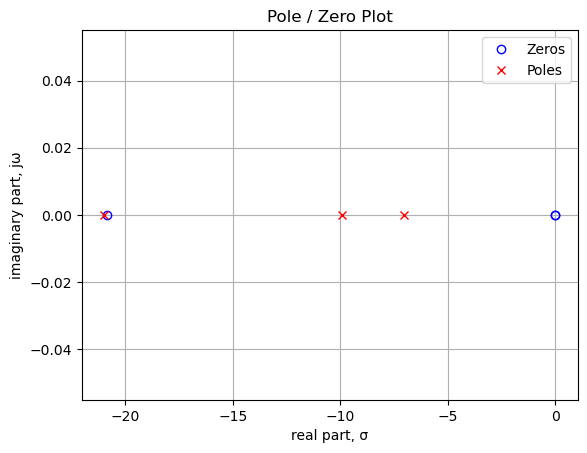

In [41]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03C3')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

$\large{\color {red} {\text{what is the pole/zero plot telling us? ... }}}$  

As shown above and printed below, there are three zeros and three poles in the transfer function. The plotted position of the poles and zeros are in units of radian frequency. There are two zeros at 0 Hz and one at 3.3 Hz. The position of zeros at 0 Hz indicate that the transfer function is a high pass filter and the equal count of poles and zeros indicate the system has a flat frequency response over some frequencies. The pole zero pair near 3.3 Hz tend to cancel since they are very close in frequency. The system zeros stem from C1 and C2, which block the direct current path. One of the system poles stems from C1 , R1 and R2. The other system pole stems from C2 and primarily R3. 

The following cells print the zero and pole values in Hz.

In [42]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in range(len(sys_zeros)):
    print('z{:d}: {:,.2f} Hz'.format(i,sys_zeros[i]/(2*np.pi)))

print('number of poles: {:d}'.format(len(sys_poles)))
for i in range(len(sys_poles)):
    print('p{:d}: {:,.2f} Hz'.format(i,sys_poles[i]/(2*np.pi)))

number of zeros: 3
z0: -3.31 Hz
z1: 0.00 Hz
z2: 0.00 Hz
number of poles: 3
p0: -3.34 Hz
p1: -1.58 Hz
p2: -1.12 Hz


#### Step response 

$\large{\color {red} {\text{Step response}}}$  

The amplitude of the step response inout is a 0.1 volt square wave with peak to peak amplitude of 0 to 0.1 volts. This amplitude is used because ...

The step response is calculated by using the SciPy function [lsim](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html), which can be used to simulate output of a continuous-time linear system from the continuous-time linear time invariant system base class. The function lsim allows us to evaluate the performance characteristics of the circuit to square wave input.  

$\large{\color {red} {\text{what are these plots saying? ... }}}$  

If we didn't already know from the schematic that the bypass path is AC coupled, the step response would show us that for large values of time, the response is zero, therefore DC is being blocked. The input signal for the step response is 0.1 volt step. The circuit responds to the rising edge of square wave and tracks the leading edge of the input. This is because at time zero, the capacitors in the circuit are at their initial condition which is zero volts. A this instant, the output voltage is almost 0.1 volts, since the value of the resistors along the path don't present much a voltage divider. As time increases, the voltage on the capacitors will approach their final values according to Kirchhoff’s Current Law, which results in a final output voltage of zero for time greater than about one second.   

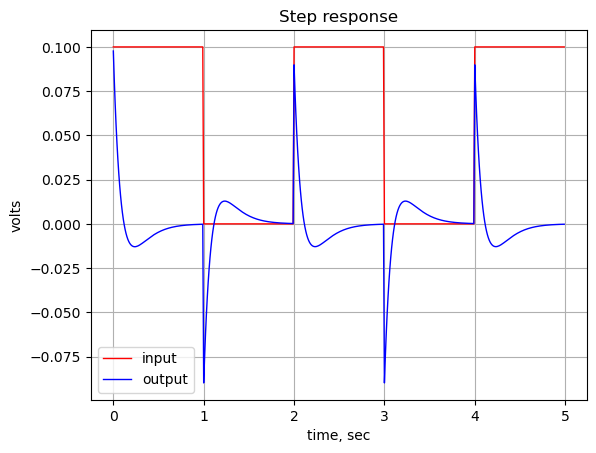

In [43]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, 5, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*0.5*t, duty=0.5)/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

The square wave response shows about 10% overshoot and a settling time of about 1 second with no ringing. This is a result of series connection of C1 and C2 in the path which equate to a zero at DC and two low frequency poles at 1.1 and 1.6 Hz. The location of these poles result from the relatively large time constants produced by C2 and R3 as well as from C15 and R28.

You would normally expect the step response to have an no overshoot for what is essencially a pair of simple cascased RC high pass filters. You would expect the transient step response to be an exponcial decay function, asymptotically approaching zero volts. The bypass network has three capacitors, C1, C2 and C15. This makes the circuit a third order system. From the plot above, we can see that there is some overshoot, but no ringing in the step response. This implies that the damping ratio is between 0.7 and 1. We can approximate the damping ration by considereing the two dominate poles of the system and ignoring the highest frequency pole.

As calculated above, the transfer fuction of the bypass circuit for P3 at 50% is $H(s)$.

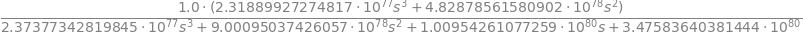

In [44]:
H

As calculated above, the system poles are:

In [45]:
print(sys_poles)

[-20.9622128   -9.9009901   -7.05511848]


We can have Numpy to genertate the system polynominal.

In [46]:
sys_poly = np.poly(sys_poles)
print(sys_poly)

[1.00000000e+00 3.79183214e+01 4.25290215e+02 1.46426629e+03]


Normalize the system polynominal on the secoded order term by dividing the polynomibal coefficients by the second order coeficient. 

In [47]:
norm_sys_poly = sys_poly/sys_poly[1]
print(norm_sys_poly)

[2.63724755e-02 1.00000000e+00 1.12159557e+01 3.86163267e+01]


This puts the polinominal into the form:

$as^3 + s^{2}+\frac {\omega _N}{Q}s + \omega _N^2$

We are going to ignore the $as^3$ term and only consider the other terms:

$s^{2}+\frac {\omega _N}{Q}s + \omega _N^2$

The nautral frquency can be found from the last term in the normalized system polynominal.

In [48]:
w_n = np.sqrt(norm_sys_poly[3])
w_n

The damping ratio can be found solving for the damping ratio, $\delta$, in the equation:

$\frac {\omega _N}{Q} = 2 \delta \omega _N$

 
 

In [49]:
damp_ratio = norm_sys_poly[2]/(2*w_n)
print('damping ratio = {:.2f}'.format(damp_ratio))

damping ratio = 0.90


The damping ratio is less than between 0.7 and 1, leading to the behavior shown in the step response.

$\large{\color {red} {\text{verify step response with LTSpice ... }}}$  

#### Group delay

The following python code calculates and plots the group delay for the transfer function.

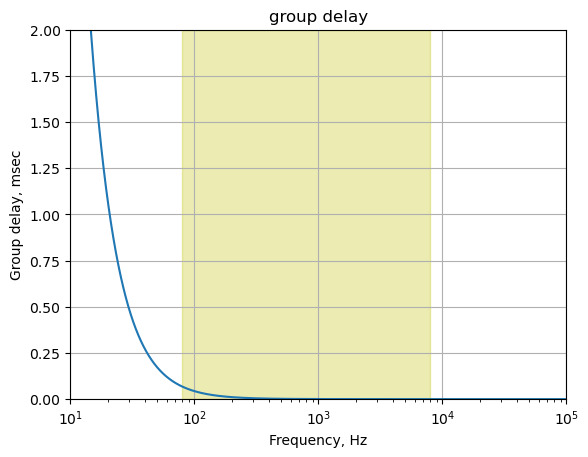

In [50]:
plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w)*1000,'-',label='group delay')

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.xlim((10,100e3))
plt.ylim((0,2))

plt.ylabel('Group delay, msec')
plt.xlabel('Frequency, Hz')
plt.grid()
plt.show()

$\large{\color {red} {\text{comments about group delay ... }}}$  

The plot above shows that for frequencies in the guitar audio band, the group delay variation is less than 2 ms and therefore below the threshold of audibility as described in @sec-Group_delay.

#### Effect signal leakage into bypass path
The frequency response plot below shows the signal gain from the effects path into the output when the switch is in the bypass position. The transfer function, $H(s)=\frac {v_2} {v_{11}}$, is plotted for various settings of P3, whith $V_1=0$, $R_{26}=68k\Omega$ and $R_{27}=0.01\Omega$.  

$\large{\color {red} {\text{comment ... }}}$  

comment ...

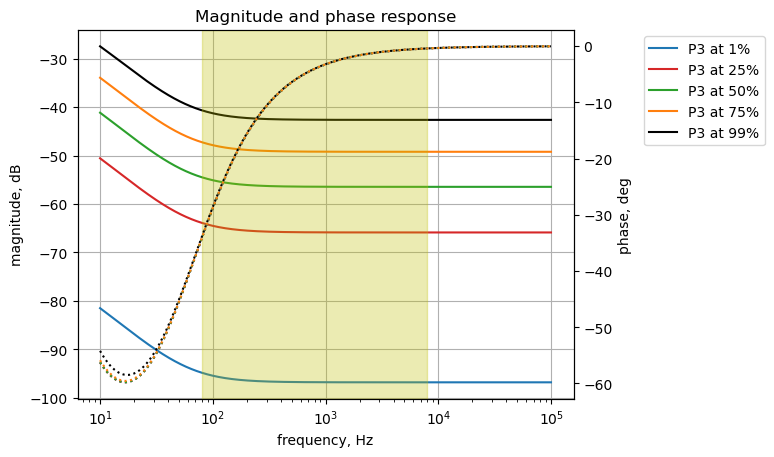

In [51]:
#| label: fig-bypass-path-effect-leakage-freq-plot
#| echo: true
#| fig-cap: Effect signal leakage into bypass path magnitude and phase response

element_values[V1] = 0
element_values[V2] = 1
element_values[R26] = 0.01
element_values[R27] = 68e3

output_setting = np.array([1,25,50,75,99])

color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi

for i in range(len(output_setting)):
    
    element_values[Rp3a] = p3_value - audio_pot_10k(output_setting[i])
    element_values[Rp3b] = audio_pot_10k(output_setting[i])
    
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v11]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

    w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='P3 at {:.0f}%'.format(output_setting[i]))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='P3 at {:.0f}%'.format(output_setting[i]))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)
    
#ax1.legend(loc='lower left')
#ax2.legend(loc='lower right')
ax1.legend(bbox_to_anchor=(1.4,1))
ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

The plot above shows that the effects signal is isolated from the bypass signal by more than 40 dB over the audio band of the guitar. 

### Effects path output frequency response
The signal through the effects path is analyized from C15 to the output at J2. In @fig-Klon-Centaur_bypass_v1_sch, the output of U2A is replaced by $V_2$ at node 11. The frequency response for the transfer function, $H(s)=\frac{v_2}{v_{11}}$ is plotted below. $V_1$ has been set to zero, $R_{26}=68k\Omega$ and $R_{27}=0.01\Omega$

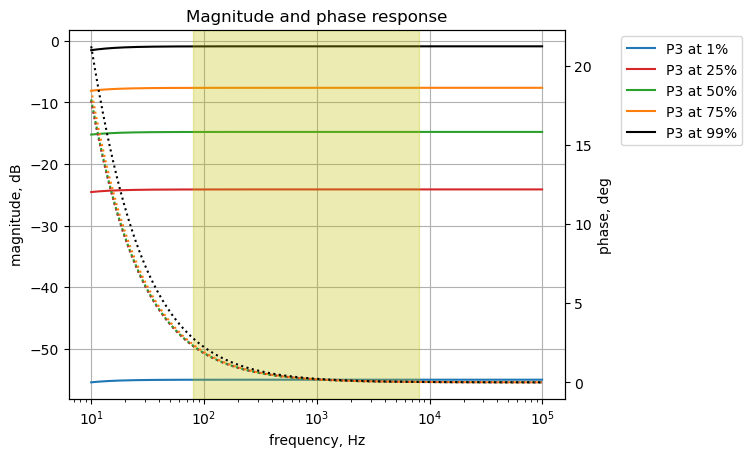

In [52]:
#| label: fig-effect-output-freq-plot
#| echo: true
#| fig-cap: Effect output path magnitude and phase response

element_values[V1] = 0
element_values[V2] = 1
element_values[R26] = 68e3
element_values[R27] = 0.01

output_setting = np.array([1,25,50,75,99])

color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi

for i in range(len(output_setting)):

    element_values[Rp3a] = p3_value - audio_pot_10k(output_setting[i])
    element_values[Rp3b] = audio_pot_10k(output_setting[i])
    
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v11]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

    w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='P3 at {:.0f}%'.format(output_setting[i]))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='P3 at {:.0f}%'.format(output_setting[i]))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)
    
#ax1.legend(loc='lower left')
ax1.legend(bbox_to_anchor=(1.1,1))
#ax2.legend(loc='lower right')
ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

The gain of output circuit for the effects path can be adjusted by P3 to have a gain of a bit less than 0 dB to about -55 dB. 

#### Poles and zeros
Setting the wiper position of P3 to a postion that puts $5k\Omega$ on each side of the wiper, the poles and zeros for output cicruit are calculated. 

In [53]:
# output_setting = 50%, knob position as a percent of full rotation
element_values[Rp3a] = 5e3
element_values[Rp3b] = 5e3

In [54]:
NE = NE_sym.subs(element_values)
U = solve(NE,X)
H = U[v2]/U[v11]
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

Poles and zeros of the transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [55]:
sys_tf = signal.TransferFunction(a,b)

sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

The poles and zeros of the transfer function are plotted below. As indicated in the legend, the location of the zeros are marked with blue circles and the locationx of the poles are marked with a red x's.

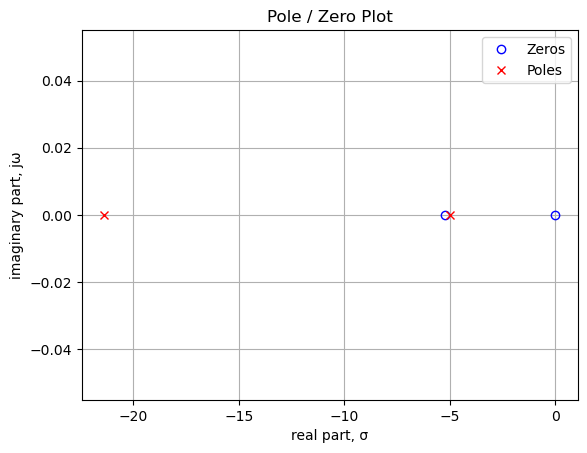

In [56]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03C3')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

$\large{\color {red} {\text{what is the pole/zero plot telling us? ... }}}$  

In the plot above, the units of frequency are in radians, cycles per 1 radian, or $2\pi$ degrees. There is a zero at 0 Hz, which is from C15. The second zero is from C2. The two poles are also from C15 and C2 combined with various resistors in the network. 

Printing these values in Hz.

In [57]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in range(len(sys_zeros)):
    print('z{:d}: {:,.2f} Hz'.format(i,sys_zeros[i]/(2*np.pi)))

print('number of poles: {:d}'.format(len(sys_poles)))
for i in range(len(sys_poles)):
    print('p{:d}: {:,.2f} Hz'.format(i,sys_poles[i]/(2*np.pi)))

number of zeros: 2
z0: -0.83 Hz
z1: 0.00 Hz
number of poles: 2
p0: -3.40 Hz
p1: -0.80 Hz


#### Step response
The step response of the effects path out circuit is plotted below.


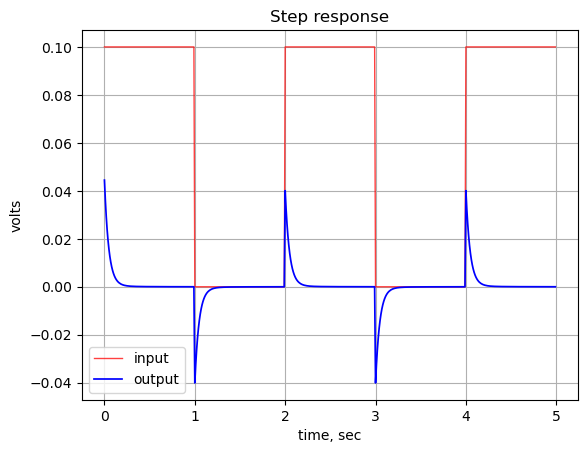

In [58]:
t = np.linspace(0, 5, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*0.5*t, duty=0.5)/20+1/20

t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha=0.75, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth=1.25, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

$\large{\color {red} {\text{what are these plots saying? ... }}}$  

There is no noticiable overshoot in the impulse or step response for the output circuit. 

#### Group delay
The following python code calculates and plots the group delay.

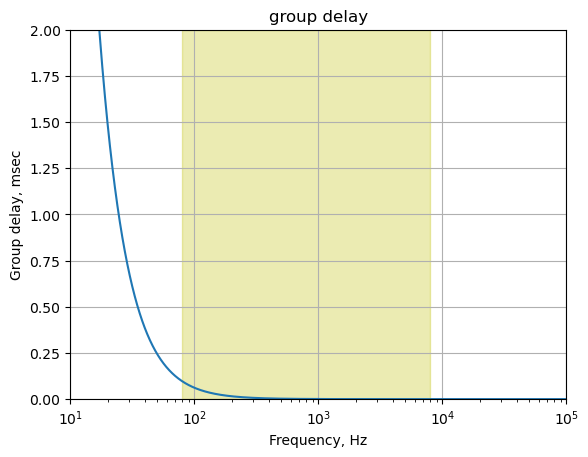

In [59]:
plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w)*1000,'-',label='group delay')

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.xlim((10,100e3))
plt.ylim((0,2))

plt.ylabel('Group delay, msec')
plt.xlabel('Frequency, Hz')
plt.grid()
plt.show()

$\large{\color {red} {\text{comments about group delay ... }}}$  

The plot above shows that for frequencies in the guitar audio band, the group delay variation is less than 2 ms and therefore below the threshold of audibility as described in @sec-Group_delay.

#### Bypass signal leakage into effects path
The bypass signal leacjage into the effects path is calculated and plotted below. The bypass switch is simulated by setting the values of $R_{26}$ and $R_{27}$

$\large{\color {red} {\text{comment ... }}}$  

comment ...

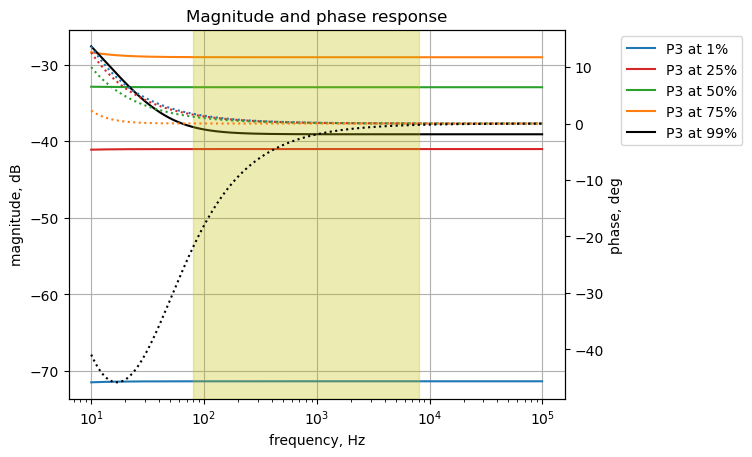

In [60]:
#| label: fig-effect-path-bypass-leakage-freq-plot
#| echo: true
#| fig-cap: Bypass signal leakage into effects path magnitude and phase response

element_values[V1] = 1
element_values[V2] = 0
element_values[R26] = 68e3
element_values[R27] = 0.01

output_setting = np.array([1,25,50,75,99])

x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi

color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

for i in range(len(output_setting)):

    element_values[Rp3a] = p3_value - audio_pot_10k(output_setting[i]) 
    element_values[Rp3b] = audio_pot_10k(output_setting[i])
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v1]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

    #x = np.logspace(-1, 5, 2000, endpoint=False)*2*np.pi
    w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg
    #bypass_leakage_mag[i] = mag

    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='P3 at {:.0f}%'.format(output_setting[i]))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='P3 at {:.0f}%'.format(output_setting[i]))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)
    
#ax1.legend(loc='lower left')
ax1.legend(bbox_to_anchor=(1.1,1))
#ax2.legend(loc='lower right')
ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

The gain of output circuit for the bypass path to the output with the bypass switch off varies as a function of P3 position. As shown above the maximum leakage for the values plotted is at a rotational position of 75%.

The signal leakage into the other path, while not zero is very small and not a concern.

## Treble control
The treble control circuit is highlighted in the schematic below and can be analyzed independently from the rest of the Klon Centaur circuit if we consider the sub circuit from the output of U2A to the output of U2B. The isolation and buffering provided by the Op Amp allows us to analyze this part of the pedal without having to consider other parts of the circuit.

![Schematic of klon-centaur-schematic-high-res_w_treble_highlight](klon-centaur-schematic-high-res_w_treble_highlight.png){#fig-klon-centaur-schematic-high-res_w_treble_highlight_sch}

The circuit for the treble control was drawn using LTSpice and shown below. The treble control allows the frequency response of the pedal to be adjusted. The treble circuit resembles the treble portion of the classic [Baxandall](https://en.wikipedia.org/wiki/Peter_Baxandall) tone control circuit. As shown in the circuit analysis below, the circuit can cut or boost the treble frequencies with a single potentiometer control. The capacitor, C14, is connected from the inverting terminal of U2B to the wiper contact of potentiometer P2. This places a frequency dependent negative feedback network around the Op Amp.

There are several interesting on line references for audio tone control circuits:

- [tone circuit calculator](https://www.petervis.com/record_players_and_turntables/baxandall-tone-control/circuit-and-calculator.html)
- [Amplifier Controls](https://www.learnabout-electronics.org/Amplifiers/amplifiers42.php)
- [Audio Tone Control Using The TLC074 Operational Amplifier](https://www.ti.com/lit/an/sloa042/sloa042.pdf)
- [James tone stack](https://www.guitarscience.net/tsc/james_4.htm#RIN=600&R1=2200&R2=2200&R3=2200&RB=10k&RT=10k&RF=600&CB=220n&CT1=10n&CT2=10n&RB_pot=Linear&RT_pot=Linear)
- [James Tone Stack - Analysis](https://www.ampbooks.com/mobile/amp-technology/james-tonestack-analysis/)

![Schematic of treble path](Klon-Centaur_treble_v2.png){#fig-Klon-Centaur_treble_v2_sch}

V1 is the input signal for circuit and for frequency analysis the value is 1.

Two resistors, R21, a 1.8K $\Omega$ resistor and R23, a 4.7K $\Omega$ resistor, sit on either side of the treble potentiometer and skew the treble control towards treble boost at the control mid point of rotation, since R21 is a lower value. R21 and R23 also limit the amount of boost and cut provided by the treble circuit.

R22 is a 100K $\Omega$ resistor and with R241 set the DC gain of the Op Amp circuit.

The treble control, potentiometer P2, is modeled as a voltage divider consisting of resistors with reference designators of Rp2a and Rp2b. The value of Rp2a is controlled by the equation $Rp2a=10k-R_{treble}$ and the value of Rp2b is controlled by the equation $Rp2b=R_{treble}$, with the variable $R_{treble}$ indicating the value of the potentiometer set by the rotational position of the knob. 

C14 is a 3.9n Farad capacitor and one end is connected to the inverting input of the Op Amp, which is a virtual ground. The other end is connected to the wiper terminal of P2. 

R21, Rp2a and C14 form low pass network, since C14 is shunting the input signal to the virtual ground. This puts a zero in the voltage transfer function. The output signal from the Op Amp is fed back to the inverting input through the network of R23, Rp2b and C14 and because these are in the negative feedback path put a pole in the voltage transfer function. The relative pole and zero location in the complex frequency plane determine if the circuit will provide boost or cut to the treble frequencies.

R241 is a 100K $\Omega$ resistor in the negative feedback path of the Op Amp along with the components R23, Rp2b and C14. R241 along with R22, P2, R21 and R23 set the DC gain for the circuit.

U2B is an ideal Op Amp in this analysis.  

Load the net list for the treble control circuit.

In [61]:
treble_v2_net_list = '''
V1 1 0 1
R21 1 4 1.8e3
R22 3 1 100e3
Rp2a 4 5 5e3
Rp2b 5 6 5e3
C14 3 5 3.9e-9
R241 2 3 100e3
R23 2 6 4.7e3
O2b 3 0 2
'''

Call the symbolic modified nodal analysis function to genrate the network marticies and databases.

In [62]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(treble_v2_net_list)

Build the network equations and display the equations.

In [63]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = I_{V1} + v_{1} \cdot \left(\frac{1}{R_{22}} + \frac{1}{R_{21}}\right) - \frac{v_{3}}{R_{22}} - \frac{v_{4}}{R_{21}}$<br>$0 = I_{O2b} + v_{2} \cdot \left(\frac{1}{R_{241}} + \frac{1}{R_{23}}\right) - \frac{v_{3}}{R_{241}} - \frac{v_{6}}{R_{23}}$<br>$0 = - C_{14} s v_{5} + v_{3} \left(C_{14} s + \frac{1}{R_{241}} + \frac{1}{R_{22}}\right) - \frac{v_{2}}{R_{241}} - \frac{v_{1}}{R_{22}}$<br>$0 = v_{4} \cdot \left(\frac{1}{Rp2a} + \frac{1}{R_{21}}\right) - \frac{v_{5}}{Rp2a} - \frac{v_{1}}{R_{21}}$<br>$0 = - C_{14} s v_{3} + v_{5} \left(C_{14} s + \frac{1}{Rp2b} + \frac{1}{Rp2a}\right) - \frac{v_{6}}{Rp2b} - \frac{v_{4}}{Rp2a}$<br>$0 = v_{6} \cdot \left(\frac{1}{Rp2b} + \frac{1}{R_{23}}\right) - \frac{v_{5}}{Rp2b} - \frac{v_{2}}{R_{23}}$<br>$V_{1} = v_{1}$<br>$0 = v_{3}$<br>

Turn the free symbols into SymPy variables.

In [64]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Get the element values from the newtork database.

In [65]:
element_values = SymMNA.get_part_values(network_df)

### Symbolic solution
The network equations can be solved symbolically and the solution to the node voltages and unknown currents is displayed.

In [66]:
U_sym = solve(NE_sym,X)

# display the symbolic solution
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{- C_{14} R_{21} R_{23} R_{241} V_{1} s - C_{14} R_{21} R_{241} Rp2b V_{1} s - C_{14} R_{22} R_{23} R_{241} V_{1} s - C_{14} R_{22} R_{241} Rp2b V_{1} s - C_{14} R_{23} R_{241} Rp2a V_{1} s - C_{14} R_{241} Rp2a Rp2b V_{1} s - R_{21} R_{241} V_{1} - R_{23} R_{241} V_{1} - R_{241} Rp2a V_{1} - R_{241} Rp2b V_{1}}{C_{14} R_{21} R_{22} R_{23} s + C_{14} R_{21} R_{22} R_{241} s + C_{14} R_{21} R_{22} Rp2b s + C_{14} R_{22} R_{23} Rp2a s + C_{14} R_{22} R_{241} Rp2a s + C_{14} R_{22} Rp2a Rp2b s + R_{21} R_{22} + R_{22} R_{23} + R_{22} Rp2a + R_{22} Rp2b}$<br>$v_{3} = 0$<br>$v_{4} = \frac{C_{14} R_{22} R_{23} Rp2a V_{1} s + C_{14} R_{22} R_{241} Rp2a V_{1} s + C_{14} R_{22} Rp2a Rp2b V_{1} s - R_{21} R_{241} V_{1} + R_{22} R_{23} V_{1} + R_{22} Rp2a V_{1} + R_{22} Rp2b V_{1}}{C_{14} R_{21} R_{22} R_{23} s + C_{14} R_{21} R_{22} R_{241} s + C_{14} R_{21} R_{22} Rp2b s + C_{14} R_{22} R_{23} Rp2a s + C_{14} R_{22} R_{241} Rp2a s + C_{14} R_{22} Rp2a Rp2b s + R_{21} R_{22} + R_{22} R_{23} + R_{22} Rp2a + R_{22} Rp2b}$<br>$v_{5} = \frac{- R_{21} R_{241} V_{1} + R_{22} R_{23} V_{1} + R_{22} Rp2b V_{1} - R_{241} Rp2a V_{1}}{C_{14} R_{21} R_{22} R_{23} s + C_{14} R_{21} R_{22} R_{241} s + C_{14} R_{21} R_{22} Rp2b s + C_{14} R_{22} R_{23} Rp2a s + C_{14} R_{22} R_{241} Rp2a s + C_{14} R_{22} Rp2a Rp2b s + R_{21} R_{22} + R_{22} R_{23} + R_{22} Rp2a + R_{22} Rp2b}$<br>$v_{6} = \frac{- C_{14} R_{21} R_{241} Rp2b V_{1} s - C_{14} R_{22} R_{241} Rp2b V_{1} s - C_{14} R_{241} Rp2a Rp2b V_{1} s - R_{21} R_{241} V_{1} + R_{22} R_{23} V_{1} - R_{241} Rp2a V_{1} - R_{241} Rp2b V_{1}}{C_{14} R_{21} R_{22} R_{23} s + C_{14} R_{21} R_{22} R_{241} s + C_{14} R_{21} R_{22} Rp2b s + C_{14} R_{22} R_{23} Rp2a s + C_{14} R_{22} R_{241} Rp2a s + C_{14} R_{22} Rp2a Rp2b s + R_{21} R_{22} + R_{22} R_{23} + R_{22} Rp2a + R_{22} Rp2b}$<br>$I_{V1} = \frac{- C_{14} R_{21} R_{23} V_{1} s - C_{14} R_{21} R_{241} V_{1} s - C_{14} R_{21} Rp2b V_{1} s - C_{14} R_{22} R_{23} V_{1} s - C_{14} R_{22} R_{241} V_{1} s - C_{14} R_{22} Rp2b V_{1} s - C_{14} R_{23} Rp2a V_{1} s - C_{14} R_{241} Rp2a V_{1} s - C_{14} Rp2a Rp2b V_{1} s - R_{21} V_{1} - R_{22} V_{1} - R_{23} V_{1} - R_{241} V_{1} - Rp2a V_{1} - Rp2b V_{1}}{C_{14} R_{21} R_{22} R_{23} s + C_{14} R_{21} R_{22} R_{241} s + C_{14} R_{21} R_{22} Rp2b s + C_{14} R_{22} R_{23} Rp2a s + C_{14} R_{22} R_{241} Rp2a s + C_{14} R_{22} Rp2a Rp2b s + R_{21} R_{22} + R_{22} R_{23} + R_{22} Rp2a + R_{22} Rp2b}$<br>$I_{O2b} = \frac{C_{14} R_{21} R_{23} V_{1} s + C_{14} R_{21} R_{241} V_{1} s + C_{14} R_{21} Rp2b V_{1} s + C_{14} R_{22} R_{23} V_{1} s + C_{14} R_{22} R_{241} V_{1} s + C_{14} R_{22} Rp2b V_{1} s + C_{14} R_{23} Rp2a V_{1} s + C_{14} R_{241} Rp2a V_{1} s + C_{14} Rp2a Rp2b V_{1} s + R_{21} V_{1} + R_{22} V_{1} + R_{23} V_{1} + R_{241} V_{1} + Rp2a V_{1} + Rp2b V_{1}}{C_{14} R_{21} R_{22} R_{23} s + C_{14} R_{21} R_{22} R_{241} s + C_{14} R_{21} R_{22} Rp2b s + C_{14} R_{22} R_{23} Rp2a s + C_{14} R_{22} R_{241} Rp2a s + C_{14} R_{22} Rp2a Rp2b s + R_{21} R_{22} + R_{22} R_{23} + R_{22} Rp2a + R_{22} Rp2b}$<br>

### Transfer function
The transfer function, $H(s)=\frac{v_2}{v_1}$, can epressed in symbolic form and is diplayed below.

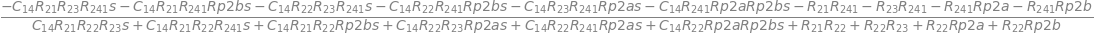

In [67]:
H_sym = cancel(U_sym[v2]/U_sym[v1])
H_sym

### DC gain
The gain of the treble circuit at zero frequency can be calculated by puting the component values into $H(s)$ and setting $s=0$ as shown below.

In [68]:
H_sym.subs({s:0}).subs(element_values)

The DC gain of the treble circuit is -1.

### Solve P2 postion for flat treble response
The position of P2 that gives a flat treble response can be calculated. A flat frequency response occures when the numerator of $H(s)$ equal to the denominator. Another way of saying this is, the frequency respose is flat when the system pole and zero are at the same frequency. Since $R_{21}$ and $R_{23}$ have different values, a flat frequency response will not occure at the rotational mide point of P2.

In the cells that follow, the SymPy symbols $P2a$ and $P2b$ are defind and are substituted into the system transfer function. This is done for two reasons, first to make it clear that we are solving for the value of P2 sections 'a' and 'b'. Second, we want to substitute nemerical values for the sysmbols and we don't want to over write the values of Rp2a and Rp2b. The modified $H_{sym}$ is diplayed below.

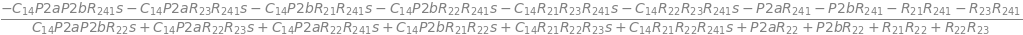

In [69]:
P2a, P2b = symbols('P2a P2b')

H_sym1 = H_sym.subs({𝑅𝑝2𝑏:P2b,Rp2a:P2a})
H_sym1

The numerator and demoninator of $H_{sym}$ can be extracted and saved of a new variables num_sym and denom_sym.

In [70]:
num_sym,denom_sym = fraction(H_sym1)

In [71]:
num_sym

The root of the numerator polynominal is solved for and diplayed.

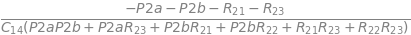

In [72]:
num_root_sym = solve(num_sym,s)[0]
num_root_sym

Display the demoninator polinominal.

In [73]:
denom_sym

The root of the denominator polynominal is solved for and diplayed.

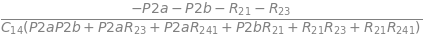

In [74]:
denom_root_sym = solve(denom_sym,s)[0]
denom_root_sym

Numerical values are substituted into the expressions for the roots, while leaving P2a and P2b as variables.

In [75]:
num_root = num_root_sym.subs(element_values)
num_root

In [76]:
denom_root = denom_root_sym.subs(element_values)
denom_root

PymPy can be used to solv the equations:

$P2_a+P2_b = 10k\Omega$

$numerator_{root} = denominator_{root}$

Rearranging the equations to put zero on the right hand side of the equal sign and using SymPy to solve for P2a nd P2b, we get:

In [77]:
P2_a, P2_b = solve([num_root-denom_root,P2a+P2b-10000],P2a,P2b)[0]
print('solution: P2a = {:,.0f} and p2b = {:,.0f} ohms'.format(P2_a, P2_b))

solution: P2a = 6,450 and p2b = 3,550 ohms


This means that for a rotational displacement of 35.5% on P2, the treble response will be flat. 

### Frequency response vs P2
The frequency response of the treblw circuit as a function of P2 for selected positions is plotted below.

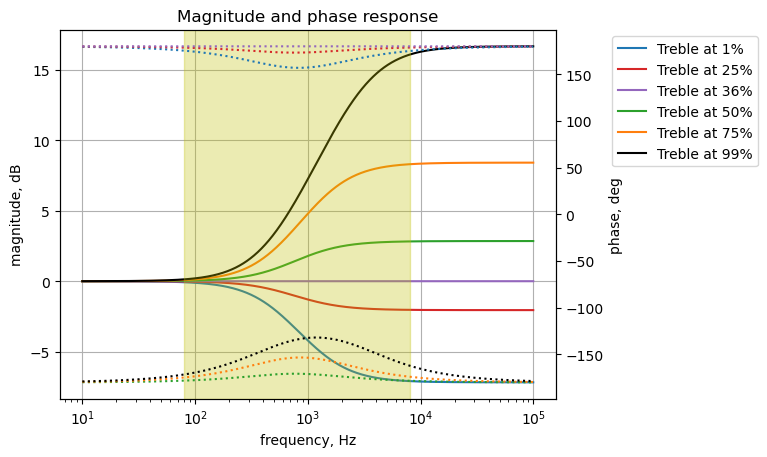

In [78]:
#| label: fig-treble-path-freq-plot
#| echo: true
#| fig-cap: Treble path magnitude and phase response as a function of treble setting (P2). Solid lines are the magnitude responses at various settings of P2 and the dashed lines are the phase responses.

P2_setting = np.array([1,25,35.5,50,75,99])/100
P2_value = 10e3

tf_num_coef_list = []
tf_denom_coef_list = []

color_list = ['tab:blue','tab:red','tab:purple','tab:green','tab:orange','k']

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

for i in range(len(P2_setting)):
    element_values[Rp2a] = P2_value - P2_setting[i]*P2_value 
    element_values[Rp2b] = P2_setting[i]*P2_value 
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v1]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
    tf_num_coef_list.append(a)
    tf_denom_coef_list.append(b)
    
    x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
    w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='Treble at {:.0f}%'.format(P2_setting[i]*100))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='phase at {:.0f}%'.format(P2_setting[i]*100))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

#ax2.set_ylim((90,270))

#ax1.legend(loc='upper left')
ax1.legend(bbox_to_anchor=(1.1,1))
#ax2.legend(loc='lower left')
#ax2.legend(bbox_to_anchor=(1.5,0.5))

ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

### Step response at P2=50%
Setting the value of P2 to the mid point, P2 = 50%, the transfer function is computed.

In [79]:
P2_setting = 0.5 # percentage of rotation

element_values[Rp2a] = P2_setting*P2_value
element_values[Rp2b] = P2_value - P2_setting*P2_value

NE = NE_sym.subs(element_values)
U = solve(NE,X)
H = U[v2]/U[v1]

num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

sys_tf = signal.TransferFunction(a,b)

sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

The following code plots the impulse and step response.

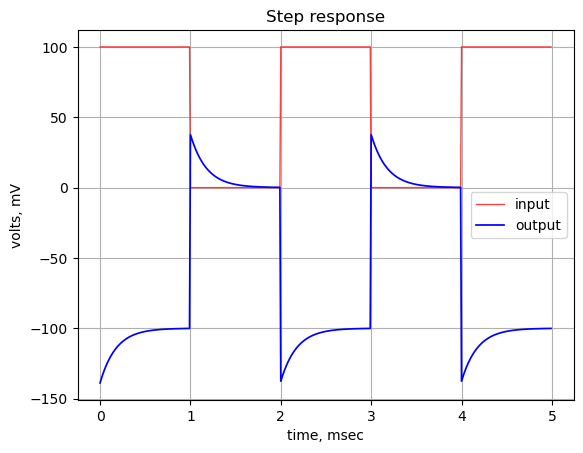

In [80]:
t = np.linspace(0, 0.005, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*500*t, duty=0.5)/20+1/20

t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal*1e3, 'r', alpha=0.75, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step*1e3,'b', linewidth=1.25, label='output')
plt.title('Step response')
plt.ylabel('volts, mV')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

$\large{\color {red} {\text{what are these plots saying? ... }}}$  
Both the impuse and step response have a rather long decay time. The step response asymotatoically appreoases -1. 

The following python code calculates and plots the group delay. Notice that the scale for the vertical axis is msec.

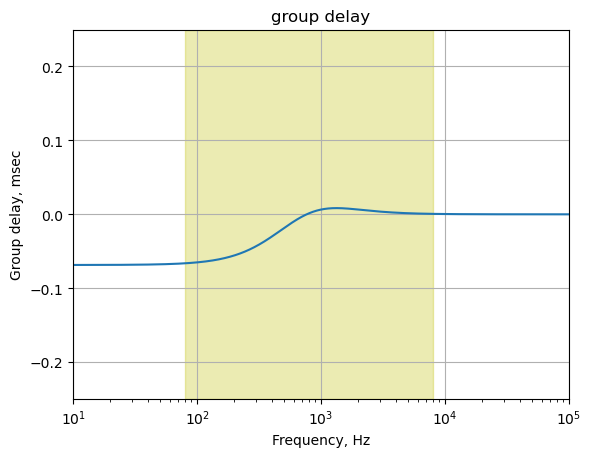

In [81]:
x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w)*1e3,'-',label='group delay')

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.xlim((10,100e3))
plt.ylim((-0.25,0.25))

plt.ylabel('Group delay, msec')
plt.xlabel('Frequency, Hz')
plt.grid()
plt.show()

$\large{\color {red} {\text{comments about group delay ... }}}$  

The plot above shows that for frequencies in the guitar audio band, the group delay variation is less than 2 ms and therefore below the threshold of audibility as described in @sec-Group_delay.

### Pole/zero locus plot
The plot below shows the frequency locations for the treble control pole and zero locations as a function of P2 rotation. Since the poles and zeros don't have imaginary parts, the complex frequency is plotted on the vertical axis versus the treble control rotational position, from 1 to 99 percent. The plot provides a visual indication of how the poles and zeros change as a function P2.

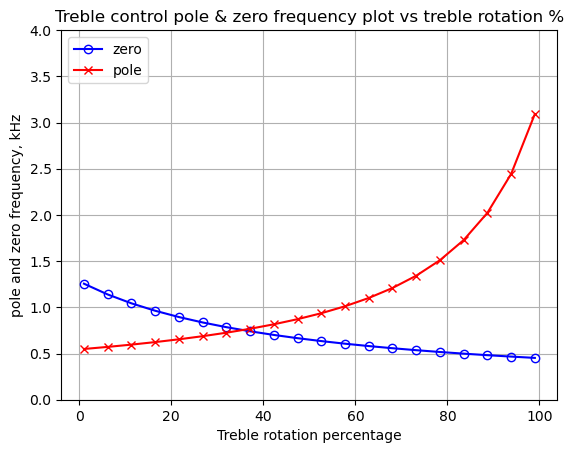

In [82]:
sym_num, sym_denom = fraction(H_sym) #returns numerator and denominator

p2_value = 10e3
num_roots = []
denom_roots = []
for i in np.linspace(1,99,20)/100:
    element_values[Rp2a] = p2_value - i*p2_value
    element_values[Rp2b] = i*p2_value
    num_roots.append(solve(sym_num.subs(element_values),s))
    denom_roots.append(solve(sym_denom.subs(element_values),s))

plt.plot(np.linspace(1,99,len(np.array(num_roots).flatten())),-np.array(num_roots).flatten()/(2*np.pi)/1e3,'o-b', markerfacecolor='none',label='zero')
plt.plot(np.linspace(1,99,len(np.array(denom_roots).flatten())),-np.array(denom_roots).flatten()/(2*np.pi)/1e3,'x-r',label='pole')

plt.ylim((0,4))
plt.legend(loc='upper left')
plt.title('Treble control pole & zero frequency plot vs treble rotation %')
plt.xlabel('Treble rotation percentage')
plt.ylabel('pole and zero frequency, kHz')
plt.grid()

plt.show()

$\large{\color {red} {\text{what is the pole/zero plot telling us? ... }}}$  

As P2 is rotated, the frequency location of the pole and zero move in oppsit directions. At low P2 rotation percentage, the pole has a lower frequency location than the zero, and above 35.5% rotation the pole has a higher frequency location than the zero.  

Since each zero has the effect of adding a -20 dB slope contribution to the frequency response and each pole has the effect of adding a +20 dB slope contribution to the frequency response, at low rotation percentage, there is a negative slop in the frequency response plot from the pole frequency to the zero frequency, where the slop is cancelled by the zero. The designers of the Klon, either by acident or design chose to give the treble control more boost than cut over the rotational range. 

## Effects path linear analysis {#sec-effects_paths_linear_analysis}
When the bypass switch, S1A/B is in the effect on position, R27 is shorted by the switch and the output jack is connected to the wiper terminal of P3 and the bypass signal is isolated by R26. The operation of effects path is somewhat complicated and the function and purpose of some of the reactive branches in the circuit path are not obvious. 
The Chittum Klon Centaur schematic is shown below with parts of the circuit highlighted in different colors. 

![Schematic of klon-centaur-schematic-high-res_w_paths_highlight](klon-centaur-schematic-high-res_w_paths_highlight.png){#fig-klon-centaur-schematic-high-res_w_paths_highlight_sch}

The red highlight is the node connected to the output of U1A. From this node, the guitar signal will travel forward in the circuit to C2, C3 and R5||C4.  The path starting with C2, which is not highlighted, is the bypass path described in @sec-Bypass_path. The component, C3, also not highlighted, because it is common to the green highlighted path and the brown highlighted path, is the start of one path leading to the summing amplifier, U2A, highlighted in yellow. The inverting input of U2A is where the effects paths are summed together. Each path is described below:

- The green highlighted path, which I've named, clean tone path 1, see @sec-clean_tone_path1, is a low pass filter with components R7 and C16. R19 can be considered part of the summing amplifier and sets the DC gain for this path with R20.  One side of R7 is connected to C3 and C5||R6 and these components present a complex impedance seen by the R7 and C16 low pass filter, so we can't just ignore these and analyze the low pass filter in isolation. C3 blocks the DC bias from the output of U1A, in addition to any other impedance effects it might be adding to the circuit's operation.
- The brown highlighted path, which I named, distortion path part A, see @sec-Distortion_path_part_A, consists of a reactive branch composed of C5||R6 and the gain control potentiometer P1B. The gain control potentiometer is a dual gang 100K $\Omega$ device. The wiper terminal of P1B is connected to ground and when P1B is fully CCW, the input to U1B is grounded, which effectively blocks the signal from traversing this path in the pedal. The operation of the reactive branches R11||C7 and R12||C8 are described below.
- The gray highlighted path, named, distortion path part B, see @sec-Distortion_path_part_B, consists of DC blocking capacitors, C9 and C10, R13 and the clipping diodes D2 and D3. R13 softens the clipping action of the diodes and limits the diode current. D2 and D3 are not highlighted since they are omitted in the linear circuit analysis, described later. R16 is included in this path since it can be considered the summing input for this path. The reactive branch C11 and R15 is not highlighted since it is common to the purple highlighted path, is connected to the left side of R16, not the inverting terminal of U2A. The interaction of the gray highlighted path and the purple highlighted path at the inverting input to U2A is not obvious and is analyzed below. 
- The purple highlighted path, named, clean tone path 2, see @sec-clean_tone_path2, consists of several reactive branches who's function and operation is not obvious and is analyzed below. The gain control potentiometer P1A acts like a voltage divider, taking the signal from one end of C6 and attenuating the signal depending on the rotational position of the gain knob. Fully CCW, the signal at C6 is not attenuated and at the same time, the inverting input to U1B is grounded. The gain knob blends various amounts of either clean tone or distortion to the summing amplifier.   

The schematic in @fig-Klon-Centaur_sum_path_v1_sch will be used for MNA analysis. The circuit paths leading from the output of U1A are separated, with one path starting at C3. This path is connected to V1. The other path starts with R5||C4 and this path is connected to V2. A third path starts at the output of U1B and is connected to V3. The branch from the output of U1B to C9 was removed and the path terminates at node 8. 

By using the superposition theorem, we can consider each voltage source independently and the composite result is the sum of the various results. The output of U1A is modeled as a voltage source, so the voltage at this node is determined by the voltage out U1A output. The current in each branch is determined by the impedance of each path. 

Add more about superposition and turning on one source at a time to see the transfer function of each path.  Allows examination of each path to see how the circuit works otherwise we would just see the composite results at node 2.

![Schematic of Klon-Centaur_sum_path_v1](Klon-Centaur_sum_path_v1.png){#fig-Klon-Centaur_sum_path_v1_sch}

The circuit in @fig-Klon-Centaur_sum_path_v1_sch has two diodes, D2 and D3. These are omitted for MNA. There is no [diode](https://en.wikipedia.org/wiki/Diode) model supported by the MNA code so we have no choice but to ignore the diodes, which can be done when doing frequency domain analysis in the audio band. Diodes are not very frequency dependent since the junction capacitance is small, and at audio frequencies, plays a small role. So the diode capacitance can be ignored without too much loss in accuracy. D2 and D3 are used in the circuit to limit the amplitude of the signal from U1B. For signal amplitudes above the forward threshold voltage, the current through the diode exponentially increases with voltage. R13 limits current that U1B would need to source or sink for signal amplitudes above the diode's threshold voltage, which limits the voltage at node 10 for large signals. Since we are primarily interested in examining the frequency response of the circuit paths and the V3 term cancels out in $H(s) = \frac {v_2(s)}{v_{20}(s)}$, we can treat the results of MNA as accurate for small signals without including the diodes in the circuit. See @sec-Comparison_of_MNA_and_LTSpice_results and @fig-ltspice-mna-freq-plot for a comparison of the LTSpice and MNA results that supports the idea of ignoring the diodes when doing frequency domain analysis.


- What is the effects path? What is the clean tone?
  - seperating the paths, justification
  - justification for ignoring the diodes
- tonal shaping of the signal
- description of schematic
- Theory of operation
- break down of clean tone paths with gain pot at zero
  - path 1, 2, 3
  - resonant parts
  - do the poles/zeros of each path correlat to the full clean path analysis? poles for the most part, but not zeros

Called this the clean tone, since no distortion is applied to this path.

The Klon Centaur: Clean Boost Mode  
The Klon Centaur is frequently used in clean boost mode. When the pedal is used this way, the diodes are not being activated and, therefore, are not contributing to the sound.
At what pot position do the diodes come into play?


- Need new variable names for num and den and roots
- save plots to overlay

Links: 

@fig-Klon-Centaur_sum_path_v1_sch

@sec-Comparison_of_MNA_and_LTSpice_results

@fig-ltspice-mna-freq-plot


Define the frequency range for x axis to be used on all plots in this section and storage arrays for the magnitude of the frequency response. The frequency range for the x axis is 10 to 100kHz. The frequency respose plots are generated for gains of 1, 10, 25, 50, 75 and 99 percent of the full scale value of the gain control potentiometer, P1, which is 100k$\Omega$. The plot colors for each gain setting are defined in the color list shown below. Arrays are delaried to store the magnitude and radian frequency data for each path and each gain setting. 

In [83]:
x_axis = np.logspace(1, 5, 2000, endpoint=True)*2*np.pi
color_list = ['tab:blue','tab:purple','tab:brown','tab:red','tab:green','tab:orange','k']
gain_setting = np.array([1,2.5,9.75,25,50,75,99])/100
p1_value = 100e3

# save the magnitude and radian frequency
clean_path1_mag = np.zeros((len(gain_setting),len(x_axis)))
clean_path1_w = np.zeros((len(gain_setting),len(x_axis)))
clean_path2_mag = np.zeros((len(gain_setting),len(x_axis)))
clean_path2_w = np.zeros((len(gain_setting),len(x_axis)))
diode_pathA_mag = np.zeros((len(gain_setting),len(x_axis)))
diode_pathA_w = np.zeros((len(gain_setting),len(x_axis)))
diode_pathB_mag = np.zeros((len(gain_setting),len(x_axis)))
diode_pathB_w = np.zeros((len(gain_setting),len(x_axis)))

### Clean tone path 1 {#sec-clean_tone_path1}

![Schematic of klon-centaur-schematic-high-res_w_clean_path1_highlight](klon-centaur-schematic-high-res_w_clean_path1_highlight.png){#fig-klon-centaur-schematic-high-res_w_clean_path1_highlight_sch}

The clean tone path in @fig-klon-centaur-schematic-high-res_w_clean_path1_highlight_sch is highlighted. This signal path starts at the output of the input buffer Amp, U1A and runs to the output of the summing Op Amp, U2A. As described above this path can be analyzed in isolation of the other parts of the circuit based on the principle of superposition. This path starts with C3, which blocks the DC bias and forms a high pass filter blocking frequencies below the audio range. The signal in this path then continues to R7 and C16 which are a low pass filter. The branch consisting of C5 and R16 is terminated to ground when P1 is fully counter clockwise since the wiper of P1 is connected to the virtual ground. The low frequency gain of the summing amp, U2A, is determined by R7, R20 and R24.

The net list generated from @fig-Klon-Centaur_sum_path_v1_sch is used for this analysis. V2 and V3 are set to zero and the transfer function from node 1 to node 2 is calculated. C5||R6 and the network surrounding U1B is included in the analysis since the impedance of these components appears along the path of interest.  

The branch consisting of R5||C4 is the start of clean path 2. This circuit branch presents an impedance that is isolated since it is driven by V2. C12 and R17, the other end of the clean path 2 is connected to the summing junction of U2A inverting input.  

Branch with C2 is not analyized as part of clean path 1 since U1A output is an ideal voltage source and the current that flows from U1A into C2 can ignored due to superposition.  

$\large{\color {red} {\text{expand narrative ... }}}$  

C13||R20 & U2A

- do the gains need to be adjusted by a factor of 2?
- how come simple low frequency gain calc for path 1 is not the same as bode plot below?, do a SPICE simulation.

- Effects path 1
- Clean tone v3, path V1 to v2
- now using schematic Klon-Centaur_sum_path_v1.asc
- update net list

See @fig-Klon-Centaur_sum_path_v1_sch

In [84]:
# low frequency gain, what about R17
392e3/(15e3+1.5e3)

In [85]:
10*np.log10(392e3/(15e3+1.5e3))

The net list below has all the components of the direct and distortion paths, @fig-Klon-Centaur_sum_path_v1_sch. In the net list, the voltage sources V1, V2 and V3 are set to a value of 1. Later when we analyize various paths, some of these sources will bet set to zero and by relying on the principle of superposition, we can isolate the various paths. In the net list, the diodes have been commented out. 

In [86]:
# change variable name to clean_path1_net_list
clean_path_v3_net_list = '''
* Klon-Centaur_clean_path_v3.asc
V1 1 0 1
R5 19 14 5.1e3
R8 14 0 1.5e3
C3 3 1 100e-9
C4 19 14 68e-9
C6 14 15 390e-9
R9 15 0 1e3
R6 4 3 10e3
C5 4 3 68e-9
Rp1b2 14 16 50e3
Rp1a2 16 0 50e3
Rp1b1 0 4 50e3
Rp1a1 5 0 50e3
R10 6 5 2e3
R11 7 6 15e3
C7 7 6 82e-9
C8 8 7 390e-12
R12 8 7 422e3
R13 10 9 1e3
C11 11 17 2.2e-9
R15 17 16 22e3
R17 12 16 27e3
R18 18 16 12e3
C12 12 18 27e-9
R16 12 11 47e3
R7 3 13 1.5e3
R24 12 13 15e3
R20 2 12 392e3
C13 2 12 820e-12
O1b 7 4 8
O2a 12 0 2
*D2 0 10 1N34A
*D3 10 0 1N34A
C16 13 0 1e-6
C9 20 9 1e-6
C10 11 10 1e-6
V2 19 0 1
V3 20 0 1
'''

Call the symbolic modified nodal analysis function.

In [87]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(clean_path_v3_net_list)

Build and display the network equations.

In [88]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{3} s v_{1} - C_{3} s v_{3} + I_{V1}$<br>$0 = I_{O2a} + v_{12} \left(- C_{13} s - \frac{1}{R_{20}}\right) + v_{2} \left(C_{13} s + \frac{1}{R_{20}}\right)$<br>$0 = - C_{3} s v_{1} + v_{3} \left(C_{3} s + C_{5} s + \frac{1}{R_{7}} + \frac{1}{R_{6}}\right) + v_{4} \left(- C_{5} s - \frac{1}{R_{6}}\right) - \frac{v_{13}}{R_{7}}$<br>$0 = v_{3} \left(- C_{5} s - \frac{1}{R_{6}}\right) + v_{4} \left(C_{5} s + \frac{1}{Rp1b1} + \frac{1}{R_{6}}\right)$<br>$0 = v_{5} \cdot \left(\frac{1}{Rp1a1} + \frac{1}{R_{10}}\right) - \frac{v_{6}}{R_{10}}$<br>$0 = v_{6} \left(C_{7} s + \frac{1}{R_{11}} + \frac{1}{R_{10}}\right) + v_{7} \left(- C_{7} s - \frac{1}{R_{11}}\right) - \frac{v_{5}}{R_{10}}$<br>$0 = v_{6} \left(- C_{7} s - \frac{1}{R_{11}}\right) + v_{7} \left(C_{7} s + C_{8} s + \frac{1}{R_{12}} + \frac{1}{R_{11}}\right) + v_{8} \left(- C_{8} s - \frac{1}{R_{12}}\right)$<br>$0 = I_{O1b} + v_{7} \left(- C_{8} s - \frac{1}{R_{12}}\right) + v_{8} \left(C_{8} s + \frac{1}{R_{12}}\right)$<br>$0 = - C_{9} s v_{20} + v_{9} \left(C_{9} s + \frac{1}{R_{13}}\right) - \frac{v_{10}}{R_{13}}$<br>$0 = - C_{10} s v_{11} + v_{10} \left(C_{10} s + \frac{1}{R_{13}}\right) - \frac{v_{9}}{R_{13}}$<br>$0 = - C_{10} s v_{10} - C_{11} s v_{17} + v_{11} \left(C_{10} s + C_{11} s + \frac{1}{R_{16}}\right) - \frac{v_{12}}{R_{16}}$<br>$0 = - C_{12} s v_{18} + v_{12} \left(C_{12} s + C_{13} s + \frac{1}{R_{24}} + \frac{1}{R_{20}} + \frac{1}{R_{17}} + \frac{1}{R_{16}}\right) + v_{2} \left(- C_{13} s - \frac{1}{R_{20}}\right) - \frac{v_{13}}{R_{24}} - \frac{v_{16}}{R_{17}} - \frac{v_{11}}{R_{16}}$<br>$0 = v_{13} \left(C_{16} s + \frac{1}{R_{7}} + \frac{1}{R_{24}}\right) - \frac{v_{3}}{R_{7}} - \frac{v_{12}}{R_{24}}$<br>$0 = - C_{6} s v_{15} + v_{14} \left(C_{4} s + C_{6} s + \frac{1}{Rp1b2} + \frac{1}{R_{8}} + \frac{1}{R_{5}}\right) + v_{19} \left(- C_{4} s - \frac{1}{R_{5}}\right) - \frac{v_{16}}{Rp1b2}$<br>$0 = - C_{6} s v_{14} + v_{15} \left(C_{6} s + \frac{1}{R_{9}}\right)$<br>$0 = v_{16} \cdot \left(\frac{1}{Rp1b2} + \frac{1}{Rp1a2} + \frac{1}{R_{18}} + \frac{1}{R_{17}} + \frac{1}{R_{15}}\right) - \frac{v_{14}}{Rp1b2} - \frac{v_{18}}{R_{18}} - \frac{v_{12}}{R_{17}} - \frac{v_{17}}{R_{15}}$<br>$0 = - C_{11} s v_{11} + v_{17} \left(C_{11} s + \frac{1}{R_{15}}\right) - \frac{v_{16}}{R_{15}}$<br>$0 = - C_{12} s v_{12} + v_{18} \left(C_{12} s + \frac{1}{R_{18}}\right) - \frac{v_{16}}{R_{18}}$<br>$0 = I_{V2} + v_{14} \left(- C_{4} s - \frac{1}{R_{5}}\right) + v_{19} \left(C_{4} s + \frac{1}{R_{5}}\right)$<br>$0 = C_{9} s v_{20} - C_{9} s v_{9} + I_{V3}$<br>$V_{1} = v_{1}$<br>$V_{2} = v_{19}$<br>$V_{3} = v_{20}$<br>$0 = - v_{4} + v_{7}$<br>$0 = v_{12}$<br>

Turn the free symbols into SymPy variables.

In [89]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Construct a dictionary of element values.

In [90]:
element_values = SymMNA.get_part_values(network_df)

#### Clean tone path 1 frequency response
The transfer function $H(s)=\frac{v2}{v1}$ is analyized for various settings of the Gain control, P1. The gain setting is in steps of percentage of full scale, from 1 to 99 percent. 

In [91]:
element_values[V1] = 1
element_values[V2] = 0
element_values[V3] = 0

#### Frequency response vs P1

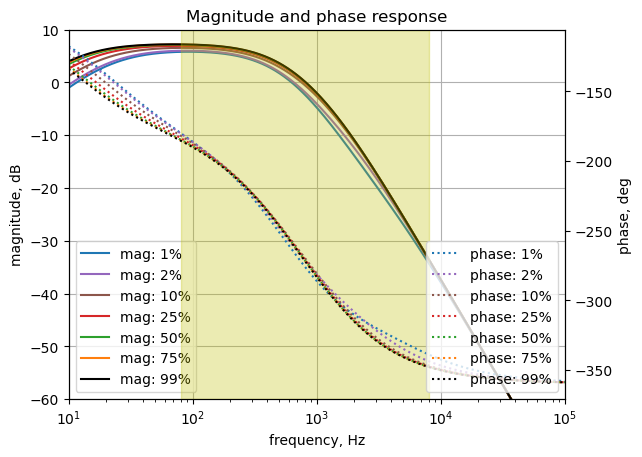

In [92]:
#| label: fig-clean-tone-path1-freq-plot
#| echo: true
#| fig-cap: Clean tone path 1 magnitude and phase response

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

for i in range(len(gain_setting)):
    element_values[Rp1a1] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b1] = gain_setting[i]*p1_value
    
    element_values[Rp1a2] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b2] = gain_setting[i]*p1_value
    
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v1]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
    sys = (a, b)

    #x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
    w, mag, phase = signal.bode(sys, w=x_axis) # returns: rad/s, mag in dB, phase in deg
    clean_path1_mag[i] = mag
    clean_path1_w[i] = w    

    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='mag: {:.0f}%'.format(gain_setting[i]*100))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='phase: {:.0f}%'.format(gain_setting[i]*100))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3) 

# set plot limits for display
plt.xlim((10,100e3))
ax1.set_ylim((-60,10))

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

The Klon Centuar clean path 1 has a low pass profile in the guitar audio band. The path is AC coupled so there is some roll off in gain below 80 Hz. The position of P1 does not affect the gain of this path to any significant amount. There is only about 1.5 dB difference in gain between P1 being fully CW to fully CCW. The filter characteristics of peak gain, -3dB attentuation frequency and attenuation roll off for P1 setting of 50% are measured from the frequency response data using the code below. 

In [93]:
i = 4 # index for 50%
print('gain setting: {:.0f}%'.format(gain_setting[i]*100))

max_gain = clean_path1_mag[i].max()
max_gain_arg = clean_path1_mag[i].argmax()
max_gain_freq = clean_path1_w[i][max_gain_arg]/(2*np.pi)
print('max gain: {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq))

gain_3dB_arg_offset = np.where(clean_path1_mag[i][max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = clean_path1_w[i][max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)
print('-3dB frequency: {:.1f} Hz'.format(freq_3dB))

print('clean path 1 attenuation: {:.1f} dB per decade'.format(clean_path1_mag[i][1500] - clean_path1_mag[i][-1]))

gain setting: 50%
max gain: 7.1 dB at 73.9 Hz
-3dB frequency: 451.7 Hz
clean path 1 attenuation: 39.9 dB per decade


The maximum gain of this path is 7.1 dB at 74 Hz with the gain control at 50%. As shown in the plot, the gain control does not effect the gain in this path too much. Withing the guitar audio band, this path has a low pass characteristic with a -3dB frequence of 452 Hz and a roll off of about 40 dB per decaded. As shown below there are two poles not canceled by zeros and this results in the 40 dB per decade roll off.

#### Numerical solution for P1 at 50%
The analysis can be run for any setting of P1, for illustration a setting of 50% is used to generate numerical values. 

In [94]:
p1_setting = 50/100 # P1 setting in %

element_values[Rp1a1] = p1_value - p1_setting*p1_value
element_values[Rp1b1] = p1_setting*p1_value

element_values[Rp1a2] = p1_value - p1_setting*p1_value
element_values[Rp1b2] = p1_setting*p1_value

NE = NE_sym.subs(element_values)

Display the equations with component values.

In [95]:
temp = ''
for i in range(shape(NE.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE.rhs[i]),latex(NE.lhs[i]))

Markdown(temp)

$0 = I_{V1} + 1.0 \cdot 10^{-7} s v_{1} - 1.0 \cdot 10^{-7} s v_{3}$<br>$0 = I_{O2a} + v_{12} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right) + v_{2} \cdot \left(8.2 \cdot 10^{-10} s + 2.55102040816327 \cdot 10^{-6}\right)$<br>$0 = - 1.0 \cdot 10^{-7} s v_{1} - 0.000666666666666667 v_{13} + v_{3} \cdot \left(1.68 \cdot 10^{-7} s + 0.000766666666666667\right) + v_{4} \left(- 6.8 \cdot 10^{-8} s - 0.0001\right)$<br>$0 = v_{3} \left(- 6.8 \cdot 10^{-8} s - 0.0001\right) + v_{4} \cdot \left(6.8 \cdot 10^{-8} s + 0.00012\right)$<br>$0 = 0.00052 v_{5} - 0.0005 v_{6}$<br>$0 = - 0.0005 v_{5} + v_{6} \cdot \left(8.2 \cdot 10^{-8} s + 0.000566666666666667\right) + v_{7} \left(- 8.2 \cdot 10^{-8} s - 6.66666666666667 \cdot 10^{-5}\right)$<br>$0 = v_{6} \left(- 8.2 \cdot 10^{-8} s - 6.66666666666667 \cdot 10^{-5}\right) + v_{7} \cdot \left(8.239 \cdot 10^{-8} s + 6.90363349131122 \cdot 10^{-5}\right) + v_{8} \left(- 3.9 \cdot 10^{-10} s - 2.3696682464455 \cdot 10^{-6}\right)$<br>$0 = I_{O1b} + v_{7} \left(- 3.9 \cdot 10^{-10} s - 2.3696682464455 \cdot 10^{-6}\right) + v_{8} \cdot \left(3.9 \cdot 10^{-10} s + 2.3696682464455 \cdot 10^{-6}\right)$<br>$0 = - 1.0 \cdot 10^{-6} s v_{20} - 0.001 v_{10} + v_{9} \cdot \left(1.0 \cdot 10^{-6} s + 0.001\right)$<br>$0 = - 1.0 \cdot 10^{-6} s v_{11} + v_{10} \cdot \left(1.0 \cdot 10^{-6} s + 0.001\right) - 0.001 v_{9}$<br>$0 = - 1.0 \cdot 10^{-6} s v_{10} - 2.2 \cdot 10^{-9} s v_{17} + v_{11} \cdot \left(1.0022 \cdot 10^{-6} s + 2.12765957446809 \cdot 10^{-5}\right) - 2.12765957446809 \cdot 10^{-5} v_{12}$<br>$0 = - 2.7 \cdot 10^{-8} s v_{18} - 2.12765957446809 \cdot 10^{-5} v_{11} + v_{12} \cdot \left(2.782 \cdot 10^{-8} s + 0.000127531319856548\right) - 6.66666666666667 \cdot 10^{-5} v_{13} - 3.7037037037037 \cdot 10^{-5} v_{16} + v_{2} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right)$<br>$0 = - 6.66666666666667 \cdot 10^{-5} v_{12} + v_{13} \cdot \left(1.0 \cdot 10^{-6} s + 0.000733333333333333\right) - 0.000666666666666667 v_{3}$<br>$0 = - 3.9 \cdot 10^{-7} s v_{15} + v_{14} \cdot \left(4.58 \cdot 10^{-7} s + 0.000882745098039216\right) - 2.0 \cdot 10^{-5} v_{16} + v_{19} \left(- 6.8 \cdot 10^{-8} s - 0.000196078431372549\right)$<br>$0 = - 3.9 \cdot 10^{-7} s v_{14} + v_{15} \cdot \left(3.9 \cdot 10^{-7} s + 0.001\right)$<br>$0 = - 3.7037037037037 \cdot 10^{-5} v_{12} - 2.0 \cdot 10^{-5} v_{14} + 0.000205824915824916 v_{16} - 4.54545454545455 \cdot 10^{-5} v_{17} - 8.33333333333333 \cdot 10^{-5} v_{18}$<br>$0 = - 2.2 \cdot 10^{-9} s v_{11} - 4.54545454545455 \cdot 10^{-5} v_{16} + v_{17} \cdot \left(2.2 \cdot 10^{-9} s + 4.54545454545455 \cdot 10^{-5}\right)$<br>$0 = - 2.7 \cdot 10^{-8} s v_{12} - 8.33333333333333 \cdot 10^{-5} v_{16} + v_{18} \cdot \left(2.7 \cdot 10^{-8} s + 8.33333333333333 \cdot 10^{-5}\right)$<br>$0 = I_{V2} + v_{14} \left(- 6.8 \cdot 10^{-8} s - 0.000196078431372549\right) + v_{19} \cdot \left(6.8 \cdot 10^{-8} s + 0.000196078431372549\right)$<br>$0 = I_{V3} + 1.0 \cdot 10^{-6} s v_{20} - 1.0 \cdot 10^{-6} s v_{9}$<br>$1 = v_{1}$<br>$0 = v_{19}$<br>$0 = v_{20}$<br>$0 = - v_{4} + v_{7}$<br>$0 = v_{12}$<br>

Solve for voltages and currents and display the results.

In [96]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{- 1.666 \cdot 10^{36} s^{2} - 2.94 \cdot 10^{39} s}{3.07377 \cdot 10^{28} s^{4} + 3.8347452 \cdot 10^{32} s^{3} + 1.324108096 \cdot 10^{36} s^{2} + 1.3641377 \cdot 10^{39} s + 9.5625 \cdot 10^{40}}$<br>$v_{3} = \frac{1.53 \cdot 10^{25} s^{3} + 3.822 \cdot 10^{28} s^{2} + 1.98 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{4} = \frac{1.53 \cdot 10^{25} s^{3} + 3.372 \cdot 10^{28} s^{2} + 1.65 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{5} = \frac{1.56825 \cdot 10^{37} s^{4} + 4.7313 \cdot 10^{40} s^{3} + 4.50125 \cdot 10^{43} s^{2} + 1.375 \cdot 10^{46} s}{1.63098 \cdot 10^{37} s^{4} + 1.6982148 \cdot 10^{41} s^{3} + 3.87420704000001 \cdot 10^{44} s^{2} + 2.54543933333334 \cdot 10^{47} s + 1.70850000000001 \cdot 10^{49}}$<br>$v_{6} = \frac{1.63098 \cdot 10^{37} s^{4} + 4.920552 \cdot 10^{40} s^{3} + 4.6813 \cdot 10^{43} s^{2} + 1.43 \cdot 10^{46} s}{1.63098 \cdot 10^{37} s^{4} + 1.6982148 \cdot 10^{41} s^{3} + 3.87420704000001 \cdot 10^{44} s^{2} + 2.54543933333334 \cdot 10^{47} s + 1.70850000000001 \cdot 10^{49}}$<br>$v_{7} = \frac{1.53 \cdot 10^{25} s^{3} + 3.372 \cdot 10^{28} s^{2} + 1.65 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{8} = \frac{1.2721644 \cdot 10^{46} s^{5} + 7.45961435931766 \cdot 10^{50} s^{4} + 2.18693901867302 \cdot 10^{54} s^{3} + 2.07668666587681 \cdot 10^{57} s^{2} + 6.37322274881527 \cdot 10^{59} s}{1.2721644 \cdot 10^{46} s^{5} + 2.09758384731754 \cdot 10^{50} s^{4} + 1.10702928656076 \cdot 10^{54} s^{3} + 2.03466134856873 \cdot 10^{57} s^{2} + 1.21969565229069 \cdot 10^{60} s + 8.09715639810431 \cdot 10^{61}}$<br>$v_{9} = 0.0$<br>$v_{10} = 0.0$<br>$v_{11} = 0.0$<br>$v_{12} = 0.0$<br>$v_{13} = \frac{1.02 \cdot 10^{28} s^{2} + 1.8 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{14} = 0.0$<br>$v_{15} = 0.0$<br>$v_{16} = 0.0$<br>$v_{17} = 0.0$<br>$v_{18} = 0.0$<br>$v_{19} = 0.0$<br>$v_{20} = 0.0$<br>$I_{V1} = \frac{- 1.0506 \cdot 10^{29} s^{3} - 1.93544 \cdot 10^{32} s^{2} - 1.53 \cdot 10^{34} s}{1.53 \cdot 10^{32} s^{3} + 1.4328 \cdot 10^{36} s^{2} + 2.13344 \cdot 10^{39} s + 1.53 \cdot 10^{41}}$<br>$I_{V2} = 0.0$<br>$I_{V3} = 0.0$<br>$I_{O1b} = \frac{- 3.13650000000006 \cdot 10^{40} s^{4} - 9.46260000000018 \cdot 10^{43} s^{3} - 9.00250000000017 \cdot 10^{46} s^{2} - 2.75000000000005 \cdot 10^{49} s}{1.63098 \cdot 10^{45} s^{4} + 1.6982148 \cdot 10^{49} s^{3} + 3.87420704000001 \cdot 10^{52} s^{2} + 2.54543933333334 \cdot 10^{55} s + 1.70850000000001 \cdot 10^{57}}$<br>$I_{O2a} = \frac{6.8 \cdot 10^{23} s^{2} + 1.2 \cdot 10^{27} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>

The transfer function is computed and displied below.

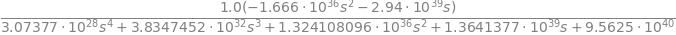

In [97]:
H = U[v2]/U[v1]
H

In [98]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

Poles and zeros of the transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [99]:
sys_tf = signal.TransferFunction(a,b)

sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

Pole zero plot
The poles and zeros of the preamp transfer function are plotted.

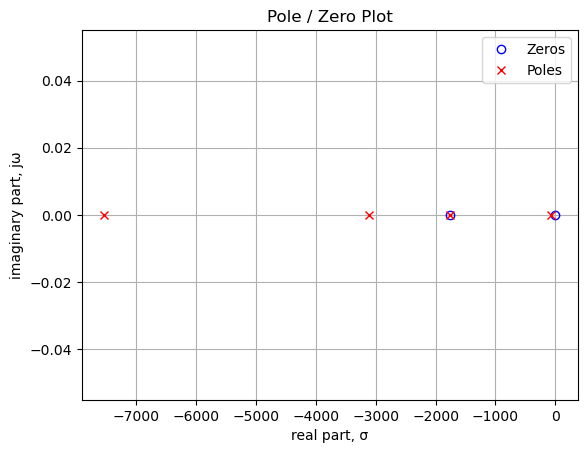

In [100]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03C3')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

$\large{\color {red} {\text{what is the pole/zero plot telling us? ... }}}$  
As shown above and printed below, there are two zeros and four poles in the transfer function. The zero at 0 Hz means that the direct current is blocked through this path, since the pole and zero near 0 Hz don't quite cancel. Since the number of poles is greater than the number of zero, the transfer function is a low pass function.  

Printing these values in Hz.

In [101]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in range(len(sys_zeros)):
    print('z{:d}: {:,.2f} Hz'.format(i,sys_zeros[i]/(2*np.pi)))

print('number of poles: {:d}'.format(len(sys_poles)))
for i in range(len(sys_poles)):
    print('p{:d}: {:,.2f} Hz'.format(i,sys_poles[i]/(2*np.pi)))

number of zeros: 2
z0: -280.86 Hz
z1: 0.00 Hz
number of poles: 4
p0: -1,198.55 Hz
p1: -495.13 Hz
p2: -279.87 Hz
p3: -12.02 Hz


#### Step response
The step response is displayed below.


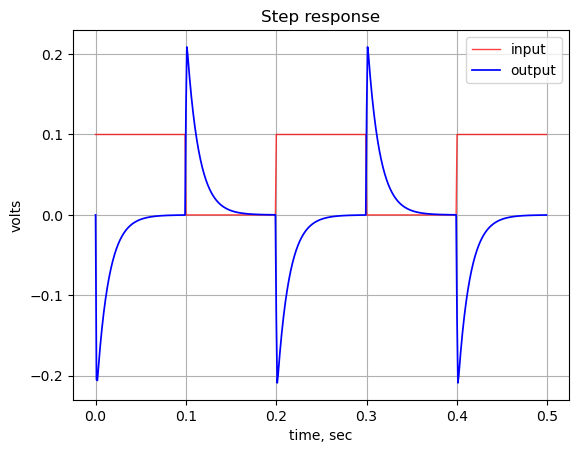

In [102]:
t = np.linspace(0, 0.5, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*5*t, duty=0.5)/20+1/20

t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha=0.75, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth=1.25, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

$\large{\color {red} {\text{what are these plots saying? ... }}}$  

The impulse and step response show that the network does not have a DC path. 

short impulse response says the circuit path is not ... kind of just no effect below XX Hz

according colvolution 

why negative values?


#### Group delay
The group delay is displayed below.

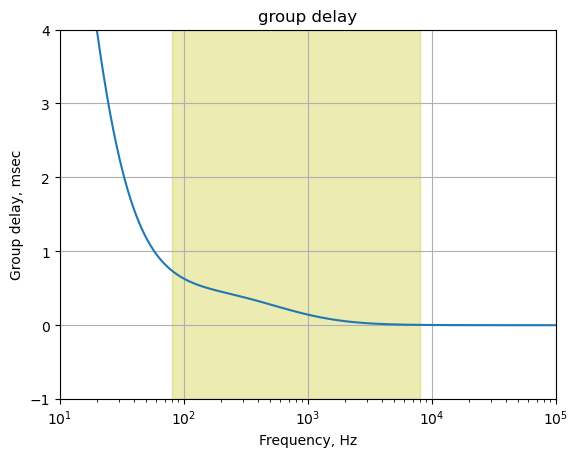

In [103]:
#x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 2000, endpoint=True)
x = np.logspace(0, 5, 2000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w)*1000,'-',label='group delay')

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.xlim((10,100e3))
plt.ylim((-1,4))

plt.ylabel('Group delay, msec')
plt.xlabel('Frequency, Hz')
#plt.legend()
plt.grid()
plt.show()

$\large{\color {red} {\text{comments about group delay ... }}}$  

The plot above shows that for frequencies in the guitar audio band, the group delay variation is less than 2 ms and therefore below the threshold of audibility as described in @sec-Group_delay.

### Clean tone path 2 {#sec-clean_tone_path2}

![Schematic of klon-centaur-schematic-high-res_w_clean_path2_highlight](klon-centaur-schematic-high-res_w_clean_path2_highlight.png){#fig-klon-centaur-schematic-high-res_w_clean_path2_highlight_sch}

The second clean tone path is highlighted in @fig-klon-centaur-schematic-high-res_w_clean_path2_highlight_sch. This circuit path, which runs from the output of the buffer amp to the out put of the summing amp, U2A, is the least intuitive path in the pedal. The operation and interaction of the reactive branches with C4, C6, C11 and C12 is not very obvious. One thing to notice that there is a DC path from the output of U1A to the inverting terminal of U2A. This will bias U2A to the DC level of the virtual ground. The DC path continues to the treble tone control circuit. V1 and V3 are set to zero and the transfer function from node 19 to node 2 is calculated. 

The operation and purpose of this path has been discussed in online in forums and web pages, see @sec-web_circuit_analysis. None of these presented a detailed analysis to the level provided below. In this section, the  path is analyzed while the input to the other paths are zero, so we can get the contribution of this path. However, the transfer function of Clean tone path 2 doesn't provide much insight into what's actually happening in this path. Parts of Clean tone path 2 are further examined in @sec-Analysis_of_reactive_branches. See sections @sec-sum_path3, @sec-sum_path2b and @sec-sum_path2a.

$\large{\color {red} {\text{expand narrative ... }}}$  

C3 path

C2 path

C10 path


C13||R20 & U2A

describe the reactive branches of Clean tone path 2

See @fig-Klon-Centaur_sum_path_v1_sch

<!--

See sections:

@sec-sum_path3

@sec-sum_path2b

@sec-sum_path2a

- path V2 to v2
 
use same net list from above, then edit element_values

None of the explanations describe operation of clean path 2.

@sec-web_circuit_analysis

Also see Analysis of reactive branches, @sec-Analysis_of_reactive_branches

- From Electrosmash

Network 2: This one is more complex, it includes the secondary gang of the Gain potentiometer. This gang works against the primary gang in the Op-Amp Gain Stage, that is to say, that as the op-amp output signal goes louder, this 2nd feedforward network signal goes quieter (and vice-versa) giving balance to the mix. According to Finnegan, this network “optimizes the circuit’s overall tonal response for whatever the main gain stage is generating in the way of level and distortion.”

- from Coda effects

At the input of the splitter, there is the beginning of the buffer circuit. Instead of going to the top partof the circuit, the signal can now take several pathes: down through the 5.1k resistor and the C4 capacitor, go through the second OP amp, or can go through the R17 resistor... What is this mess?

These different splitters selects some specifics frequencies. Unfortunately, I am not good enough with theory to tell you which ones... It involves rather complicated calculations with Fourier transforms and all... If any talented personn could help me with that, it would be awesome!

Lets focus on the bottom part. The signal goes through different components (R5, C4, R6, C6 and R9), then goes through the GAIN2 potentiometer, that set the maximum . You can see that the signal does not goes through any diode clipping system, so this part of the signal stays clean. In the end of the loop, it is mixed with the saturated signal.

The clean signal can also go through the top part of circuit, with the 1,5 and 15k resistor. It adds a bit of clean signal in the end that is mixed with the GAIN2 clean signal and the saturated signal, in order to always have a bit of clean mixed with the saturated signal, even when GAIN2 is maxed.

Finally, the remaining signal goes to the input of the second OP amp. A GAIN1 potentiometer set the amount of signal going into the amplification loop of the OP amp. GAIN1 and GAIN2 are in fact one double potentiometer: when the value of one increase, the other one increase! Thus, it doses the amount of clean and saturated signal to mix together: the more saturated signal, the less clean signal! It is an unique feature that is not present in any other pedal, and this is one of the novelty brung by the Klon Centaur: a part of the signal is kept as is, and the other part is saturated. Thus, the overdrive is really good for low drive.

The saturation comes mainly from the OP amp saturation. Another thing that is not usual with classic overdrives circuits! It has quit a high gain. We can calculate it. It is wired in non-inverter, so the gain will be 1 + loop resistor / resistor to ground = 1 + 422 / (15 + 2  + value of the 100k potentiometer  = 1 + 422 / (117) = 4,6 with the lowest gain, and 1 + 422 /  (17) = 25,8 when gain is maxed.

- from freestompboxes.org

-The three branches. This is the tricky part. As some might know, the effected signal is a mix of three by the U2A summing amplifier, with a dual gang pot controlling gain of two of them. Well, that's only part of the story, as I found that R3 and C4 (in my schem) also form and high pass filter with C2 for the clipping path! Of course there's also clean attenuated signal tapped off there by R5, and this part is mostly unchanged, except for R3 being a standard value. 

-The bottom branch. This one carries clean signal of which the volume is adjusted by half of the gain pot. In the original, the signal to the gain pot comes from a fixed attenuator formed by a 5.1K and a 1.5K resistor, to which are added a 68n shelving highpass (bright cap) and a shelving lowpass cap. After the volume, the signal goes again through a shelving lowpass formed by the 27K in parallel with the 12K and 27n into the summing amp. In parallel to this there's a 22K and a 2.2n. Unlike the other one, this network is not at virtual ground and its output isn't summed directly. Here's an assumption, and it is that this network isn't relevant. In the simulation of the original it's been included and it doesn't contribute significantly to the signal coming from this branch. Another possibility is that the diodes conducting will pull this side to ground, but even with it grounded there's no difference. Maybe it's the other way around and it affects the signal coming from the clipping stage? I don't think so, as the source impedance there is much lower, so I think it's a safe assumption.

I find this branch quite messy, with shelving filters which partially cancel each other, and indeed as you can see in the album, the frequency response of this branch is less interesting that it would seem. I decided to rework it into a simple volume control, which is tapered so that the volume closely follows that of the original (important for balancing with the distorted signal), followed by a low pass filter. The frequency response is close enough, at least for me. 

-->

#### Frequency response vs P1

#### Clean tone path 2 frequency response
The frequency responce for the clean tone path 2 for various setting of P1 is calculated and displayed below. The source $V_2$ is set to one and the other sources are set to zero.

In [104]:
element_values[V1] = 0
element_values[V2] = 1
element_values[V3] = 0

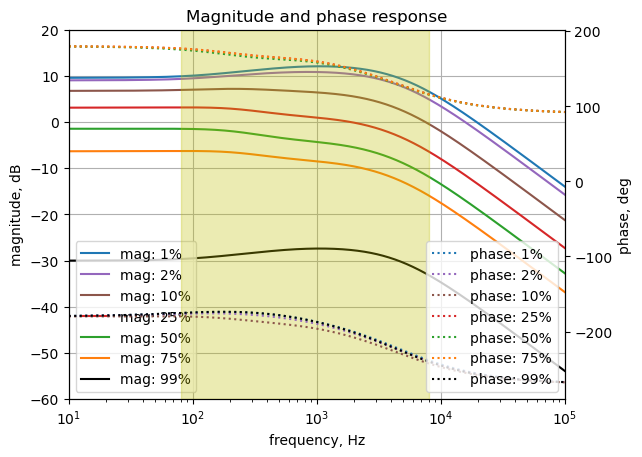

In [105]:
#| label: fig-clean-tone-path2-freq-plot
#| echo: true
#| fig-cap: Clean tone path 2 magnitude and phase response

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

for i in range(len(gain_setting)):
    element_values[Rp1a1] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b1] = gain_setting[i]*p1_value
    
    element_values[Rp1a2] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b2] = gain_setting[i]*p1_value
    
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v19]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
    sys = (a, b)

    #x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
    w, mag, phase = signal.bode(sys, w=x_axis) # returns: rad/s, mag in dB, phase in deg
    clean_path2_mag[i] = mag
    clean_path2_w[i] = w

    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='mag: {:.0f}%'.format(gain_setting[i]*100))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='phase: {:.0f}%'.format(gain_setting[i]*100))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3) 

# set plot limits for display
plt.xlim((10,100e3))
ax1.set_ylim((-60,20))

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

From the curves above, the clean path 2 has a low pass response with a cut off frequency about 2kHz and the gain varies from 10 dB to -30 dB controlled by the position of P1.  

describe filter characteristics, 3dB point, roll off, gain at 1kHz

In [106]:
i = 4 # index for 50%
print('gain setting: {:.0f}%'.format(gain_setting[i]*100))

max_gain = clean_path2_mag[i].max()
max_gain_arg = clean_path2_mag[i].argmax()
max_gain_freq = clean_path2_w[i][max_gain_arg]/(2*np.pi)
print('max gain: {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq))

gain_3dB_arg_offset = np.where(clean_path2_mag[i][max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = clean_path2_w[i][max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)
print('-3dB frequency: {:.1f} Hz'.format(freq_3dB))

print('clean path 2 attenuation: {:.1f} dB per decade'.format(clean_path2_mag[i][1500] - clean_path2_mag[i][-1]))

gain setting: 50%
max gain: -1.5 dB at 39.3 Hz
-3dB frequency: 1109.2 Hz
clean path 2 attenuation: 19.3 dB per decade


#### Numerical solution for P1 at 50%
The transfer function for this path is solved for the case where P1 set at a 50% rotational position.

In [107]:
p1_setting = 50/100 # setting the gain pot all the way CCW

element_values[Rp1a1] = p1_value - p1_setting*p1_value
element_values[Rp1b1] = p1_setting*p1_value

element_values[Rp1a2] = p1_value - p1_setting*p1_value
element_values[Rp1b2] = p1_setting*p1_value

NE = NE_sym.subs(element_values)

Display the equations with numerical values.

In [108]:
temp = ''
for i in range(shape(NE.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE.rhs[i]),latex(NE.lhs[i]))

Markdown(temp)

$0 = I_{V1} + 1.0 \cdot 10^{-7} s v_{1} - 1.0 \cdot 10^{-7} s v_{3}$<br>$0 = I_{O2a} + v_{12} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right) + v_{2} \cdot \left(8.2 \cdot 10^{-10} s + 2.55102040816327 \cdot 10^{-6}\right)$<br>$0 = - 1.0 \cdot 10^{-7} s v_{1} - 0.000666666666666667 v_{13} + v_{3} \cdot \left(1.68 \cdot 10^{-7} s + 0.000766666666666667\right) + v_{4} \left(- 6.8 \cdot 10^{-8} s - 0.0001\right)$<br>$0 = v_{3} \left(- 6.8 \cdot 10^{-8} s - 0.0001\right) + v_{4} \cdot \left(6.8 \cdot 10^{-8} s + 0.00012\right)$<br>$0 = 0.00052 v_{5} - 0.0005 v_{6}$<br>$0 = - 0.0005 v_{5} + v_{6} \cdot \left(8.2 \cdot 10^{-8} s + 0.000566666666666667\right) + v_{7} \left(- 8.2 \cdot 10^{-8} s - 6.66666666666667 \cdot 10^{-5}\right)$<br>$0 = v_{6} \left(- 8.2 \cdot 10^{-8} s - 6.66666666666667 \cdot 10^{-5}\right) + v_{7} \cdot \left(8.239 \cdot 10^{-8} s + 6.90363349131122 \cdot 10^{-5}\right) + v_{8} \left(- 3.9 \cdot 10^{-10} s - 2.3696682464455 \cdot 10^{-6}\right)$<br>$0 = I_{O1b} + v_{7} \left(- 3.9 \cdot 10^{-10} s - 2.3696682464455 \cdot 10^{-6}\right) + v_{8} \cdot \left(3.9 \cdot 10^{-10} s + 2.3696682464455 \cdot 10^{-6}\right)$<br>$0 = - 1.0 \cdot 10^{-6} s v_{20} - 0.001 v_{10} + v_{9} \cdot \left(1.0 \cdot 10^{-6} s + 0.001\right)$<br>$0 = - 1.0 \cdot 10^{-6} s v_{11} + v_{10} \cdot \left(1.0 \cdot 10^{-6} s + 0.001\right) - 0.001 v_{9}$<br>$0 = - 1.0 \cdot 10^{-6} s v_{10} - 2.2 \cdot 10^{-9} s v_{17} + v_{11} \cdot \left(1.0022 \cdot 10^{-6} s + 2.12765957446809 \cdot 10^{-5}\right) - 2.12765957446809 \cdot 10^{-5} v_{12}$<br>$0 = - 2.7 \cdot 10^{-8} s v_{18} - 2.12765957446809 \cdot 10^{-5} v_{11} + v_{12} \cdot \left(2.782 \cdot 10^{-8} s + 0.000127531319856548\right) - 6.66666666666667 \cdot 10^{-5} v_{13} - 3.7037037037037 \cdot 10^{-5} v_{16} + v_{2} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right)$<br>$0 = - 6.66666666666667 \cdot 10^{-5} v_{12} + v_{13} \cdot \left(1.0 \cdot 10^{-6} s + 0.000733333333333333\right) - 0.000666666666666667 v_{3}$<br>$0 = - 3.9 \cdot 10^{-7} s v_{15} + v_{14} \cdot \left(4.58 \cdot 10^{-7} s + 0.000882745098039216\right) - 2.0 \cdot 10^{-5} v_{16} + v_{19} \left(- 6.8 \cdot 10^{-8} s - 0.000196078431372549\right)$<br>$0 = - 3.9 \cdot 10^{-7} s v_{14} + v_{15} \cdot \left(3.9 \cdot 10^{-7} s + 0.001\right)$<br>$0 = - 3.7037037037037 \cdot 10^{-5} v_{12} - 2.0 \cdot 10^{-5} v_{14} + 0.000205824915824916 v_{16} - 4.54545454545455 \cdot 10^{-5} v_{17} - 8.33333333333333 \cdot 10^{-5} v_{18}$<br>$0 = - 2.2 \cdot 10^{-9} s v_{11} - 4.54545454545455 \cdot 10^{-5} v_{16} + v_{17} \cdot \left(2.2 \cdot 10^{-9} s + 4.54545454545455 \cdot 10^{-5}\right)$<br>$0 = - 2.7 \cdot 10^{-8} s v_{12} - 8.33333333333333 \cdot 10^{-5} v_{16} + v_{18} \cdot \left(2.7 \cdot 10^{-8} s + 8.33333333333333 \cdot 10^{-5}\right)$<br>$0 = I_{V2} + v_{14} \left(- 6.8 \cdot 10^{-8} s - 0.000196078431372549\right) + v_{19} \cdot \left(6.8 \cdot 10^{-8} s + 0.000196078431372549\right)$<br>$0 = I_{V3} + 1.0 \cdot 10^{-6} s v_{20} - 1.0 \cdot 10^{-6} s v_{9}$<br>$0 = v_{1}$<br>$1 = v_{19}$<br>$0 = v_{20}$<br>$0 = - v_{4} + v_{7}$<br>$0 = v_{12}$<br>

Solve for voltages and currents and display the results.

In [109]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 0.0$<br>$v_{2} = \frac{- 1.26384690189495 \cdot 10^{63} s^{5} - 3.30941715880806 \cdot 10^{67} s^{4} - 1.76927318717644 \cdot 10^{71} s^{3} - 3.29892164039092 \cdot 10^{74} s^{2} - 1.88749342217544 \cdot 10^{77} s - 7.25931088102553 \cdot 10^{78}}{8.7114749288661 \cdot 10^{58} s^{6} + 4.42758037940265 \cdot 10^{63} s^{5} + 6.39426906142035 \cdot 10^{67} s^{4} + 2.72152037399421 \cdot 10^{71} s^{3} + 4.243557822183 \cdot 10^{74} s^{2} + 2.24888518595392 \cdot 10^{77} s + 8.61957981330834 \cdot 10^{78}}$<br>$v_{3} = 0.0$<br>$v_{4} = 0.0$<br>$v_{5} = 0.0$<br>$v_{6} = 0.0$<br>$v_{7} = 0.0$<br>$v_{8} = 0.0$<br>$v_{9} = \frac{2.0138625 \cdot 10^{55} s^{4} + 1.71863602941176 \cdot 10^{59} s^{3} + 4.87499999999999 \cdot 10^{62} s^{2} + 4.59558823529411 \cdot 10^{65} s}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{10} = \frac{2.0138625 \cdot 10^{52} s^{5} + 1.92002227941176 \cdot 10^{56} s^{4} + 6.59363602941176 \cdot 10^{59} s^{3} + 9.47058823529411 \cdot 10^{62} s^{2} + 4.59558823529411 \cdot 10^{65} s}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{11} = \frac{2.0138625 \cdot 10^{52} s^{5} + 2.12140852941176 \cdot 10^{56} s^{4} + 8.31227205882352 \cdot 10^{59} s^{3} + 1.43455882352941 \cdot 10^{63} s^{2} + 9.19117647058822 \cdot 10^{65} s}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{12} = 0.0$<br>$v_{13} = 0.0$<br>$v_{14} = \frac{7.70884347446809 \cdot 10^{55} s^{5} + 1.76830244412326 \cdot 10^{60} s^{4} + 9.75686883763291 \cdot 10^{63} s^{3} + 2.00756023341467 \cdot 10^{67} s^{2} + 1.40196836955285 \cdot 10^{70} s + 5.47822825670137 \cdot 10^{71}}{7.70884347446809 \cdot 10^{55} s^{5} + 3.67817386295305 \cdot 10^{60} s^{4} + 4.51405215439493 \cdot 10^{64} s^{3} + 1.00397005781958 \cdot 10^{68} s^{2} + 6.31801858446797 \cdot 10^{70} s + 2.45179159134104 \cdot 10^{72}}$<br>$v_{15} = \frac{7.70884347446809 \cdot 10^{55} s^{5} + 1.57063979093177 \cdot 10^{60} s^{4} + 5.72958732242324 \cdot 10^{63} s^{3} + 5.3843527894717 \cdot 10^{66} s^{2} + 2.13650902011353 \cdot 10^{68} s}{7.70884347446809 \cdot 10^{55} s^{5} + 3.67817386295305 \cdot 10^{60} s^{4} + 4.51405215439493 \cdot 10^{64} s^{3} + 1.00397005781958 \cdot 10^{68} s^{2} + 6.31801858446797 \cdot 10^{70} s + 2.45179159134104 \cdot 10^{72}}$<br>$v_{16} = \frac{4.72614965425532 \cdot 10^{53} s^{5} + 1.34411248109 \cdot 10^{58} s^{4} + 9.21167841492205 \cdot 10^{61} s^{3} + 2.41846205484128 \cdot 10^{65} s^{2} + 2.24113593696666 \cdot 10^{68} s + 8.88895209921494 \cdot 10^{69}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{17} = \frac{2.0138625 \cdot 10^{52} s^{5} + 9.56082557247695 \cdot 10^{57} s^{4} + 8.10026990741267 \cdot 10^{61} s^{3} + 2.31064415746956 \cdot 10^{65} s^{2} + 2.23683368415064 \cdot 10^{68} s + 8.88895209921494 \cdot 10^{69}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{18} = \frac{1.45868816489362 \cdot 10^{57} s^{4} + 3.69828291543406 \cdot 10^{61} s^{3} + 1.70166527761975 \cdot 10^{65} s^{2} + 2.2123357321652 \cdot 10^{68} s + 8.88895209921494 \cdot 10^{69}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{19} = 1.0$<br>$v_{20} = 0.0$<br>$I_{V1} = 0.0$<br>$I_{V2} = \frac{- 1.29871256480426 \cdot 10^{71} s^{5} - 2.78057297595692 \cdot 10^{75} s^{4} - 1.23998265533368 \cdot 10^{79} s^{3} - 1.90922089398308 \cdot 10^{82} s^{2} - 9.76878402295801 \cdot 10^{84} s - 3.73327208955079 \cdot 10^{86}}{7.70884347446809 \cdot 10^{73} s^{5} + 3.67817386295305 \cdot 10^{78} s^{4} + 4.51405215439493 \cdot 10^{82} s^{3} + 1.00397005781958 \cdot 10^{86} s^{2} + 6.31801858446797 \cdot 10^{88} s + 2.45179159134104 \cdot 10^{90}}$<br>$I_{V3} = \frac{2.0138625 \cdot 10^{49} s^{5} + 1.71863602941176 \cdot 10^{53} s^{4} + 4.87499999999999 \cdot 10^{56} s^{3} + 4.59558823529411 \cdot 10^{59} s^{2}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$I_{O1b} = 0.0$<br>$I_{O2a} = \frac{5.15855878324468 \cdot 10^{50} s^{5} + 1.35078251379921 \cdot 10^{55} s^{4} + 7.22152321296506 \cdot 10^{58} s^{3} + 1.34649862873099 \cdot 10^{62} s^{2} + 7.70405478438957 \cdot 10^{64} s + 2.96298403307165 \cdot 10^{66}}{4.3362244543883 \cdot 10^{55} s^{5} + 2.06897279791109 \cdot 10^{60} s^{4} + 2.53915433684715 \cdot 10^{64} s^{3} + 5.64733157523515 \cdot 10^{67} s^{2} + 3.55388545376323 \cdot 10^{70} s + 1.37913277012933 \cdot 10^{72}}$<br>

The transfer function for $H(s)=\frac {v_2} {v_{19}}$ is shown below. There are six calacitors in the network that comprises this path, so the order of the demoninator polynominal is six.

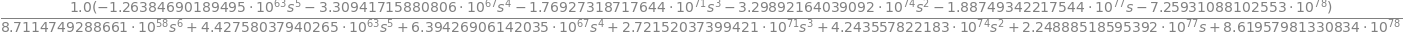

In [110]:
H = U[v2]/U[v19]
H

In [111]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

#### Poles and zeros
The poles and zeros of the transfer function can easly be obtained with the following code:

In [112]:
sys_tf = signal.TransferFunction(a,b)

sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

The poles and zeros of the clean path 2 transfer function are plotted.

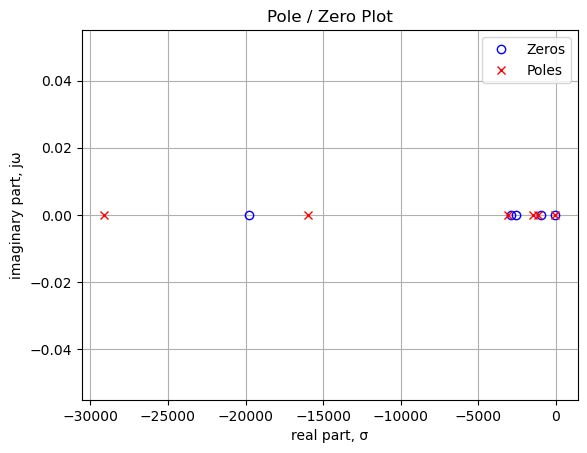

In [113]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03C3')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

$\large{\color {red} {\text{what is the pole/zero plot telling us? ... }}}$  

The plot above shows the poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency. There are five seros and six poles. There is no zero at 0 Hz. Since there are more poles than zeros, and the value of the last pole is greater than the value of the last zero, the transfer function is a low pass filter. 

Printing these values in Hz.

In [114]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in range(len(sys_zeros)):
    print('z{:d}: {:,.2f} Hz'.format(i,sys_zeros[i]/(2*np.pi)))

print('number of poles: {:d}'.format(len(sys_poles)))
for i in range(len(sys_poles)):
    print('p{:d}: {:,.2f} Hz'.format(i,sys_poles[i]/(2*np.pi)))

number of zeros: 5
z0: -3,142.62 Hz
z1: -458.92 Hz
z2: -408.09 Hz
z3: -151.29 Hz
z4: -6.59 Hz
number of poles: 6
p0: -4,629.79 Hz
p1: -2,545.69 Hz
p2: -495.13 Hz
p3: -231.62 Hz
p4: -180.17 Hz
p5: -6.60 Hz


#### Step response


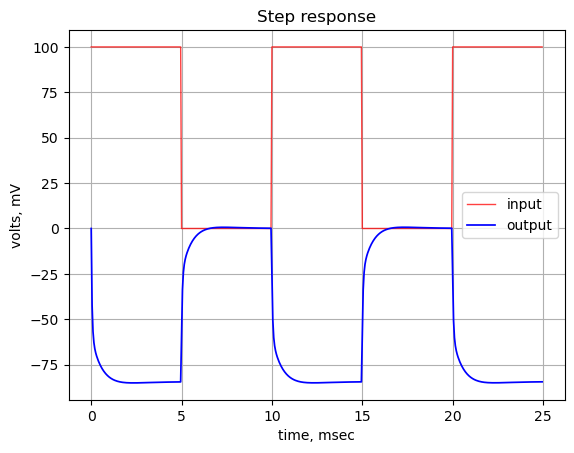

In [115]:
t = np.linspace(0, 0.025, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*100*t, duty=0.5)/20+1/20

t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal*1e3, 'r', alpha=0.75, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step*1e3,'b', linewidth=1.25, label='output')
plt.title('Step response')
plt.ylabel('volts, mV')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

$\large{\color {red} {\text{what are these plots saying? ... }}}$  

small amount of overshoot.

#### Group delay

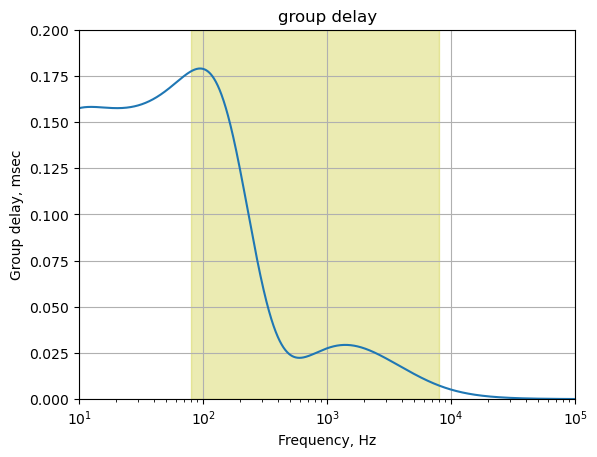

In [116]:
#x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 2000, endpoint=True)
x = np.logspace(0, 5, 2000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w)*1000,'-',label='group delay')

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.xlim((10,100e3))
plt.ylim((0,0.2))

plt.ylabel('Group delay, msec')
plt.xlabel('Frequency, Hz')
#plt.legend()
plt.grid()
plt.show()

$\large{\color {red} {\text{comments about group delay ... }}}$  

The plot above shows that for frequencies in the guitar audio band, the group delay variation is less than 2 ms and therefore below the threshold of audibility as described in @sec-Group_delay.

### Distortion path part A {#sec-Distortion_path_part_A}

![Schematic of klon-centaur-schematic-high-res_w_diode_path1_highlight](klon-centaur-schematic-high-res_w_diode_path1_highlight.png){#fig-klon-centaur-schematic-high-res_w_diode_path1_highlight_sch}

Distortion path part A is high lighted in @fig-klon-centaur-schematic-high-res_w_diode_path1_highlight_sch. There are four capacitors in this path which determine the frequency response. The signal level is also determined by the potentiometer P1B. The voltage transfer function from node 1 to node 8 is calculated below. The frequency response at node 8 shows some emphasis at 1 kHz as a function of the gain setting as seen in @fig-diode-path1-freq-plot. The signal at the output of U1B, node 8, is what get clipped by the diodes. The guitar signal, already rich in harmonics, is heavily modified harmonically and amplitude limited by the diodes. In the net list the signal path at node 8 to C9 is removed and V3 is used to drive the rest of the path, because the MNA code is not modeling the diodes. So we can only look at the circuit up to that point.   


R5||C4 path

R7 & C16 path

P1B CCW - why high pass reponse?

P1B CW


DC gain

High freq gain

C3, R6||C5, P1B

R10, R11||C7, R12||C8, P1B

R19 connected to a vertual ground

See @fig-Klon-Centaur_sum_path_v1_sch


#### Frequency response vs P1

#### Distortion path part A frequency response
Gain setting is a percent of full scale

In [117]:
element_values[V1] = 1
element_values[V2] = 0
element_values[V3] = 0

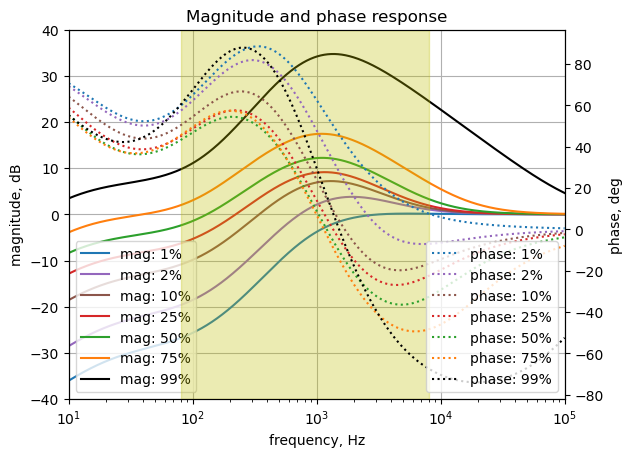

In [118]:
#| label: fig-diode-path1-freq-plot
#| echo: true
#| fig-cap: Diode path 1 magnitude and phase response

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

for i in range(len(gain_setting)):
    element_values[Rp1a1] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b1] = gain_setting[i]*p1_value
    
    element_values[Rp1a2] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b2] = gain_setting[i]*p1_value
    
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v8]/U[v1]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
    sys = (a, b)

    w, mag, phase = signal.bode(sys, w=x_axis) # returns: rad/s, mag in dB, phase in deg
    diode_pathA_mag[i] = mag
    diode_pathA_w[i] = w

    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='mag: {:.0f}%'.format(gain_setting[i]*100))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='phase: {:.0f}%'.format(gain_setting[i]*100))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3) 

# set plot limits for display
plt.xlim((10,100e3))
ax1.set_ylim((-40,40))

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

The Klon Centuar distortion path A has a band pass charasteric centered at 1kHz. The gain of this path at 1 kHz ranges from about -3 dB to 35 dB depending on the position of P1. Distortion path A shapes the tonal charactics of the signal prior to the clipping diodes. 

describe filter characteristics, 3dB point, roll off, gain at 1kHz

The bandwidth of a band pass filter is the frequency range that is allowed to pass through with minimal attenuation. The frequency at which the power level of the signal decreases by 3 dB from its maximum value is called the 3 dB bandwidth. A 3 dB decrease in power means the signal power becomes half of its maximum value.

[Band-pass filter](https://en.wikipedia.org/wiki/Band-pass_filter)

Bandwidth measured at half-power points (gain −3 dB, √2/2, or about 0.707 relative to peak) on a diagram showing magnitude transfer function versus frequency for a band-pass filter.

The bandwidth of the filter is simply the difference between the upper and lower cutoff frequencies. The shape factor is the ratio of bandwidths measured using two different attenuation values to determine the cutoff frequency, e.g., a shape factor of 2:1 at 30/3 dB means the bandwidth measured between frequencies at 30 dB attenuation is twice that measured between frequencies at 3 dB attenuation. 

Q factorA band-pass filter can be characterized by its Q factor. The Q-factor is the reciprocal of the fractional bandwidth. A high-Q filter will have a narrow passband and a low-Q filter will have a wide passband. These are respectively referred to as narrow-band and wide-band filters. 

[Q factor](https://en.wikipedia.org/wiki/Q_factor)

In physics and engineering, the quality factor or Q factor is a dimensionless parameter that describes how underdamped an oscillator or resonator is. It is defined as the ratio of the initial energy stored in the resonator to the energy lost in one radian of the cycle of oscillation.[1] Q factor is alternatively defined as the ratio of a resonator's centre frequency to its bandwidth when subject to an oscillating driving force. These two definitions give numerically similar, but not identical, results.[2] Higher Q indicates a lower rate of energy loss and the oscillations die out more slowly. A pendulum suspended from a high-quality bearing, oscillating in air, has a high Q, while a pendulum immersed in oil has a low one. Resonators with high quality factors have low damping, so that they ring or vibrate longer.



In [119]:
i = 4 # index for 50%
print('gain setting: {:.0f}%'.format(gain_setting[i]*100))

max_gain = diode_pathA_mag[i].max()
max_gain_arg = diode_pathA_mag[i].argmax()
max_gain_freq = diode_pathA_w[i][max_gain_arg]/(2*np.pi)
print('max gain: {:.1f} dB at {:,.0f} Hz'.format(max_gain, max_gain_freq))

upper_3dB_arg_offset = np.where(diode_pathA_mag[i][max_gain_arg:] < max_gain - 3)[0][0]
upper_3dB_freq = diode_pathA_w[i][max_gain_arg+upper_3dB_arg_offset]/(2*np.pi)
print('upper -3dB frequency: {:,.0f} Hz'.format(upper_3dB_freq))

lower_3dB_arg = np.where(diode_pathA_mag[i][:max_gain_arg] < max_gain - 3)[0][-1]
lower_3dB_freq = diode_pathA_w[i][lower_3dB_arg]/(2*np.pi)
print('lower -3dB frequency: {:,.0f} Hz'.format(lower_3dB_freq))

diode_pathA_bw = upper_3dB_freq - lower_3dB_freq
print('bandwidth: {:,.0f} Hz'.format(diode_pathA_bw))

diode_pathA_q = max_gain_freq/diode_pathA_bw
print('Q factor: {:.1f}'.format(diode_pathA_q))

gain setting: 50%
max gain: 12.2 dB at 1,109 Hz
upper -3dB frequency: 2,788 Hz
lower -3dB frequency: 464 Hz
bandwidth: 2,323 Hz
Q factor: 0.5


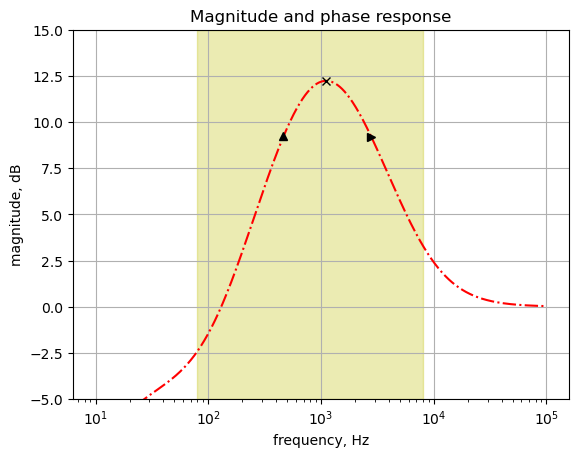

In [120]:
#| echo: false
#| output: false

# the Quarto directives above suppress rendering of code and output, this cell is for debug only and not part of the book

plt.ylabel('magnitude, dB')
plt.xlabel('frequency, Hz')

plt.semilogx(diode_pathA_w[i]/(2*np.pi), diode_pathA_mag[i],'-.r',label='Distortion path A, P1 @ {:.0f}%'.format(gain_setting[i]*100))

plt.semilogx(max_gain_freq, max_gain,'xk')
plt.semilogx(lower_3dB_freq, diode_pathA_mag[i][lower_3dB_arg],'^k')
plt.semilogx(upper_3dB_freq, diode_pathA_mag[i][max_gain_arg+upper_3dB_arg_offset],'>k')

plt.tick_params(axis='y')
#plt.xlim((10,100e3))
plt.ylim((-5,15))
plt.grid()

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

#plt.legend(bbox_to_anchor=(1,1))
plt.title('Magnitude and phase response')
plt.show()

#### Numerical solution for P1 at 50%

In [121]:
element_values = SymMNA.get_part_values(network_df)

p1_setting = 50/100 # setting the gain pot all the way CCW

element_values[Rp1a1] = p1_value - p1_setting*p1_value
element_values[Rp1b1] = p1_setting*p1_value

element_values[Rp1a2] = p1_value - p1_setting*p1_value
element_values[Rp1b2] = p1_setting*p1_value

NE = NE_sym.subs(element_values)

Display the equations with numerical component values.

In [122]:
temp = ''
for i in range(shape(NE.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE.rhs[i]),latex(NE.lhs[i]))

Markdown(temp)

$0 = I_{V1} + 1.0 \cdot 10^{-7} s v_{1} - 1.0 \cdot 10^{-7} s v_{3}$<br>$0 = I_{O2a} + v_{12} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right) + v_{2} \cdot \left(8.2 \cdot 10^{-10} s + 2.55102040816327 \cdot 10^{-6}\right)$<br>$0 = - 1.0 \cdot 10^{-7} s v_{1} - 0.000666666666666667 v_{13} + v_{3} \cdot \left(1.68 \cdot 10^{-7} s + 0.000766666666666667\right) + v_{4} \left(- 6.8 \cdot 10^{-8} s - 0.0001\right)$<br>$0 = v_{3} \left(- 6.8 \cdot 10^{-8} s - 0.0001\right) + v_{4} \cdot \left(6.8 \cdot 10^{-8} s + 0.00012\right)$<br>$0 = 0.00052 v_{5} - 0.0005 v_{6}$<br>$0 = - 0.0005 v_{5} + v_{6} \cdot \left(8.2 \cdot 10^{-8} s + 0.000566666666666667\right) + v_{7} \left(- 8.2 \cdot 10^{-8} s - 6.66666666666667 \cdot 10^{-5}\right)$<br>$0 = v_{6} \left(- 8.2 \cdot 10^{-8} s - 6.66666666666667 \cdot 10^{-5}\right) + v_{7} \cdot \left(8.239 \cdot 10^{-8} s + 6.90363349131122 \cdot 10^{-5}\right) + v_{8} \left(- 3.9 \cdot 10^{-10} s - 2.3696682464455 \cdot 10^{-6}\right)$<br>$0 = I_{O1b} + v_{7} \left(- 3.9 \cdot 10^{-10} s - 2.3696682464455 \cdot 10^{-6}\right) + v_{8} \cdot \left(3.9 \cdot 10^{-10} s + 2.3696682464455 \cdot 10^{-6}\right)$<br>$0 = - 1.0 \cdot 10^{-6} s v_{20} - 0.001 v_{10} + v_{9} \cdot \left(1.0 \cdot 10^{-6} s + 0.001\right)$<br>$0 = - 1.0 \cdot 10^{-6} s v_{11} + v_{10} \cdot \left(1.0 \cdot 10^{-6} s + 0.001\right) - 0.001 v_{9}$<br>$0 = - 1.0 \cdot 10^{-6} s v_{10} - 2.2 \cdot 10^{-9} s v_{17} + v_{11} \cdot \left(1.0022 \cdot 10^{-6} s + 2.12765957446809 \cdot 10^{-5}\right) - 2.12765957446809 \cdot 10^{-5} v_{12}$<br>$0 = - 2.7 \cdot 10^{-8} s v_{18} - 2.12765957446809 \cdot 10^{-5} v_{11} + v_{12} \cdot \left(2.782 \cdot 10^{-8} s + 0.000127531319856548\right) - 6.66666666666667 \cdot 10^{-5} v_{13} - 3.7037037037037 \cdot 10^{-5} v_{16} + v_{2} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right)$<br>$0 = - 6.66666666666667 \cdot 10^{-5} v_{12} + v_{13} \cdot \left(1.0 \cdot 10^{-6} s + 0.000733333333333333\right) - 0.000666666666666667 v_{3}$<br>$0 = - 3.9 \cdot 10^{-7} s v_{15} + v_{14} \cdot \left(4.58 \cdot 10^{-7} s + 0.000882745098039216\right) - 2.0 \cdot 10^{-5} v_{16} + v_{19} \left(- 6.8 \cdot 10^{-8} s - 0.000196078431372549\right)$<br>$0 = - 3.9 \cdot 10^{-7} s v_{14} + v_{15} \cdot \left(3.9 \cdot 10^{-7} s + 0.001\right)$<br>$0 = - 3.7037037037037 \cdot 10^{-5} v_{12} - 2.0 \cdot 10^{-5} v_{14} + 0.000205824915824916 v_{16} - 4.54545454545455 \cdot 10^{-5} v_{17} - 8.33333333333333 \cdot 10^{-5} v_{18}$<br>$0 = - 2.2 \cdot 10^{-9} s v_{11} - 4.54545454545455 \cdot 10^{-5} v_{16} + v_{17} \cdot \left(2.2 \cdot 10^{-9} s + 4.54545454545455 \cdot 10^{-5}\right)$<br>$0 = - 2.7 \cdot 10^{-8} s v_{12} - 8.33333333333333 \cdot 10^{-5} v_{16} + v_{18} \cdot \left(2.7 \cdot 10^{-8} s + 8.33333333333333 \cdot 10^{-5}\right)$<br>$0 = I_{V2} + v_{14} \left(- 6.8 \cdot 10^{-8} s - 0.000196078431372549\right) + v_{19} \cdot \left(6.8 \cdot 10^{-8} s + 0.000196078431372549\right)$<br>$0 = I_{V3} + 1.0 \cdot 10^{-6} s v_{20} - 1.0 \cdot 10^{-6} s v_{9}$<br>$1.0 = v_{1}$<br>$1.0 = v_{19}$<br>$1.0 = v_{20}$<br>$0 = - v_{4} + v_{7}$<br>$0 = v_{12}$<br>

Solve for voltages and currents and display the results.

In [123]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{- 9.29553141408212 \cdot 10^{88} s^{8} - 4.30103462937519 \cdot 10^{93} s^{7} - 6.11659309506832 \cdot 10^{97} s^{6} - 3.77373755559035 \cdot 10^{101} s^{5} - 1.00983099637642 \cdot 10^{105} s^{4} - 1.20803689258094 \cdot 10^{108} s^{3} - 5.57914576747519 \cdot 10^{110} s^{2} - 3.43396416448592 \cdot 10^{112} s - 1.11067456479691 \cdot 10^{113}}{1.33285566411651 \cdot 10^{84} s^{9} + 8.02237810829399 \cdot 10^{88} s^{8} + 1.63129229223037 \cdot 10^{93} s^{7} + 1.42715654475416 \cdot 10^{97} s^{6} + 5.91961187527305 \cdot 10^{100} s^{5} + 1.23282818244087 \cdot 10^{104} s^{4} + 1.27051592689284 \cdot 10^{107} s^{3} + 5.57062729748062 \cdot 10^{109} s^{2} + 5.27972997019995 \cdot 10^{111} s + 1.31879571143618 \cdot 10^{113}}$<br>$v_{3} = \frac{1.53 \cdot 10^{25} s^{3} + 3.822 \cdot 10^{28} s^{2} + 1.98 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{4} = \frac{1.53 \cdot 10^{25} s^{3} + 3.372 \cdot 10^{28} s^{2} + 1.65 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{5} = \frac{1.56825 \cdot 10^{37} s^{4} + 4.7313 \cdot 10^{40} s^{3} + 4.50125 \cdot 10^{43} s^{2} + 1.375 \cdot 10^{46} s}{1.63098 \cdot 10^{37} s^{4} + 1.6982148 \cdot 10^{41} s^{3} + 3.87420704000001 \cdot 10^{44} s^{2} + 2.54543933333334 \cdot 10^{47} s + 1.70850000000001 \cdot 10^{49}}$<br>$v_{6} = \frac{1.63098 \cdot 10^{37} s^{4} + 4.920552 \cdot 10^{40} s^{3} + 4.6813 \cdot 10^{43} s^{2} + 1.43 \cdot 10^{46} s}{1.63098 \cdot 10^{37} s^{4} + 1.6982148 \cdot 10^{41} s^{3} + 3.87420704000001 \cdot 10^{44} s^{2} + 2.54543933333334 \cdot 10^{47} s + 1.70850000000001 \cdot 10^{49}}$<br>$v_{7} = \frac{1.53 \cdot 10^{25} s^{3} + 3.372 \cdot 10^{28} s^{2} + 1.65 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{8} = \frac{1.2721644 \cdot 10^{46} s^{5} + 7.45961435931766 \cdot 10^{50} s^{4} + 2.18693901867302 \cdot 10^{54} s^{3} + 2.07668666587681 \cdot 10^{57} s^{2} + 6.37322274881527 \cdot 10^{59} s}{1.2721644 \cdot 10^{46} s^{5} + 2.09758384731754 \cdot 10^{50} s^{4} + 1.10702928656076 \cdot 10^{54} s^{3} + 2.03466134856873 \cdot 10^{57} s^{2} + 1.21969565229069 \cdot 10^{60} s + 8.09715639810431 \cdot 10^{61}}$<br>$v_{9} = \frac{4.81802717154256 \cdot 10^{54} s^{5} + 2.29647511763023 \cdot 10^{59} s^{4} + 2.81166400933472 \cdot 10^{63} s^{3} + 6.20460940793865 \cdot 10^{66} s^{2} + 3.81368405997555 \cdot 10^{69} s + 7.66184872294075 \cdot 10^{70}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{10} = \frac{4.5796725 \cdot 10^{54} s^{5} + 2.2002892460091 \cdot 10^{59} s^{4} + 2.74146055590097 \cdot 10^{63} s^{3} + 6.06953185262171 \cdot 10^{66} s^{2} + 3.73706557274614 \cdot 10^{69} s + 7.66184872294075 \cdot 10^{70}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{11} = \frac{4.5796725 \cdot 10^{54} s^{5} + 2.19790569929367 \cdot 10^{59} s^{4} + 2.73184196873886 \cdot 10^{63} s^{3} + 5.99932839918797 \cdot 10^{66} s^{2} + 3.6019880174292 \cdot 10^{69} s}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{12} = 0.0$<br>$v_{13} = \frac{1.02 \cdot 10^{28} s^{2} + 1.8 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{14} = \frac{7.70884347446809 \cdot 10^{55} s^{5} + 1.77304094412326 \cdot 10^{60} s^{4} + 9.78364383763291 \cdot 10^{63} s^{3} + 2.01131023341467 \cdot 10^{67} s^{2} + 1.40196836955285 \cdot 10^{70} s + 5.47822825670137 \cdot 10^{71}}{7.70884347446809 \cdot 10^{55} s^{5} + 3.67817386295305 \cdot 10^{60} s^{4} + 4.51405215439493 \cdot 10^{64} s^{3} + 1.00397005781958 \cdot 10^{68} s^{2} + 6.31801858446797 \cdot 10^{70} s + 2.45179159134104 \cdot 10^{72}}$<br>$v_{15} = \frac{7.70884347446809 \cdot 10^{55} s^{5} + 1.57537829093177 \cdot 10^{60} s^{4} + 5.74421232242324 \cdot 10^{63} s^{3} + 5.3843527894717 \cdot 10^{66} s^{2} + 2.13650902011353 \cdot 10^{68} s}{7.70884347446809 \cdot 10^{55} s^{5} + 3.67817386295305 \cdot 10^{60} s^{4} + 4.51405215439493 \cdot 10^{64} s^{3} + 1.00397005781958 \cdot 10^{68} s^{2} + 6.31801858446797 \cdot 10^{70} s + 2.45179159134104 \cdot 10^{72}}$<br>$v_{16} = \frac{1.47954621542553 \cdot 10^{54} s^{5} + 4.70101487079588 \cdot 10^{58} s^{4} + 2.1964959664922 \cdot 10^{62} s^{3} + 3.45292896660598 \cdot 10^{65} s^{2} + 2.24113593696666 \cdot 10^{68} s + 8.88895209921494 \cdot 10^{69}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{17} = \frac{4.5796725 \cdot 10^{54} s^{5} + 1.55738373967085 \cdot 10^{59} s^{4} + 4.85391033632951 \cdot 10^{62} s^{3} + 5.08802841672883 \cdot 10^{65} s^{2} + 2.23683368415064 \cdot 10^{68} s + 8.88895209921494 \cdot 10^{69}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{18} = \frac{4.56650066489361 \cdot 10^{57} s^{4} + 1.30998913713164 \cdot 10^{62} s^{3} + 2.73613218938446 \cdot 10^{65} s^{2} + 2.2123357321652 \cdot 10^{68} s + 8.88895209921494 \cdot 10^{69}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{19} = 1.0$<br>$v_{20} = 1.0$<br>$I_{V1} = \frac{- 1.0506 \cdot 10^{29} s^{3} - 1.93544 \cdot 10^{32} s^{2} - 1.53 \cdot 10^{34} s}{1.53 \cdot 10^{32} s^{3} + 1.4328 \cdot 10^{36} s^{2} + 2.13344 \cdot 10^{39} s + 1.53 \cdot 10^{41}}$<br>$I_{V2} = \frac{- 1.29549038480426 \cdot 10^{71} s^{5} - 2.77782315830986 \cdot 10^{75} s^{4} - 1.23920265533368 \cdot 10^{79} s^{3} - 1.90848559986544 \cdot 10^{82} s^{2} - 9.76878402295801 \cdot 10^{84} s - 3.73327208955079 \cdot 10^{86}}{7.70884347446809 \cdot 10^{73} s^{5} + 3.67817386295305 \cdot 10^{78} s^{4} + 4.51405215439493 \cdot 10^{82} s^{3} + 1.00397005781958 \cdot 10^{86} s^{2} + 6.31801858446797 \cdot 10^{88} s + 2.45179159134104 \cdot 10^{90}}$<br>$I_{V3} = \frac{- 2.38354671542554 \cdot 10^{53} s^{5} - 9.61858716211317 \cdot 10^{57} s^{4} - 7.02034534337431 \cdot 10^{61} s^{3} - 1.35077555316937 \cdot 10^{65} s^{2} - 7.66184872294075 \cdot 10^{67} s}{4.81802717154256 \cdot 10^{57} s^{5} + 2.29885866434566 \cdot 10^{62} s^{4} + 2.82128259649683 \cdot 10^{66} s^{3} + 6.27481286137239 \cdot 10^{69} s^{2} + 3.94876161529248 \cdot 10^{72} s + 1.53236974458815 \cdot 10^{74}}$<br>$I_{O1b} = \frac{- 3.13650000000006 \cdot 10^{40} s^{4} - 9.46260000000018 \cdot 10^{43} s^{3} - 9.00250000000017 \cdot 10^{46} s^{2} - 2.75000000000005 \cdot 10^{49} s}{1.63098 \cdot 10^{45} s^{4} + 1.6982148 \cdot 10^{49} s^{3} + 3.87420704000001 \cdot 10^{52} s^{2} + 2.54543933333334 \cdot 10^{55} s + 1.70850000000001 \cdot 10^{57}}$<br>$I_{O2a} = \frac{3.7940944547274 \cdot 10^{79} s^{8} + 1.75552433852049 \cdot 10^{84} s^{7} + 2.49656861023197 \cdot 10^{88} s^{6} + 1.5403010430981 \cdot 10^{92} s^{5} + 4.12175916888334 \cdot 10^{95} s^{4} + 4.93076282686096 \cdot 10^{98} s^{3} + 2.2772023540715 \cdot 10^{101} s^{2} + 1.40161802632079 \cdot 10^{103} s + 4.53336557059962 \cdot 10^{103}}{6.6344234152141 \cdot 10^{83} s^{8} + 3.78682262062873 \cdot 10^{88} s^{7} + 6.94184110722285 \cdot 10^{92} s^{6} + 4.94420843978464 \cdot 10^{96} s^{5} + 1.40840298676339 \cdot 10^{100} s^{4} + 1.75498414989422 \cdot 10^{103} s^{3} + 8.64364525679175 \cdot 10^{105} s^{2} + 8.37974176136248 \cdot 10^{107} s + 2.11007313829788 \cdot 10^{109}}$<br>

transfer function

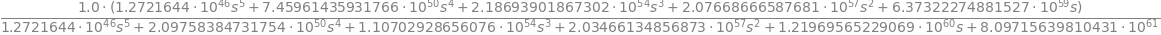

In [124]:
H = U[v8]/U[v1]
H

In [125]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

Poles and zeros of the transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [126]:
sys_tf = signal.TransferFunction(a,b)

In [127]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

Pole zero plot
The poles and zeros of the preamp transfer function are plotted.

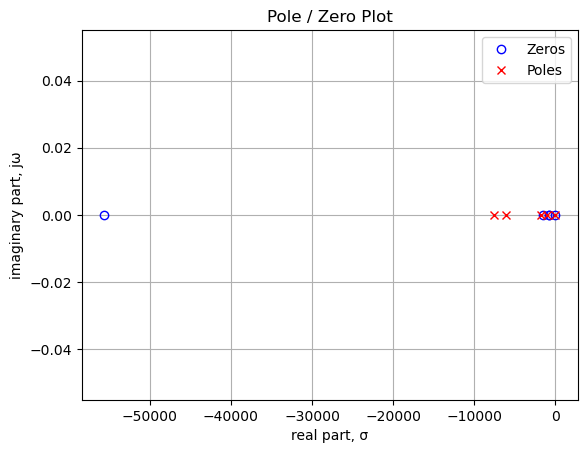

In [128]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03C3')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

$\large{\color {red} {\text{what is the pole/zero plot telling us? ... }}}$  

The plot above shows the location of poles and zeros of the transfer function plotted on the complex plane and the units are in radian frequency. The number of poles and zeros are equal. There is a zero at 0H not canceled by a pole and the value of the last zero is greater than the value of the last pole. This indicates that the transfer function is a band pass filter.

Printing these values in Hz.

In [129]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in range(len(sys_zeros)):
    print('z{:d}: {:,.2f} Hz'.format(i,sys_zeros[i]/(2*np.pi)))

print('number of poles: {:d}'.format(len(sys_poles)))
for i in range(len(sys_poles)):
    print('p{:d}: {:,.2f} Hz'.format(i,sys_poles[i]/(2*np.pi)))

number of zeros: 5
z0: -8,848.65 Hz
z1: -234.05 Hz
z2: -132.98 Hz
z3: -116.71 Hz
z4: 0.00 Hz
number of poles: 5
p0: -1,198.55 Hz
p1: -967.04 Hz
p2: -279.87 Hz
p3: -166.72 Hz
p4: -12.02 Hz


#### Step response


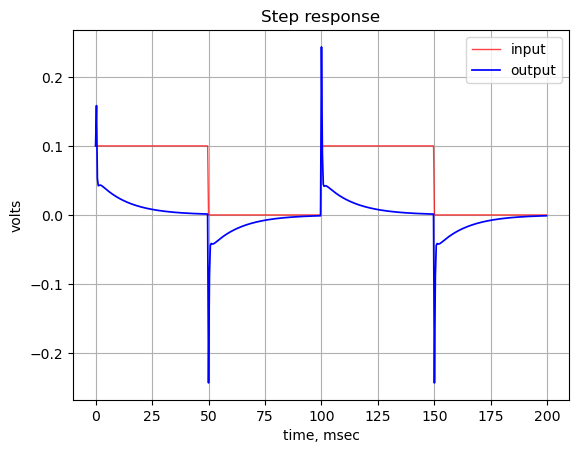

In [130]:
t = np.linspace(0, 0.2, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*10*t, duty=0.5)/20+1/20

t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha=0.75, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth=1.25, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

$\large{\color {red} {\text{what are these plots saying? ... }}}$  

#### Group delay

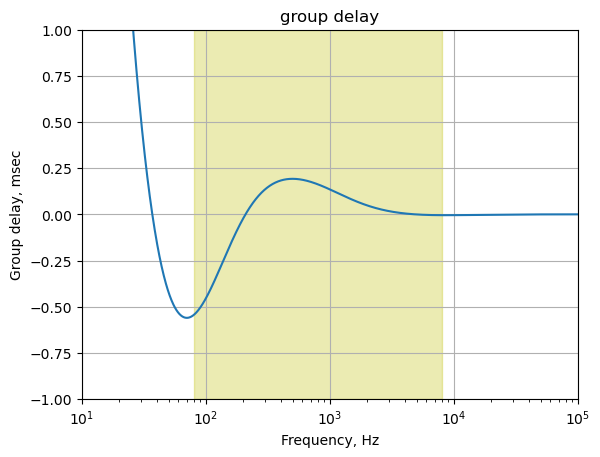

In [131]:
#x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 2000, endpoint=True)
x = np.logspace(0, 5, 2000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w)*1000,'-',label='group delay')

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.xlim((10,100e3))
plt.ylim((-1,1))

plt.ylabel('Group delay, msec')
plt.xlabel('Frequency, Hz')
#plt.legend()
plt.grid()
plt.show()

$\large{\color {red} {\text{comments about group delay ... }}}$  

The plot above shows that for frequencies in the guitar audio band, the group delay variation is less than 2 ms and therefore below the threshold of audibility as described in @sec-Group_delay.

### Distortion path part B {#sec-Distortion_path_part_B}

![Schematic of klon-centaur-schematic-high-res_w_diode_path2_highlight](klon-centaur-schematic-high-res_w_diode_path2_highlight.png){#fig-klon-centaur-schematic-high-res_w_diode_path2_highlight_sch}

Distortion path part B is high lighted in @fig-klon-centaur-schematic-high-res_w_diode_path2_highlight_sch. This path contains the limiting diodes, D2 and D3, which are commented out of the net list since there is no diode model supported by the MNA code. C9 and C10 block the DC bias voltage from the output of U1B and the DC coming ultimately from U1A down the R5, P1A, R17 and R16 path. R13 limits the current to D2 and D3 when the signal is greater than the forward conduction voltage of the diodes and operate in the exponential part of the conduction curve. The clipping diodes when driven into conduction mode, generate additional harmonics that combine with the guitar signal, which is already rich in harmonics.  

As described above the limiting diodes don’t effect the frequency response in a significant way, but they do control the maximum amplitude of the signal. This can be accounted for by setting V3 to 0.35 volts and looking at the response at node 2 with V1 and V2 set to zero.

C9

C10

C11 and R15

R16

R17, R18 and C12


R20||C13 and U2A

See @fig-Klon-Centaur_sum_path_v1_sch


#### Frequency response vs P1

Gain setting is a percent of full scale

In [132]:
element_values[V1] = 0
element_values[V2] = 0
element_values[V3] = 1

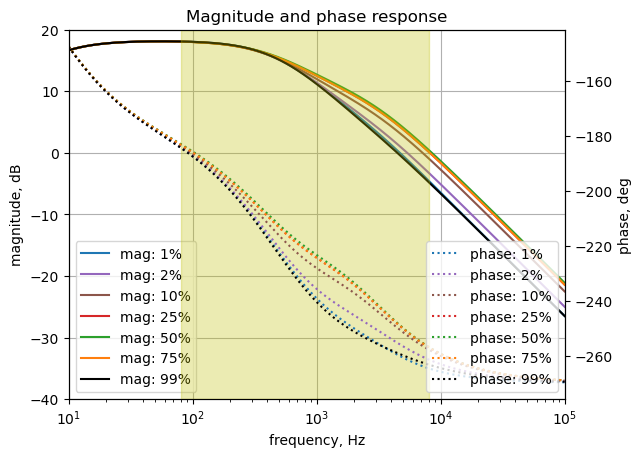

In [133]:
#| label: fig-diode-path2-freq-plot
#| echo: true
#| fig-cap: Diode path 2 magnitude and phase response

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

for i in range(len(gain_setting)):
    element_values[Rp1a1] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b1] = gain_setting[i]*p1_value
    
    element_values[Rp1a2] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b2] = gain_setting[i]*p1_value
    
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v20]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
    sys = (a, b)

    #x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
    w, mag, phase = signal.bode(sys, w=x_axis) # returns: rad/s, mag in dB, phase in deg
    diode_pathB_mag[i] = mag
    diode_pathB_w[i] = w

    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='mag: {:.0f}%'.format(gain_setting[i]*100))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='phase: {:.0f}%'.format(gain_setting[i]*100))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3) 

# set plot limits for display
plt.xlim((10,100e3))
ax1.set_ylim((-40,20))

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

Distortion path part B has a low pass filter characterist.

describe filter characteristics, 3dB point, roll off, gain at 1kHz

In [134]:
i = 4 # index for 50%
print('gain setting: {:.0f}%'.format(gain_setting[i]*100))

max_gain = diode_pathB_mag[i].max()
max_gain_arg = diode_pathB_mag[i].argmax()
max_gain_freq = diode_pathB_w[i][max_gain_arg]/(2*np.pi)
print('max gain: {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq))

gain_3dB_arg_offset = np.where(diode_pathB_mag[i][max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = diode_pathB_w[i][max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)
print('-3dB frequency: {:.1f} Hz'.format(freq_3dB))

print('diode pathB mag attenuation: {:.1f} dB per decade'.format(diode_pathB_mag[i][1500] - diode_pathB_mag[i][-1]))

gain setting: 50%
max gain: 18.1 dB at 54.2 Hz
-3dB frequency: 555.7 Hz
diode pathB mag attenuation: 19.7 dB per decade


#### Numerical solution for P1 at 50%

In [135]:
element_values = SymMNA.get_part_values(network_df)

p1_setting = 50/100 # setting the gain pot all the way CCW

element_values[Rp1a1] = p1_value - p1_setting*p1_value
element_values[Rp1b1] = p1_setting*p1_value

element_values[Rp1a2] = p1_value - p1_setting*p1_value
element_values[Rp1b2] = p1_setting*p1_value

NE = NE_sym.subs(element_values)

Display the equations with component values.

In [136]:
temp = ''
for i in range(shape(NE.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE.rhs[i]),latex(NE.lhs[i]))

Markdown(temp)

$0 = I_{V1} + 1.0 \cdot 10^{-7} s v_{1} - 1.0 \cdot 10^{-7} s v_{3}$<br>$0 = I_{O2a} + v_{12} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right) + v_{2} \cdot \left(8.2 \cdot 10^{-10} s + 2.55102040816327 \cdot 10^{-6}\right)$<br>$0 = - 1.0 \cdot 10^{-7} s v_{1} - 0.000666666666666667 v_{13} + v_{3} \cdot \left(1.68 \cdot 10^{-7} s + 0.000766666666666667\right) + v_{4} \left(- 6.8 \cdot 10^{-8} s - 0.0001\right)$<br>$0 = v_{3} \left(- 6.8 \cdot 10^{-8} s - 0.0001\right) + v_{4} \cdot \left(6.8 \cdot 10^{-8} s + 0.00012\right)$<br>$0 = 0.00052 v_{5} - 0.0005 v_{6}$<br>$0 = - 0.0005 v_{5} + v_{6} \cdot \left(8.2 \cdot 10^{-8} s + 0.000566666666666667\right) + v_{7} \left(- 8.2 \cdot 10^{-8} s - 6.66666666666667 \cdot 10^{-5}\right)$<br>$0 = v_{6} \left(- 8.2 \cdot 10^{-8} s - 6.66666666666667 \cdot 10^{-5}\right) + v_{7} \cdot \left(8.239 \cdot 10^{-8} s + 6.90363349131122 \cdot 10^{-5}\right) + v_{8} \left(- 3.9 \cdot 10^{-10} s - 2.3696682464455 \cdot 10^{-6}\right)$<br>$0 = I_{O1b} + v_{7} \left(- 3.9 \cdot 10^{-10} s - 2.3696682464455 \cdot 10^{-6}\right) + v_{8} \cdot \left(3.9 \cdot 10^{-10} s + 2.3696682464455 \cdot 10^{-6}\right)$<br>$0 = - 1.0 \cdot 10^{-6} s v_{20} - 0.001 v_{10} + v_{9} \cdot \left(1.0 \cdot 10^{-6} s + 0.001\right)$<br>$0 = - 1.0 \cdot 10^{-6} s v_{11} + v_{10} \cdot \left(1.0 \cdot 10^{-6} s + 0.001\right) - 0.001 v_{9}$<br>$0 = - 1.0 \cdot 10^{-6} s v_{10} - 2.2 \cdot 10^{-9} s v_{17} + v_{11} \cdot \left(1.0022 \cdot 10^{-6} s + 2.12765957446809 \cdot 10^{-5}\right) - 2.12765957446809 \cdot 10^{-5} v_{12}$<br>$0 = - 2.7 \cdot 10^{-8} s v_{18} - 2.12765957446809 \cdot 10^{-5} v_{11} + v_{12} \cdot \left(2.782 \cdot 10^{-8} s + 0.000127531319856548\right) - 6.66666666666667 \cdot 10^{-5} v_{13} - 3.7037037037037 \cdot 10^{-5} v_{16} + v_{2} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right)$<br>$0 = - 6.66666666666667 \cdot 10^{-5} v_{12} + v_{13} \cdot \left(1.0 \cdot 10^{-6} s + 0.000733333333333333\right) - 0.000666666666666667 v_{3}$<br>$0 = - 3.9 \cdot 10^{-7} s v_{15} + v_{14} \cdot \left(4.58 \cdot 10^{-7} s + 0.000882745098039216\right) - 2.0 \cdot 10^{-5} v_{16} + v_{19} \left(- 6.8 \cdot 10^{-8} s - 0.000196078431372549\right)$<br>$0 = - 3.9 \cdot 10^{-7} s v_{14} + v_{15} \cdot \left(3.9 \cdot 10^{-7} s + 0.001\right)$<br>$0 = - 3.7037037037037 \cdot 10^{-5} v_{12} - 2.0 \cdot 10^{-5} v_{14} + 0.000205824915824916 v_{16} - 4.54545454545455 \cdot 10^{-5} v_{17} - 8.33333333333333 \cdot 10^{-5} v_{18}$<br>$0 = - 2.2 \cdot 10^{-9} s v_{11} - 4.54545454545455 \cdot 10^{-5} v_{16} + v_{17} \cdot \left(2.2 \cdot 10^{-9} s + 4.54545454545455 \cdot 10^{-5}\right)$<br>$0 = - 2.7 \cdot 10^{-8} s v_{12} - 8.33333333333333 \cdot 10^{-5} v_{16} + v_{18} \cdot \left(2.7 \cdot 10^{-8} s + 8.33333333333333 \cdot 10^{-5}\right)$<br>$0 = I_{V2} + v_{14} \left(- 6.8 \cdot 10^{-8} s - 0.000196078431372549\right) + v_{19} \cdot \left(6.8 \cdot 10^{-8} s + 0.000196078431372549\right)$<br>$0 = I_{V3} + 1.0 \cdot 10^{-6} s v_{20} - 1.0 \cdot 10^{-6} s v_{9}$<br>$1.0 = v_{1}$<br>$1.0 = v_{19}$<br>$1.0 = v_{20}$<br>$0 = - v_{4} + v_{7}$<br>$0 = v_{12}$<br>

Solve for voltages and currents and display the results.

In [137]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{- 9.29553141408212 \cdot 10^{88} s^{8} - 4.30103462937519 \cdot 10^{93} s^{7} - 6.11659309506832 \cdot 10^{97} s^{6} - 3.77373755559035 \cdot 10^{101} s^{5} - 1.00983099637642 \cdot 10^{105} s^{4} - 1.20803689258094 \cdot 10^{108} s^{3} - 5.57914576747519 \cdot 10^{110} s^{2} - 3.43396416448592 \cdot 10^{112} s - 1.11067456479691 \cdot 10^{113}}{1.33285566411651 \cdot 10^{84} s^{9} + 8.02237810829399 \cdot 10^{88} s^{8} + 1.63129229223037 \cdot 10^{93} s^{7} + 1.42715654475416 \cdot 10^{97} s^{6} + 5.91961187527305 \cdot 10^{100} s^{5} + 1.23282818244087 \cdot 10^{104} s^{4} + 1.27051592689284 \cdot 10^{107} s^{3} + 5.57062729748062 \cdot 10^{109} s^{2} + 5.27972997019995 \cdot 10^{111} s + 1.31879571143618 \cdot 10^{113}}$<br>$v_{3} = \frac{1.53 \cdot 10^{25} s^{3} + 3.822 \cdot 10^{28} s^{2} + 1.98 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{4} = \frac{1.53 \cdot 10^{25} s^{3} + 3.372 \cdot 10^{28} s^{2} + 1.65 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{5} = \frac{1.56825 \cdot 10^{37} s^{4} + 4.7313 \cdot 10^{40} s^{3} + 4.50125 \cdot 10^{43} s^{2} + 1.375 \cdot 10^{46} s}{1.63098 \cdot 10^{37} s^{4} + 1.6982148 \cdot 10^{41} s^{3} + 3.87420704000001 \cdot 10^{44} s^{2} + 2.54543933333334 \cdot 10^{47} s + 1.70850000000001 \cdot 10^{49}}$<br>$v_{6} = \frac{1.63098 \cdot 10^{37} s^{4} + 4.920552 \cdot 10^{40} s^{3} + 4.6813 \cdot 10^{43} s^{2} + 1.43 \cdot 10^{46} s}{1.63098 \cdot 10^{37} s^{4} + 1.6982148 \cdot 10^{41} s^{3} + 3.87420704000001 \cdot 10^{44} s^{2} + 2.54543933333334 \cdot 10^{47} s + 1.70850000000001 \cdot 10^{49}}$<br>$v_{7} = \frac{1.53 \cdot 10^{25} s^{3} + 3.372 \cdot 10^{28} s^{2} + 1.65 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{8} = \frac{1.2721644 \cdot 10^{46} s^{5} + 7.45961435931766 \cdot 10^{50} s^{4} + 2.18693901867302 \cdot 10^{54} s^{3} + 2.07668666587681 \cdot 10^{57} s^{2} + 6.37322274881527 \cdot 10^{59} s}{1.2721644 \cdot 10^{46} s^{5} + 2.09758384731754 \cdot 10^{50} s^{4} + 1.10702928656076 \cdot 10^{54} s^{3} + 2.03466134856873 \cdot 10^{57} s^{2} + 1.21969565229069 \cdot 10^{60} s + 8.09715639810431 \cdot 10^{61}}$<br>$v_{9} = \frac{4.81802717154256 \cdot 10^{54} s^{5} + 2.29647511763023 \cdot 10^{59} s^{4} + 2.81166400933472 \cdot 10^{63} s^{3} + 6.20460940793865 \cdot 10^{66} s^{2} + 3.81368405997555 \cdot 10^{69} s + 7.66184872294075 \cdot 10^{70}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{10} = \frac{4.5796725 \cdot 10^{54} s^{5} + 2.2002892460091 \cdot 10^{59} s^{4} + 2.74146055590097 \cdot 10^{63} s^{3} + 6.06953185262171 \cdot 10^{66} s^{2} + 3.73706557274614 \cdot 10^{69} s + 7.66184872294075 \cdot 10^{70}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{11} = \frac{4.5796725 \cdot 10^{54} s^{5} + 2.19790569929367 \cdot 10^{59} s^{4} + 2.73184196873886 \cdot 10^{63} s^{3} + 5.99932839918797 \cdot 10^{66} s^{2} + 3.6019880174292 \cdot 10^{69} s}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{12} = 0.0$<br>$v_{13} = \frac{1.02 \cdot 10^{28} s^{2} + 1.8 \cdot 10^{31} s}{1.53 \cdot 10^{25} s^{3} + 1.4328 \cdot 10^{29} s^{2} + 2.13344 \cdot 10^{32} s + 1.53 \cdot 10^{34}}$<br>$v_{14} = \frac{7.70884347446809 \cdot 10^{55} s^{5} + 1.77304094412326 \cdot 10^{60} s^{4} + 9.78364383763291 \cdot 10^{63} s^{3} + 2.01131023341467 \cdot 10^{67} s^{2} + 1.40196836955285 \cdot 10^{70} s + 5.47822825670137 \cdot 10^{71}}{7.70884347446809 \cdot 10^{55} s^{5} + 3.67817386295305 \cdot 10^{60} s^{4} + 4.51405215439493 \cdot 10^{64} s^{3} + 1.00397005781958 \cdot 10^{68} s^{2} + 6.31801858446797 \cdot 10^{70} s + 2.45179159134104 \cdot 10^{72}}$<br>$v_{15} = \frac{7.70884347446809 \cdot 10^{55} s^{5} + 1.57537829093177 \cdot 10^{60} s^{4} + 5.74421232242324 \cdot 10^{63} s^{3} + 5.3843527894717 \cdot 10^{66} s^{2} + 2.13650902011353 \cdot 10^{68} s}{7.70884347446809 \cdot 10^{55} s^{5} + 3.67817386295305 \cdot 10^{60} s^{4} + 4.51405215439493 \cdot 10^{64} s^{3} + 1.00397005781958 \cdot 10^{68} s^{2} + 6.31801858446797 \cdot 10^{70} s + 2.45179159134104 \cdot 10^{72}}$<br>$v_{16} = \frac{1.47954621542553 \cdot 10^{54} s^{5} + 4.70101487079588 \cdot 10^{58} s^{4} + 2.1964959664922 \cdot 10^{62} s^{3} + 3.45292896660598 \cdot 10^{65} s^{2} + 2.24113593696666 \cdot 10^{68} s + 8.88895209921494 \cdot 10^{69}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{17} = \frac{4.5796725 \cdot 10^{54} s^{5} + 1.55738373967085 \cdot 10^{59} s^{4} + 4.85391033632951 \cdot 10^{62} s^{3} + 5.08802841672883 \cdot 10^{65} s^{2} + 2.23683368415064 \cdot 10^{68} s + 8.88895209921494 \cdot 10^{69}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{18} = \frac{4.56650066489361 \cdot 10^{57} s^{4} + 1.30998913713164 \cdot 10^{62} s^{3} + 2.73613218938446 \cdot 10^{65} s^{2} + 2.2123357321652 \cdot 10^{68} s + 8.88895209921494 \cdot 10^{69}}{4.81802717154256 \cdot 10^{54} s^{5} + 2.29885866434566 \cdot 10^{59} s^{4} + 2.82128259649683 \cdot 10^{63} s^{3} + 6.27481286137239 \cdot 10^{66} s^{2} + 3.94876161529248 \cdot 10^{69} s + 1.53236974458815 \cdot 10^{71}}$<br>$v_{19} = 1.0$<br>$v_{20} = 1.0$<br>$I_{V1} = \frac{- 1.0506 \cdot 10^{29} s^{3} - 1.93544 \cdot 10^{32} s^{2} - 1.53 \cdot 10^{34} s}{1.53 \cdot 10^{32} s^{3} + 1.4328 \cdot 10^{36} s^{2} + 2.13344 \cdot 10^{39} s + 1.53 \cdot 10^{41}}$<br>$I_{V2} = \frac{- 1.29549038480426 \cdot 10^{71} s^{5} - 2.77782315830986 \cdot 10^{75} s^{4} - 1.23920265533368 \cdot 10^{79} s^{3} - 1.90848559986544 \cdot 10^{82} s^{2} - 9.76878402295801 \cdot 10^{84} s - 3.73327208955079 \cdot 10^{86}}{7.70884347446809 \cdot 10^{73} s^{5} + 3.67817386295305 \cdot 10^{78} s^{4} + 4.51405215439493 \cdot 10^{82} s^{3} + 1.00397005781958 \cdot 10^{86} s^{2} + 6.31801858446797 \cdot 10^{88} s + 2.45179159134104 \cdot 10^{90}}$<br>$I_{V3} = \frac{- 2.38354671542554 \cdot 10^{53} s^{5} - 9.61858716211317 \cdot 10^{57} s^{4} - 7.02034534337431 \cdot 10^{61} s^{3} - 1.35077555316937 \cdot 10^{65} s^{2} - 7.66184872294075 \cdot 10^{67} s}{4.81802717154256 \cdot 10^{57} s^{5} + 2.29885866434566 \cdot 10^{62} s^{4} + 2.82128259649683 \cdot 10^{66} s^{3} + 6.27481286137239 \cdot 10^{69} s^{2} + 3.94876161529248 \cdot 10^{72} s + 1.53236974458815 \cdot 10^{74}}$<br>$I_{O1b} = \frac{- 3.13650000000006 \cdot 10^{40} s^{4} - 9.46260000000018 \cdot 10^{43} s^{3} - 9.00250000000017 \cdot 10^{46} s^{2} - 2.75000000000005 \cdot 10^{49} s}{1.63098 \cdot 10^{45} s^{4} + 1.6982148 \cdot 10^{49} s^{3} + 3.87420704000001 \cdot 10^{52} s^{2} + 2.54543933333334 \cdot 10^{55} s + 1.70850000000001 \cdot 10^{57}}$<br>$I_{O2a} = \frac{3.7940944547274 \cdot 10^{79} s^{8} + 1.75552433852049 \cdot 10^{84} s^{7} + 2.49656861023197 \cdot 10^{88} s^{6} + 1.5403010430981 \cdot 10^{92} s^{5} + 4.12175916888334 \cdot 10^{95} s^{4} + 4.93076282686096 \cdot 10^{98} s^{3} + 2.2772023540715 \cdot 10^{101} s^{2} + 1.40161802632079 \cdot 10^{103} s + 4.53336557059962 \cdot 10^{103}}{6.6344234152141 \cdot 10^{83} s^{8} + 3.78682262062873 \cdot 10^{88} s^{7} + 6.94184110722285 \cdot 10^{92} s^{6} + 4.94420843978464 \cdot 10^{96} s^{5} + 1.40840298676339 \cdot 10^{100} s^{4} + 1.75498414989422 \cdot 10^{103} s^{3} + 8.64364525679175 \cdot 10^{105} s^{2} + 8.37974176136248 \cdot 10^{107} s + 2.11007313829788 \cdot 10^{109}}$<br>

transfer function

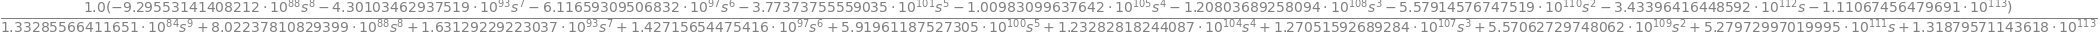

In [138]:
H = U[v2]/U[v20]
H

In [139]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

Poles and zeros of the transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [140]:
sys_tf = signal.TransferFunction(a,b)

sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

#### Pole zero plot
The poles and zeros of the preamp transfer function are plotted.

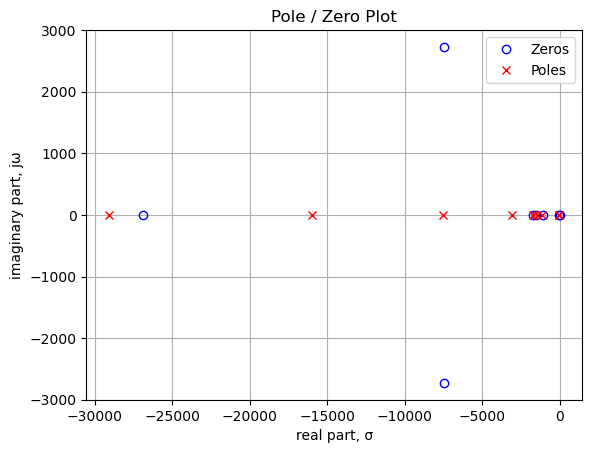

In [141]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03C3')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

$\large{\color {red} {\text{what is the pole/zero plot telling us? ... }}}$  

The plot above and the calculations below show that there are eight zeros and nine poles in the transfer function. There is no zero at 0 Hz which is cancelled by a pole, so the network on this path has a direct current path. The zeros at 1,186 Hz have complex conjugates. With P1 set to 50%, the complex zero does not affect the transient response as shown below.

Printing the pole and zero values in Hz.

In [142]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in range(len(sys_zeros)):
    print('z{:d}: {:,.2f} Hz'.format(i,sys_zeros[i]/(2*np.pi)))

print('number of poles: {:d}'.format(len(sys_poles)))
for i in range(len(sys_poles)):
    print('p{:d}: {:,.2f} Hz'.format(i,sys_poles[i]/(2*np.pi)))

number of zeros: 8
z0: -4,275.98+0.00j Hz
z1: -1,186.77+434.15j Hz
z2: -1,186.77-434.15j Hz
z3: -280.29+0.00j Hz
z4: -246.06+0.00j Hz
z5: -176.83+0.00j Hz
z6: -10.84+0.00j Hz
z7: -0.54+0.00j Hz
number of poles: 9
p0: -4,629.79 Hz
p1: -2,545.69 Hz
p2: -1,198.55 Hz
p3: -495.13 Hz
p4: -279.87 Hz
p5: -231.62 Hz
p6: -180.17 Hz
p7: -12.02 Hz
p8: -6.60 Hz


#### Step response


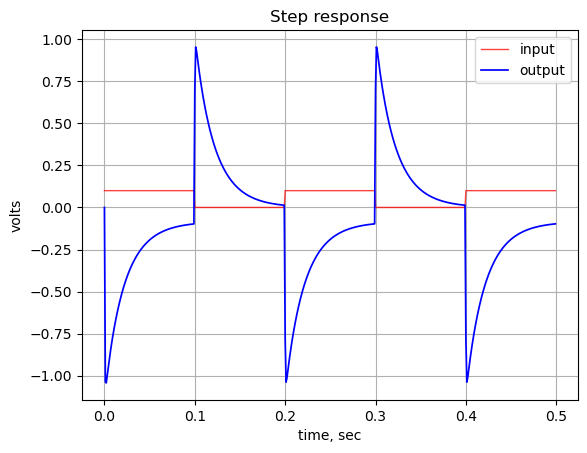

In [143]:
t = np.linspace(0, 0.5, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*5*t, duty=0.5)/20+1/20

t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha=0.75, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth=1.25, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

$\large{\color {red} {\text{what are these plots saying? ... }}}$  

The value of the step response approchious a value of about -0.85 volts, indicating the path is DC coupled. 

#### Group delay


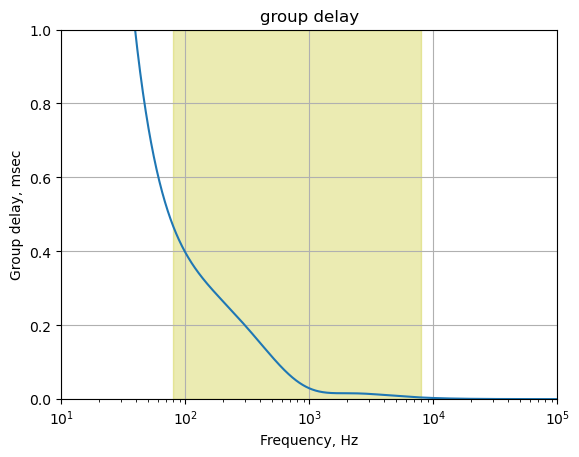

In [144]:
#x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 2000, endpoint=True)
x = np.logspace(0, 5, 2000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w)*1000,'-',label='group delay')

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.xlim((10,100e3))
plt.ylim((0,1))

plt.ylabel('Group delay, msec')
plt.xlabel('Frequency, Hz')
#plt.legend()
plt.grid()
plt.show()

$\large{\color {red} {\text{comments about group delay ... }}}$  

The plot above shows that for frequencies in the guitar audio band, the group delay variation is less than 2 ms and therefore below the threshold of audibility as described in @sec-Group_delay.

## Overlay amplitude response for the paths
Frequency response plots for the paths are overlayed to examine their relative gains through the summing amplifier.  The solid lines are for the clean paths 1, 2 and the cascade of distortion path parts A abd B.  Distortion path part A and part B are plotted as a dash/dot line since the signal in this path is modified by the diodes before traveling to part B of the path.  

The frequency response data is plotted from 10 to 100 kHz and the amplitude starting at a level of -40 dB. The frequency band of 80 to 8kHz is the typical audio band of an electric guitar and is plotted to highlighted the band of interest. It is possible that sub harmonics of the guitar signal might be present below 80 Hz, and it is also possible that harmonics of the signal could extend to frequencies above 8kHz. The highlighed frequecy band is not an absolut limit, but drawn only as a referece to indicate the general area to focus on for the analysis.

When looking the the amplitude plots overlayed, you will need to imagain that signals on paths with greater gain will dominate over signals on paths that have less gain. 

If the gain levels are greater than 1 or 2 dB, then signals on the lower gain paths might be decernable in the output.  

The required input level needed to drive the diodes in the distortion path into non-linear range varies with the gain setting. 

At lower gain settings, say from 0 to 10%, input levels above 0.05 volts peak are needed to drive the diodes in the distortion path into non-linear range and acheive a blend of clean and distortion. 

At a gain setting of 50%, an input level of 0.015 volts peak is need to drive the diodes into non-linear range, while clean path 1 is more than 10 dB down from the distortion path and clean path 2 is attenuating the signal. Both clean paths are probably not disernable in the output. 


What is heard at the output will depend on the signal level at the input. At a gain setting of 1%, that is with the gain control mostly counter clockwise, with input levels of less than 0.25 volts peak, the diodes will not be conducting to an degree where clipping of the signal will take place. This is explained below.



If the input signal amplidude is below 300 mV, the didoes will not be conducting and there will be no distoring in the distortion path reguardless of the setting of the gain pot.

The plots below don't tell the whole story of what's happining in the signal path. 

The frequency response plots are plotted for a gain setting of 1%, which is 1% rotational travel on the knob in the clockwise direction.  

https://en.wikipedia.org/wiki/Auditory_masking

https://en.wikipedia.org/wiki/Cocktail_party_effect

Clean path 1

Clean path 2

Distortion path part A

Distortion path part B


### gain setting 1%
The frequency response plots are plotted for a gain setting of 1%, which is 1% rotational travel on the knob in the clockwise direction. As shown below, clean path 2 has the most gain across the guitar audio band. 

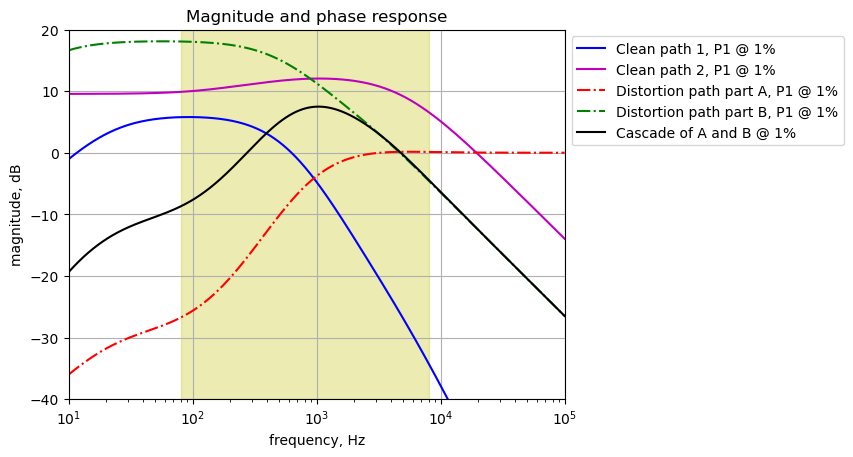

In [145]:
plt.ylabel('magnitude, dB')
plt.xlabel('frequency, Hz')

i = 0 # set the index for the gain setting of interest

plt.semilogx(clean_path1_w[i]/(2*np.pi), clean_path1_mag[i],'-b',label='Clean path 1, P1 @ {:.0f}%'.format(gain_setting[i]*100))
plt.semilogx(clean_path2_w[i]/(2*np.pi), clean_path2_mag[i],'-m',label='Clean path 2, P1 @ {:.0f}%'.format(gain_setting[i]*100))

plt.semilogx(diode_pathA_w[i]/(2*np.pi), diode_pathA_mag[i],'-.r',label='Distortion path part A, P1 @ {:.0f}%'.format(gain_setting[i]*100))
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i],'-.g',label='Distortion path part B, P1 @ {:.0f}%'.format(gain_setting[i]*100))

# cascade of diode path part A and B
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i]+diode_pathA_mag[i],'-k',label='Cascade of A and B @ {:.0f}%'.format(gain_setting[i]*100))

plt.tick_params(axis='y')
plt.xlim((10,100e3))
plt.ylim((-40,20))
plt.grid()

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.legend(bbox_to_anchor=(1,1))
plt.title('Magnitude and phase response')
plt.show()

Clean path 2 is the path with the most gain across the guitar audio spectrum. Overall effect is about 10 dB of clean gain from 80 to 1kHz and above 1kHz, the gain rolls off. Clean path 1 is not contributing much to the output. The gain for distortion path part A is negative for the band 80 to 1kHz and about 0 dB for higher frequencies. Signals on clean path 1 are probably not perceptable in the output since the gain in this path is more than 3 dB lower than clean path 2.

<!--
Signals in this path probably lack sufficient amplidude to drive the diodes into conduction. At a gain setting of 1%, the signal on clean path 2 would dominate. Signals on clean path 1 will be greatly attenuated compared to the signals on other paths.

The gain of Clean path 1, shown in blue, has a low pass frequency response. Signal level through this path is probably below the threshold of perseption.

The gain of Clean path 2, shown in purple, has a low pass frequenc response with a slight rise around 500 Hz. With the gain pot set at 1%, the gain of this path is a bit more than 10 dB at 1kHz. 

The gain of the Distortion path part A, shown in dot/dash red, is attenuating the signal below 1kHz and adding no gain in the band 1 kHz to 8 kHz.  

The gain of the Distortion path part B, shown in black, has the most gain of any path, but the signal from the part A path has not been attentated, so the output from this path, which is attenuated compared to clean path 2. 

The signal traveling clean path 2 is the signal which is predominate in the putput. 
-->

The 1N34A diodes in the distortion path will start to conduct sufficient current to produce harmonics at a voltage near the knee of the diode's voltage current curve, see @fig-diode_volts_current_plot. For the purposes of the calculations below, this point on the curve or knee is 0.25 volts. Typically, the forward voltage at a current of 5 mA is used to define the forward conduction voltage, but here we are intreseted using the voltage where the diode starts to conduct current and generate harmonics.

In [146]:
Diode_knee_1N34A = 0.25

The calculation below find the maximum gain points on the curves above. BY using the maximum points we can get an idea of the relative signal levels in the output from each path. 

In [147]:
print('clean path 1 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path1_mag[i].max(),gain_setting[i]*100))
print('clean path 2 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path2_mag[i].max(),gain_setting[i]*100))
print('cascade of A and B maximum gain {:.1f} dB at {:.2f}%'.format((diode_pathB_mag[i]+diode_pathA_mag[i]).max(),gain_setting[i]*100))

max_gain_dB = diode_pathA_mag[i].max()
print('path A maximum gain {:.1f} dB at {:.0f}%'.format(max_gain_dB,gain_setting[i]*100))
print('peak signal for diode conduction threshold: {:.3f} Vp'.format(Diode_knee_1N34A/(10**(max_gain_dB/10))))

clean path 1 maximum gain 5.8 dB at 1.00%
clean path 2 maximum gain 12.0 dB at 1.00%
cascade of A and B maximum gain 7.5 dB at 1.00%
path A maximum gain 0.2 dB at 1%
peak signal for diode conduction threshold: 0.241 Vp


With a gain setting of 1%, an input signal of greater than about 0.25 volts peak is needed to drive the diodes into conduction and to start producing harmonics. The gain of clean path 2 is substantially higher than that of clean path 1 and the signal on clean path 1 probably will not be discernable in the output. This assumption could be easily verfified by conducting blind listening tests. A drive signal to the pedal of greater than 0.25 volts peak is needed to produce harmonics in output. Since the gain of the distortion path with P1 set to 1% is 4 dB lower than clean path 2, any harmonics would be difficult to decern. 

### gain setting 2.5%
The frequency response plots are plotted for a gain setting of 2.5%, which is 2.5% rotational travel on the knob in the clockwise direction. At this gain setting, it appears that the clean path 2 and the distortion path are able to provide contributions to the output since the gains at some frequencies are compariable.  

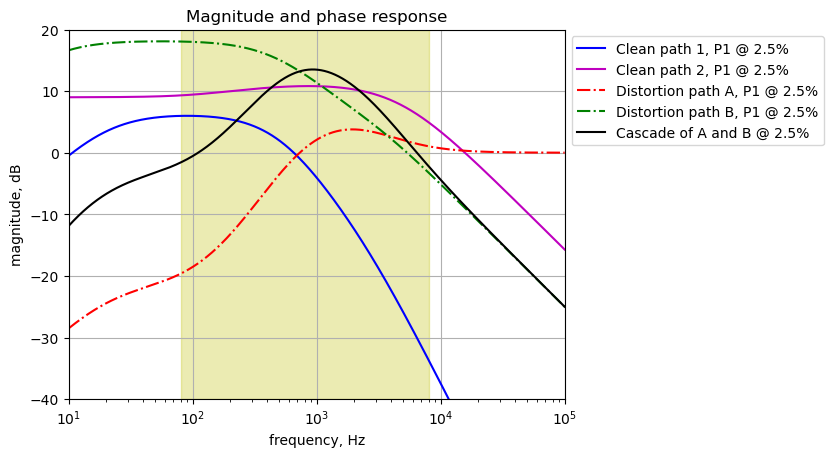

In [148]:
plt.ylabel('magnitude, dB')
plt.xlabel('frequency, Hz')

i = 1 # set the index for the gain setting of interest

plt.semilogx(clean_path1_w[i]/(2*np.pi), clean_path1_mag[i],'-b',label='Clean path 1, P1 @ {:.1f}%'.format(gain_setting[i]*100))
plt.semilogx(clean_path2_w[i]/(2*np.pi), clean_path2_mag[i],'-m',label='Clean path 2, P1 @ {:.1f}%'.format(gain_setting[i]*100))

plt.semilogx(diode_pathA_w[i]/(2*np.pi), diode_pathA_mag[i],'-.r',label='Distortion path A, P1 @ {:.1f}%'.format(gain_setting[i]*100))
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i],'-.g',label='Distortion path B, P1 @ {:.1f}%'.format(gain_setting[i]*100))

# cascade of diode path part A and B
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i]+diode_pathA_mag[i],'-k',label='Cascade of A and B @ {:.1f}%'.format(gain_setting[i]*100))

plt.tick_params(axis='y')
plt.xlim((10,100e3))
plt.ylim((-40,20))
plt.grid()

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.legend(bbox_to_anchor=(1,1))
plt.title('Magnitude and phase response')
plt.show()

As shown in th eplots above, the gain for clean path 1 is substantially less than clean path 2. The calculations below show that the difference in gain is about 4 dB. At any drive level, the amplitude of the signal will on clean path 2 will be more than twice that of clean path 1. The signal on clean path 1 probably will not be decernable in the output. 

In [149]:
print('clean path 1 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path1_mag[i].max(),gain_setting[i]*100))
print('clean path 2 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path2_mag[i].max(),gain_setting[i]*100))
print('cascade of A and B maximum gain {:.1f} dB at {:.2f}%'.format((diode_pathB_mag[i]+diode_pathA_mag[i]).max(),gain_setting[i]*100))

max_gain_dB = diode_pathA_mag[i].max()
print('path A maximum gain {:.1f} dB at {:.2f}%'.format(max_gain_dB,gain_setting[i]*100))
print('peak signal for diode conduction threshold: {:.3f} Vp'.format(Diode_knee_1N34A/(10**(max_gain_dB/10))))

clean path 1 maximum gain 6.0 dB at 2.50%
clean path 2 maximum gain 10.8 dB at 2.50%
cascade of A and B maximum gain 13.5 dB at 2.50%
path A maximum gain 3.8 dB at 2.50%
peak signal for diode conduction threshold: 0.105 Vp


An input signal of greater than about 0.1 volts peak is needed to to drive the diodes into conduction and produce harmonics. Distortion path part A is starting to provide some boost to the signals as shown by the red dot/dash curve. Signals following the diodes are then filtered by the profile shown by the green dot/dash curve, which is the distortion path part B. Near 1 kHz, you can see that the cascade of the distortion path parts A and B are providing a bit of a boost over that of clean path 2. Diode path B has the most gain up to about 1kHz then clean path 2 has more. Diode path A is boosting the signal in the band 600 Hz and higher into the diodes so this signal should dominate from 300 Hz to about 3 kHz. 

Signals on clean path 1 will be overshawed compared to the signals on other paths over most of the guitar audio band. The signal through Clean path 1 is probably below the preseption threshold.
 
The gain profiles through paths 2 and the distortion path at a gain setting of 2.5% illustrate the need for a preamp pedal prior to the Klon to control the signal level to the Klon. Normal guitar playing might be too soft to acheive the desired mix of clean and distortion through the Klon.   

### gain setting 9.75%
The frequency response plots are plotted for a gain setting of 9.75%, which is almost 10% rotational travel on the knob in the clockwise direction. At this gain setting, it appears that the clean paths and distortion path are able to provide contributions to the output since the gains at around 80 Hz are about the same.  

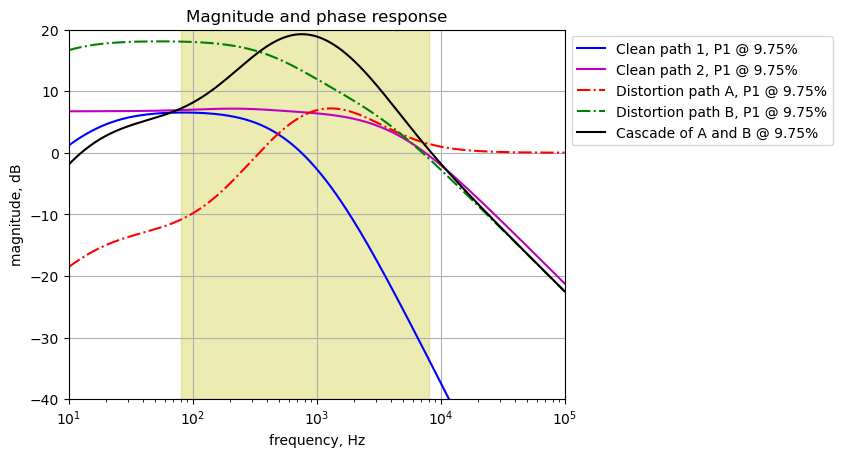

In [150]:
plt.ylabel('magnitude, dB')
plt.xlabel('frequency, Hz')

i = 2 # set the idex for the gain setting of interest

plt.semilogx(clean_path1_w[i]/(2*np.pi), clean_path1_mag[i],'-b',label='Clean path 1, P1 @ {:.2f}%'.format(gain_setting[i]*100))
plt.semilogx(clean_path2_w[i]/(2*np.pi), clean_path2_mag[i],'-m',label='Clean path 2, P1 @ {:.2f}%'.format(gain_setting[i]*100))

plt.semilogx(diode_pathA_w[i]/(2*np.pi), diode_pathA_mag[i],'-.r',label='Distortion path A, P1 @ {:.2f}%'.format(gain_setting[i]*100))
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i],'-.g',label='Distortion path B, P1 @ {:.2f}%'.format(gain_setting[i]*100))

# cascade of diode path part A and B
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i]+diode_pathA_mag[i],'-k',label='Cascade of A and B @ {:.2f}%'.format(gain_setting[i]*100))

plt.tick_params(axis='y')
plt.xlim((10,100e3))
plt.ylim((-40,20))
plt.grid()

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.legend(bbox_to_anchor=(1,1))
plt.title('Magnitude and phase response')
plt.show()

At the low end of the guitar audio range, about 80 Hz, the gains on the clean paths and the distortion path are the same. Over the remainder of the guitar audio band, the distortion path dominates. 

In [151]:
print('clean path 1 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path1_mag[i].max(),gain_setting[i]*100))
print('clean path 2 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path2_mag[i].max(),gain_setting[i]*100))
print('cascade of A and B maximum gain {:.1f} dB at {:.2f}%'.format((diode_pathB_mag[i]+diode_pathA_mag[i]).max(),gain_setting[i]*100))

max_gain_dB = diode_pathA_mag[i].max()
print('path A maximum gain {:.1f} dB at {:.2f}%'.format(max_gain_dB,gain_setting[i]*100))
print('peak signal for diode conduction threshold: {:.3f} Vp'.format(Diode_knee_1N34A/(10**(max_gain_dB/10))))

clean path 1 maximum gain 6.5 dB at 9.75%
clean path 2 maximum gain 7.2 dB at 9.75%
cascade of A and B maximum gain 19.2 dB at 9.75%
path A maximum gain 7.2 dB at 9.75%
peak signal for diode conduction threshold: 0.048 Vp


An input signal of greater than about 0.05 volts peak is needed to drive the diodes into conduction.

<!--
input signal need to be greater than about 0.05 volts peak to drive the diodes into conduction.

Distortion path part A is starting to provide some boost to the signals as shown by the red dot/dash curve. Signals following this path are then filtered by the profile shown by the black curve, which is the distortion path B. Near 100 Hz, the gains of all paths are somwhat simular and it is possible that within the band from 80 to 200 Hz, each path contributes a noticable amount to the output. However, above 200 Hz, it appears that clean path 1 provids too much attenuation to have a noticable contribution to the output.   


Diode path B has the most gain up to about 3kHz then clean path 2 has more. Diode path A is boosting the signal in the band 200 Hz and higher into the diodes so this signal should dominate from 80 Hz to about 3 kHz. 

Signals on clean path 1 will be greatly attenuated compared to the signals on other paths over most of the guitar audio band.
 
what is the steepness of the attenuation? 

The signal through Clean path 1 is probably below the preseption threshold.

The gain of Clean path 2 looks compriable to the gain through Distortion path part A and Distortion path part B. At a setting gain setting of approximately 7%, the signals through Clean path 2 and Distortion path part A and Distortion path part B are of simular amplitude and sound from both both the clean and distorted paths would be preseptable in the output. The amount of distortion would depended on if the amplitude of the input signal was sufficient to cause the diodes to conduct. 
-->

### gain setting 25%
The frequency response plots are plotted for a gain setting of 25%, which is 25% rotational travel on the knob in the clockwise direction. At this gain setting, it appears that the distortion path will dominate the output.  

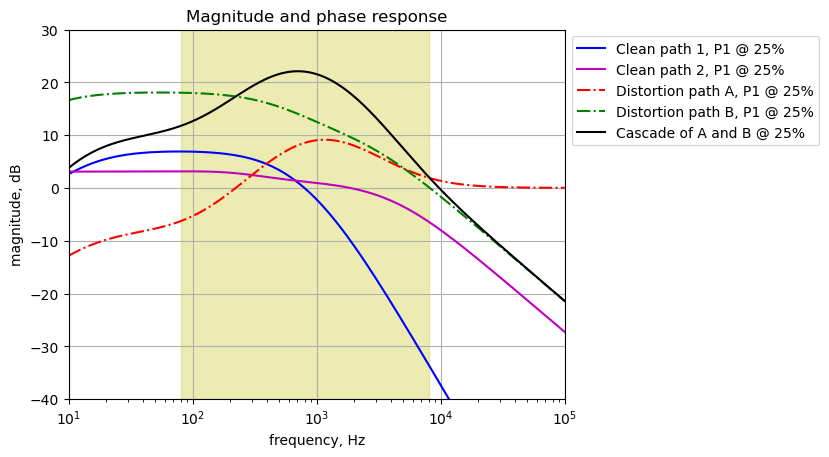

In [152]:
plt.ylabel('magnitude, dB')
plt.xlabel('frequency, Hz')

i = 3 # set the index for the gain setting of interest

plt.semilogx(clean_path1_w[i]/(2*np.pi), clean_path1_mag[i],'-b',label='Clean path 1, P1 @ {:.0f}%'.format(gain_setting[i]*100))
plt.semilogx(clean_path2_w[i]/(2*np.pi), clean_path2_mag[i],'-m',label='Clean path 2, P1 @ {:.0f}%'.format(gain_setting[i]*100))

plt.semilogx(diode_pathA_w[i]/(2*np.pi), diode_pathA_mag[i],'-.r',label='Distortion path A, P1 @ {:.0f}%'.format(gain_setting[i]*100))
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i],'-.g',label='Distortion path B, P1 @ {:.0f}%'.format(gain_setting[i]*100))

# cascade of diode path part A and B
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i]+diode_pathA_mag[i],'-k',label='Cascade of A and B @ {:.0f}%'.format(gain_setting[i]*100))

plt.tick_params(axis='y')
plt.xlim((10,100e3))
plt.ylim((-40,30))
plt.grid()

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.legend(bbox_to_anchor=(1,1))
plt.title('Magnitude and phase response')
plt.show()

The gains on the clean paths are not high enough to compete with the gain of the distortion path at a gain setting of 25%.

In [153]:
print('clean path 1 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path1_mag[i].max(),gain_setting[i]*100))
print('clean path 2 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path2_mag[i].max(),gain_setting[i]*100))
print('cascade of A and B maximum gain {:.1f} dB at {:.2f}%'.format((diode_pathB_mag[i]+diode_pathA_mag[i]).max(),gain_setting[i]*100))

max_gain_dB = diode_pathA_mag[i].max()
print('path A maximum gain {:.1f} dB at {:.0f}%'.format(max_gain_dB,gain_setting[i]*100))
print('peak signal for diode conduction threshold: {:.3f} Vp'.format(Diode_knee_1N34A/(10**(max_gain_dB/10))))

clean path 1 maximum gain 6.9 dB at 25.00%
clean path 2 maximum gain 3.1 dB at 25.00%
cascade of A and B maximum gain 22.1 dB at 25.00%
path A maximum gain 9.1 dB at 25%
peak signal for diode conduction threshold: 0.031 Vp


An input signal of greater than about 0.03 volts peak is needed to drive the diodes into conduction.

### gain setting 50%
The frequency response plots are plotted for a gain setting of 50%. At this gain setting, it appears that the distortion path will dominate the output.  

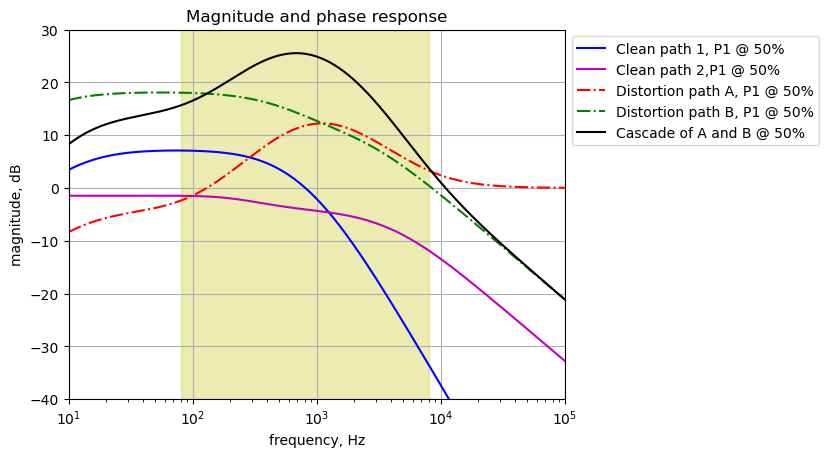

In [154]:
plt.ylabel('magnitude, dB')
plt.xlabel('frequency, Hz')

i = 4 # set the index for the gain setting of interest

plt.semilogx(clean_path1_w[i]/(2*np.pi), clean_path1_mag[i],'-b',label='Clean path 1, P1 @ {:.0f}%'.format(gain_setting[i]*100))
plt.semilogx(clean_path2_w[i]/(2*np.pi), clean_path2_mag[i],'-m',label='Clean path 2,P1 @ {:.0f}%'.format(gain_setting[i]*100))

plt.semilogx(diode_pathA_w[i]/(2*np.pi), diode_pathA_mag[i],'-.r',label='Distortion path A, P1 @ {:.0f}%'.format(gain_setting[i]*100))
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i],'-.g',label='Distortion path B, P1 @ {:.0f}%'.format(gain_setting[i]*100))

# cascade of diode path part A and B
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i]+diode_pathA_mag[i],'-k',label='Cascade of A and B @ {:.0f}%'.format(gain_setting[i]*100))

plt.tick_params(axis='y')
plt.xlim((10,100e3))
plt.ylim((-40,30))
plt.grid()

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.legend(bbox_to_anchor=(1,1))
plt.title('Magnitude and phase response')
plt.show()

The gains on the clean paths are not high enough to compete with the gain of the distortion path at a gain setting of 50%.

In [155]:
print('clean path 1 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path1_mag[i].max(),gain_setting[i]*100))
print('clean path 2 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path2_mag[i].max(),gain_setting[i]*100))
print('cascade of A and B maximum gain {:.1f} dB at {:.2f}%'.format((diode_pathB_mag[i]+diode_pathA_mag[i]).max(),gain_setting[i]*100))

max_gain_dB = diode_pathA_mag[i].max()
print('path A maximum gain {:.1f} dB at {:.0f}%'.format(max_gain_dB,gain_setting[i]*100))
print('peak signal for diode conduction threshold: {:.3f} Vp'.format(Diode_knee_1N34A/(10**(max_gain_dB/10))))

clean path 1 maximum gain 7.1 dB at 50.00%
clean path 2 maximum gain -1.5 dB at 50.00%
cascade of A and B maximum gain 25.5 dB at 50.00%
path A maximum gain 12.2 dB at 50%
peak signal for diode conduction threshold: 0.015 Vp


An input signal of greater than about 0.015 volts peak is needed to drive the diodes into conduction.

Based on my research of how guitar players set up their Klons, a 40% to 60% gain position is seems to be common to achieve the tone they desire. At this point clean path 2 is more than 3 dB less than Diode path B and probably not very audible.  In the lower half of the guitar band, clean path 1 is about 2 to 3 dB less than diode path B and becoming less audible. 


### gain setting 75%
The frequency response plots are plotted for a gain setting of 75%.

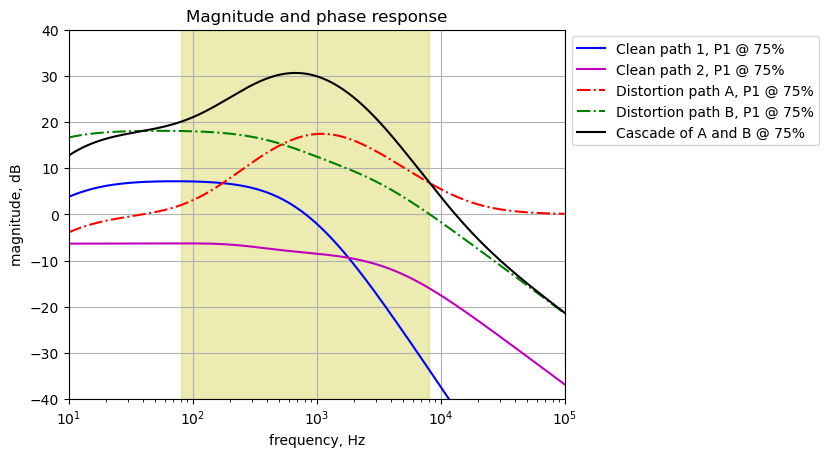

In [156]:
plt.ylabel('magnitude, dB')
plt.xlabel('frequency, Hz')

i = 5 # set the index for the gain setting of interest

plt.semilogx(clean_path1_w[i]/(2*np.pi), clean_path1_mag[i],'-b',label='Clean path 1, P1 @ {:.0f}%'.format(gain_setting[i]*100))
plt.semilogx(clean_path2_w[i]/(2*np.pi), clean_path2_mag[i],'-m',label='Clean path 2, P1 @ {:.0f}%'.format(gain_setting[i]*100))

plt.semilogx(diode_pathA_w[i]/(2*np.pi), diode_pathA_mag[i],'-.r',label='Distortion path A, P1 @ {:.0f}%'.format(gain_setting[i]*100))
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i],'-.g',label='Distortion path B, P1 @ {:.0f}%'.format(gain_setting[i]*100))

# cascade of diode path part A and B
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i]+diode_pathA_mag[i],'-k',label='Cascade of A and B @ {:.0f}%'.format(gain_setting[i]*100))

plt.tick_params(axis='y')
plt.xlim((10,100e3))
plt.ylim((-40,40))
plt.grid()

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.legend(bbox_to_anchor=(1,1))
plt.title('Magnitude and phase response')
plt.show()

The gains on the clean paths are not high enough to compete with the gain of the distortion path at a gain setting of 75%.

In [157]:
print('clean path 1 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path1_mag[i].max(),gain_setting[i]*100))
print('clean path 2 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path2_mag[i].max(),gain_setting[i]*100))
print('cascade of A and B maximum gain {:.1f} dB at {:.2f}%'.format((diode_pathB_mag[i]+diode_pathA_mag[i]).max(),gain_setting[i]*100))

max_gain_dB = diode_pathA_mag[i].max()
print('path A maximum gain {:.1f} dB at {:.0f}%'.format(max_gain_dB,gain_setting[i]*100))
print('peak signal for diode conduction threshold: {:.2f} mVp'.format(1000*Diode_knee_1N34A/(10**(max_gain_dB/10))))

clean path 1 maximum gain 7.2 dB at 75.00%
clean path 2 maximum gain -6.3 dB at 75.00%
cascade of A and B maximum gain 30.6 dB at 75.00%
path A maximum gain 17.4 dB at 75%
peak signal for diode conduction threshold: 4.52 mVp


An input signal of greater than about 0.005 volts peak is needed to drive the diodes into conduction.

### gain setting 99%
Setting the gain control to 99% of full scale and plotting the frequence response of the paths to compare the relative gains. 

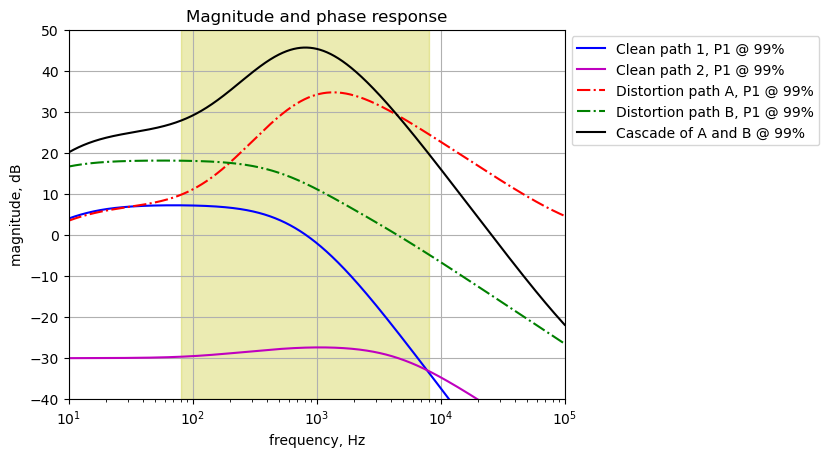

In [158]:
plt.ylabel('magnitude, dB')
plt.xlabel('frequency, Hz')

i = 6 # set the index for the gain setting of interest

plt.semilogx(clean_path1_w[i]/(2*np.pi), clean_path1_mag[i],'-b',label='Clean path 1, P1 @ {:.0f}%'.format(gain_setting[i]*100))
plt.semilogx(clean_path2_w[i]/(2*np.pi), clean_path2_mag[i],'-m',label='Clean path 2, P1 @ {:.0f}%'.format(gain_setting[i]*100))

plt.semilogx(diode_pathA_w[i]/(2*np.pi), diode_pathA_mag[i],'-.r',label='Distortion path A, P1 @ {:.0f}%'.format(gain_setting[i]*100))
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i],'-.g',label='Distortion path B, P1 @ {:.0f}%'.format(gain_setting[i]*100))

# cascade of diode path part A and B
plt.semilogx(diode_pathB_w[i]/(2*np.pi), diode_pathB_mag[i]+diode_pathA_mag[i],'-k',label='Cascade of A and B @ {:.0f}%'.format(gain_setting[i]*100))

plt.tick_params(axis='y')
plt.xlim((10,100e3))
plt.ylim((-40,50))
plt.grid()

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.legend(bbox_to_anchor=(1,1))
plt.title('Magnitude and phase response')
plt.show()

The signal on the distortion path will be the most prominate signal in the output when the gain is at 99%.  As calculated below, the distortion path has sufficient gain that a peak signal of about 85 $\mu V$ will drive the diodes into conduction and generate harmonics. Signals on clean paths 1 and 2 probably are not discernable in the output. 

In [159]:
print('clean path 1 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path1_mag[i].max(),gain_setting[i]*100))
print('clean path 2 maximum gain {:.1f} dB at {:.2f}%'.format(clean_path2_mag[i].max(),gain_setting[i]*100))
print('cascade of A and B maximum gain {:.1f} dB at {:.2f}%'.format((diode_pathB_mag[i]+diode_pathA_mag[i]).max(),gain_setting[i]*100))

max_gain_dB = diode_pathA_mag[i].max()
print('path A maximum gain {:.1f} dB at {:.0f}%'.format(max_gain_dB,gain_setting[i]*100))
print('peak signal for diode conduction threshold: {:.2f} uVp'.format(1e6*Diode_knee_1N34A/(10**(max_gain_dB/10))))

clean path 1 maximum gain 7.2 dB at 99.00%
clean path 2 maximum gain -27.4 dB at 99.00%
cascade of A and B maximum gain 45.6 dB at 99.00%
path A maximum gain 34.7 dB at 99%
peak signal for diode conduction threshold: 84.67 uVp


The gains on the clean paths are not high enough to compete with the gain of the distortion path at a gain setting of 99%.

At this point in the analysis, I wonder why clean path 1 is part of the design. At low gain, clean path 2 has a gain greater than clean path 1. At a gain setting of about 10%, clean path 1 and 2 have gains along parts of the frequency response curve that are about the same, however both clean paths are over shadowed by the distortion path. It seems like clean path 1 never comtributes to the output in a meaningful way. Perhaps clean path 1 was in initial attempt to blend clean and distortion together, then clean path 2 added later.  

## Summary for part 1
Part 1 of the analysis used SMNA and the principle of superpostion to perform a linear analysis of the Klon. In part 2, a comparison of results from LTSpice with diodes included are made with the linear analysis and the results are nearily identical. Some results:

- Clean path 1 is not contributing to the output at a descernable level.
- The use of a preamp before the Klon is recomended to control the gain through the guitar signal chain.

Parts 2 and 3 are under construction.